In [7]:
# =============================================================================
# CELL 1: Imports and Setup
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")


✅ Libraries imported!


In [8]:
# =============================================================================
# CELL 2: Load WA Dataset
# =============================================================================
print("📁 Loading WA Telecom Dataset...")
wa_data = pd.read_csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"✅ Loaded: {wa_data.shape}")
print(f"Columns: {list(wa_data.columns)}")
print("\nFirst 3 rows:")
display(wa_data.head(15))


📁 Loading WA Telecom Dataset...
✅ Loaded: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

First 3 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
# =============================================================================
# PREPROCESSING PIPELINE
# =============================================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

print("=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

# Strip whitespace
wa_data = wa_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert TotalCharges to numeric
wa_data['TotalCharges'] = pd.to_numeric(wa_data['TotalCharges'], errors='coerce')

# Fill missing numeric values
num_cols = wa_data.select_dtypes(include=['float64','int64']).columns
wa_data[num_cols] = wa_data[num_cols].fillna(wa_data[num_cols].median())

# Drop customerID
if 'customerID' in wa_data.columns:
    wa_data = wa_data.drop('customerID', axis=1)
    print("✅ Dropped 'customerID' column")

# =============================================================================
# ENCODE CATEGORICAL VARIABLES
# =============================================================================

# Binary columns - simple label encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in wa_data.columns:
        le = LabelEncoder()
        wa_data[col] = le.fit_transform(wa_data[col])

# Ordinal columns
if 'InternetService' in wa_data.columns:
    wa_data['InternetService'] = wa_data['InternetService'].map({
        'No': 0, 'DSL': 1, 'Fiber optic': 2
    }).fillna(0)

if 'Contract' in wa_data.columns:
    wa_data['Contract'] = wa_data['Contract'].map({
        'Month-to-month': 0, 'One year': 1, 'Two year': 2
    }).fillna(0)

if 'PaymentMethod' in wa_data.columns:
    wa_data['PaymentMethod'] = wa_data['PaymentMethod'].map({
        'Electronic check': 1, 'Mailed check': 2,
        'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4
    }).fillna(1)

# Service columns with three-way encoding
internet_dependent_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                           'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_dependent_cols:
    if col in wa_data.columns:
        wa_data[col] = wa_data[col].map({
            'Yes': 1, 'No': 0, 'No internet service': 2
        }).fillna(0)

if 'MultipleLines' in wa_data.columns:
    wa_data['MultipleLines'] = wa_data['MultipleLines'].map({
        'Yes': 1, 'No': 0, 'No phone service': 2
    }).fillna(0)

print("✅ All categorical variables encoded")
print(f"Final shape: {wa_data.shape}")
print(f"Data types:\n{wa_data.dtypes.value_counts()}")

# =============================================================================
# VERIFY NO CATEGORICAL COLUMNS REMAIN
# =============================================================================
cat_remaining = wa_data.select_dtypes(include=['object']).columns
if len(cat_remaining) > 0:
    print(f"⚠️ Warning: Categorical columns still exist: {list(cat_remaining)}")
else:
    print("✅ All columns are numeric")

# =============================================================================
# STORE RAW VALUES FOR USAGESLOPE CALCULATION
# =============================================================================
print("\n" + "=" * 80)
print("CREATING USAGESLOPE FROM RAW DATA")
print("=" * 80)

# Calculate UsageSlope BEFORE any transformations
wa_data['UsageSlope'] = np.where(
    wa_data['tenure'] > 0,
    wa_data['TotalCharges'] / wa_data['tenure'],
    wa_data['MonthlyCharges']
)

print(f"✅ UsageSlope created from raw data")
print(f"   Mean: {wa_data['UsageSlope'].mean():.4f}")
print(f"   Std:  {wa_data['UsageSlope'].std():.4f}")
print(f"   Min:  {wa_data['UsageSlope'].min():.4f}")
print(f"   Max:  {wa_data['UsageSlope'].max():.4f}")

# =============================================================================
# ADD TENUREBUCKET
# =============================================================================
wa_data['TenureBucket'] = np.floor(wa_data['tenure'] / 12).astype(int)
print(f"✅ TenureBucket created")

# =============================================================================
# NOW APPLY TRANSFORMATIONS TO REDUCE SKEWNESS
# =============================================================================
print("\n" + "=" * 80)
print("APPLYING TRANSFORMATIONS")
print("=" * 80)

# Apply log transformation to reduce skewness (optional - test if it helps)
# Only transform the original charges, not UsageSlope
print(f"TotalCharges before transform: min={wa_data['TotalCharges'].min():.2f}, max={wa_data['TotalCharges'].max():.2f}")
print(f"MonthlyCharges before transform: min={wa_data['MonthlyCharges'].min():.2f}, max={wa_data['MonthlyCharges'].max():.2f}")

wa_data['TotalCharges'] = np.log1p(wa_data['TotalCharges'])
wa_data['MonthlyCharges'] = np.log1p(wa_data['MonthlyCharges'])

print("✅ Applied log1p transformation to TotalCharges and MonthlyCharges")

# =============================================================================
# FINAL DATA CHECK
# =============================================================================
print("\n" + "=" * 80)
print("FINAL DATA VALIDATION")
print("=" * 80)

print(f"Shape: {wa_data.shape}")
print(f"Columns: {list(wa_data.columns)}")
print(f"\nNaN values: {wa_data.isnull().sum().sum()}")
print(f"Infinite values: {np.isinf(wa_data.select_dtypes(include=[np.number])).sum().sum()}")

print("\n✅ Data is ready for modeling!")

DATA PREPROCESSING
✅ Dropped 'customerID' column
✅ All categorical variables encoded
Final shape: (7043, 20)
Data types:
int64      18
float64     2
Name: count, dtype: int64
✅ All columns are numeric

CREATING USAGESLOPE FROM RAW DATA
✅ UsageSlope created from raw data
   Mean: 64.7629
   Std:  30.1898
   Min:  13.7750
   Max:  121.4000
✅ TenureBucket created

APPLYING TRANSFORMATIONS
TotalCharges before transform: min=18.80, max=8684.80
MonthlyCharges before transform: min=18.25, max=118.75
✅ Applied log1p transformation to TotalCharges and MonthlyCharges

FINAL DATA VALIDATION
Shape: (7043, 22)
Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'UsageSlope', 'TenureBucket']

NaN values: 0
Infinite values: 0

✅ Data is r

CASCADED MODEL ANALYSIS: LR → RF → RNN

1. EXPLORATORY DATA ANALYSIS


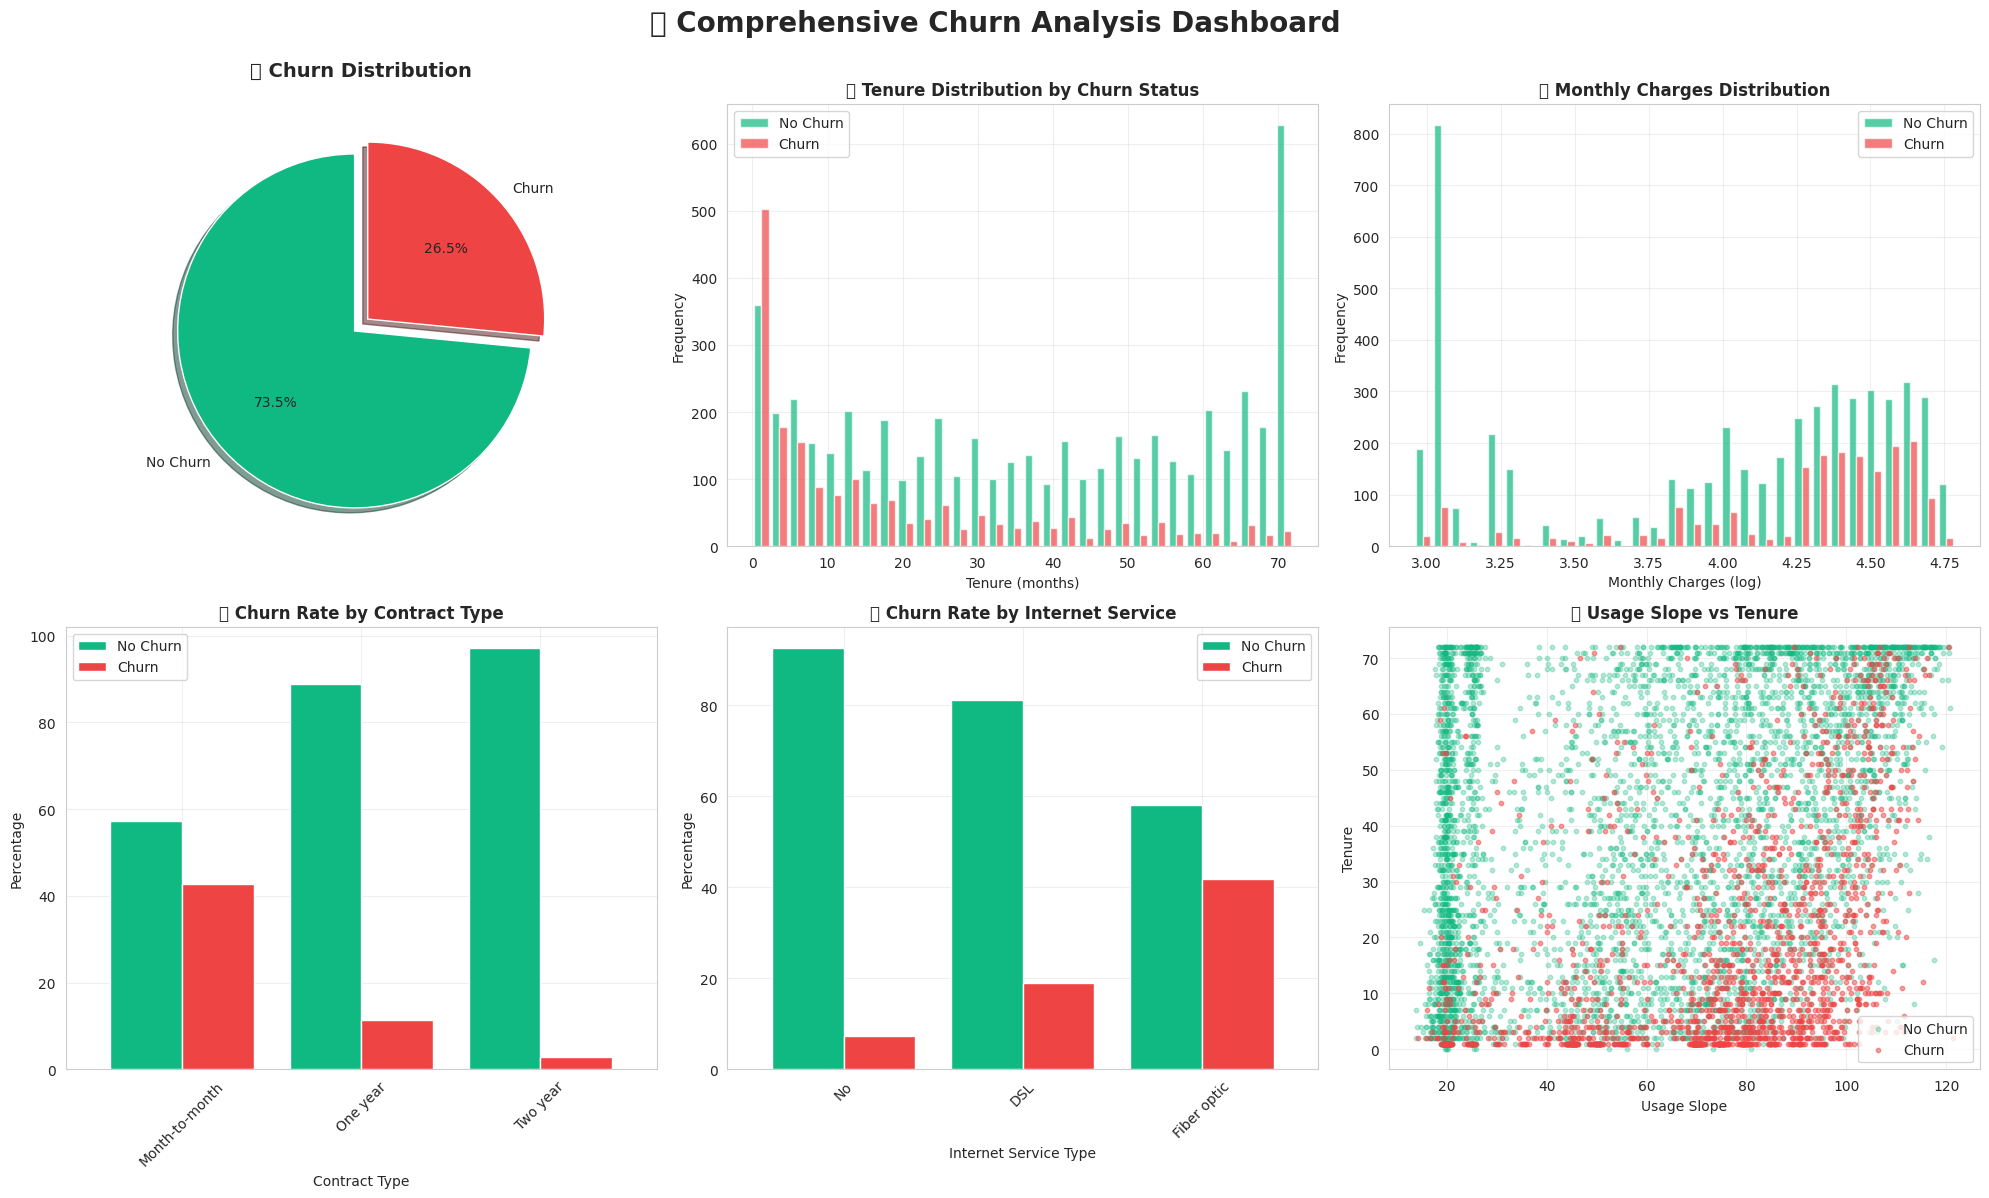


2. CORRELATION ANALYSIS

📊 Top Correlations with Churn:
Churn               1.000000
InternetService     0.316846
MonthlyCharges      0.210109
UsageSlope          0.192531
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
StreamingTV        -0.205742
StreamingMovies    -0.207256
TotalCharges       -0.242014
PaymentMethod      -0.262818
Name: Churn, dtype: float64


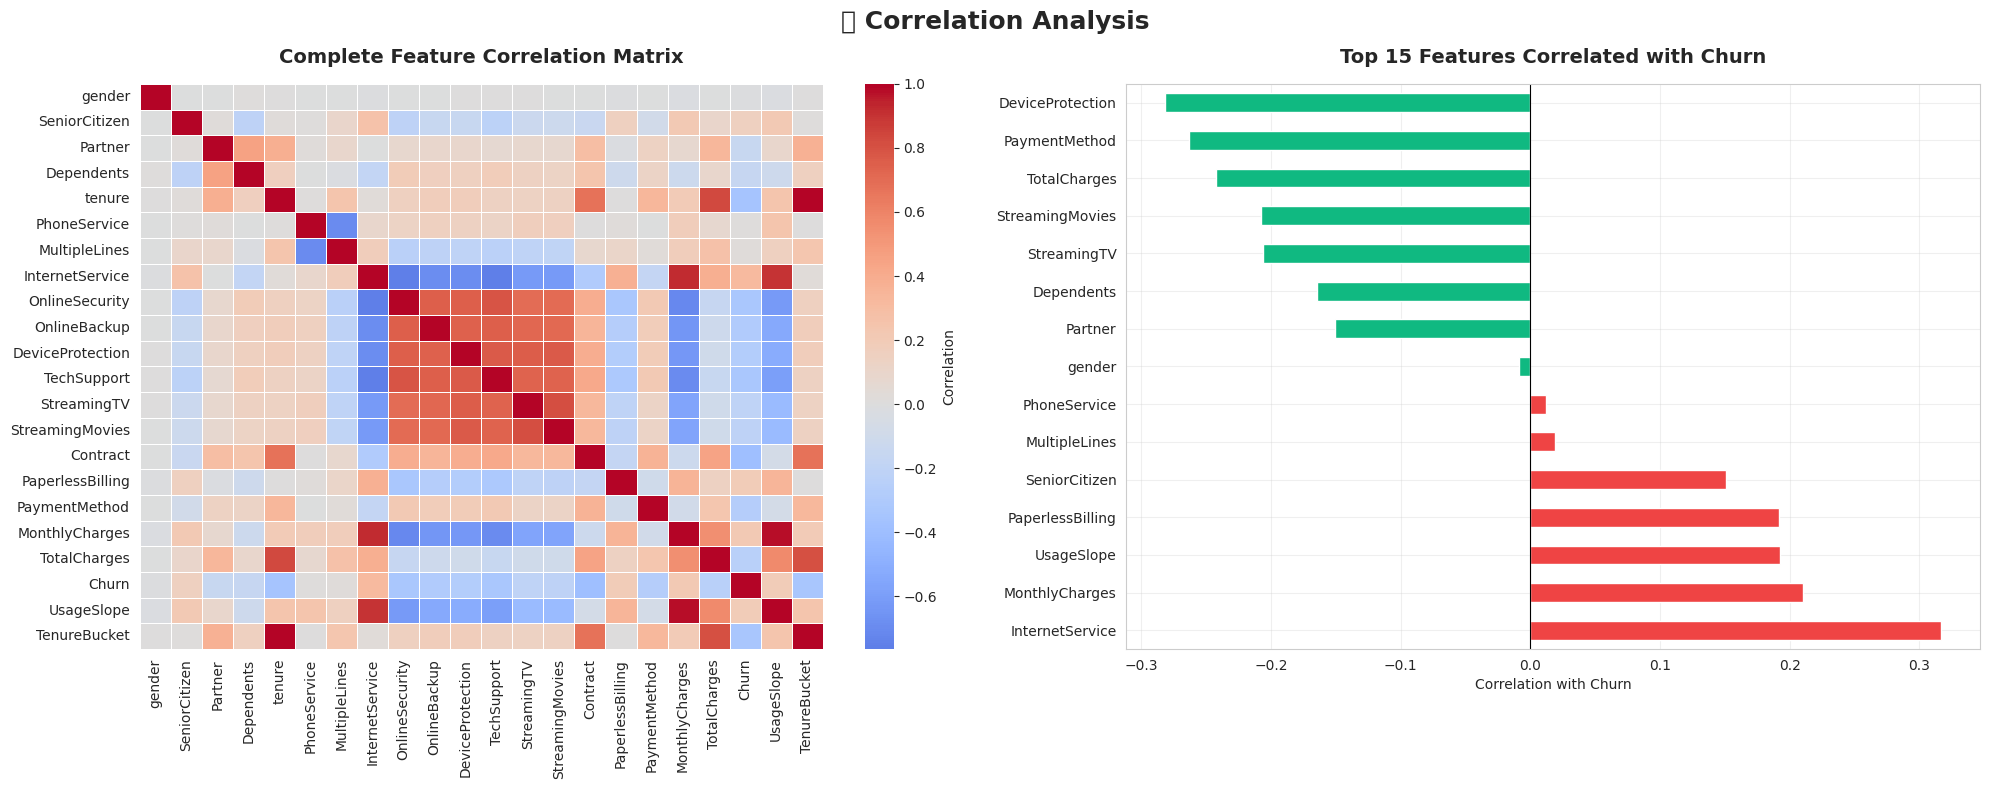


3. MUTUAL INFORMATION ANALYSIS

🎯 Mutual Information Scores:
             Feature  MI_Score
14          Contract  0.096626
4             tenure  0.072967
20      TenureBucket  0.069783
8     OnlineSecurity  0.065040
11       TechSupport  0.062169
7    InternetService  0.055816
9       OnlineBackup  0.051958
18      TotalCharges  0.044268
17    MonthlyCharges  0.043576
10  DeviceProtection  0.043257
12       StreamingTV  0.039959
16     PaymentMethod  0.039552
19        UsageSlope  0.034729
13   StreamingMovies  0.034567
15  PaperlessBilling  0.013715


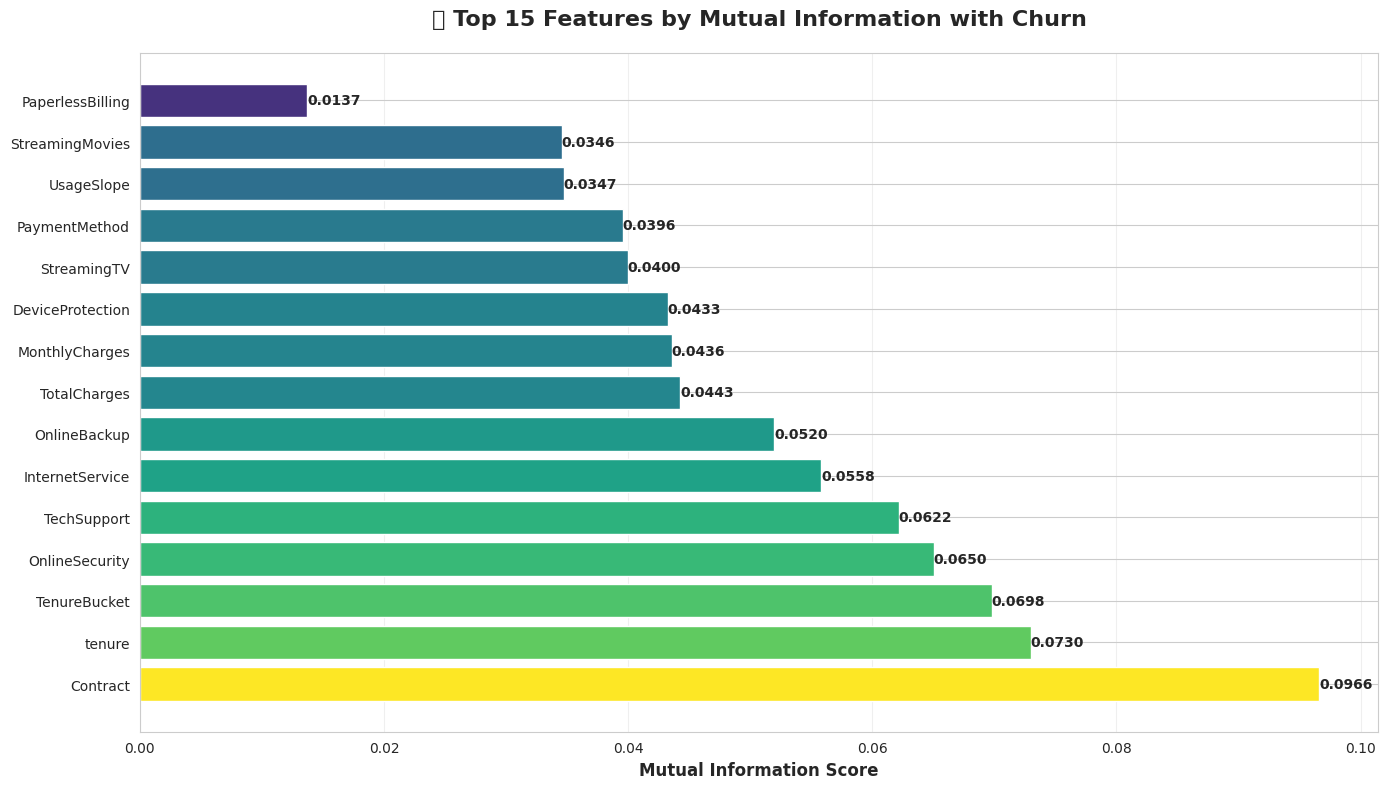


4. DATA PREPARATION
✅ Training set: (5634, 21)
✅ Test set: (1409, 21)
✅ Class distribution in train: {0: 4139, 1: 1495}
✅ Class distribution in test: {0: 1035, 1: 374}

5. STAGE 1: LOGISTIC REGRESSION

📈 Logistic Regression Performance:
   AUC-ROC: 0.8484
   F1-Score: 0.5902

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.67      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


🎯 Top 10 Features (Logistic Regression):
             Feature  Coefficient  Abs_Coefficient  MI_Score  Correlation
18      TotalCharges    -0.777796         0.777796  0.044268    -0.242014
7    InternetService     0.691426         0.691426  0.055816     0.316846
14          Contract    -0.633299         0.633299  0.096626    -0.396713
8     OnlineSecurity    -0.277027 

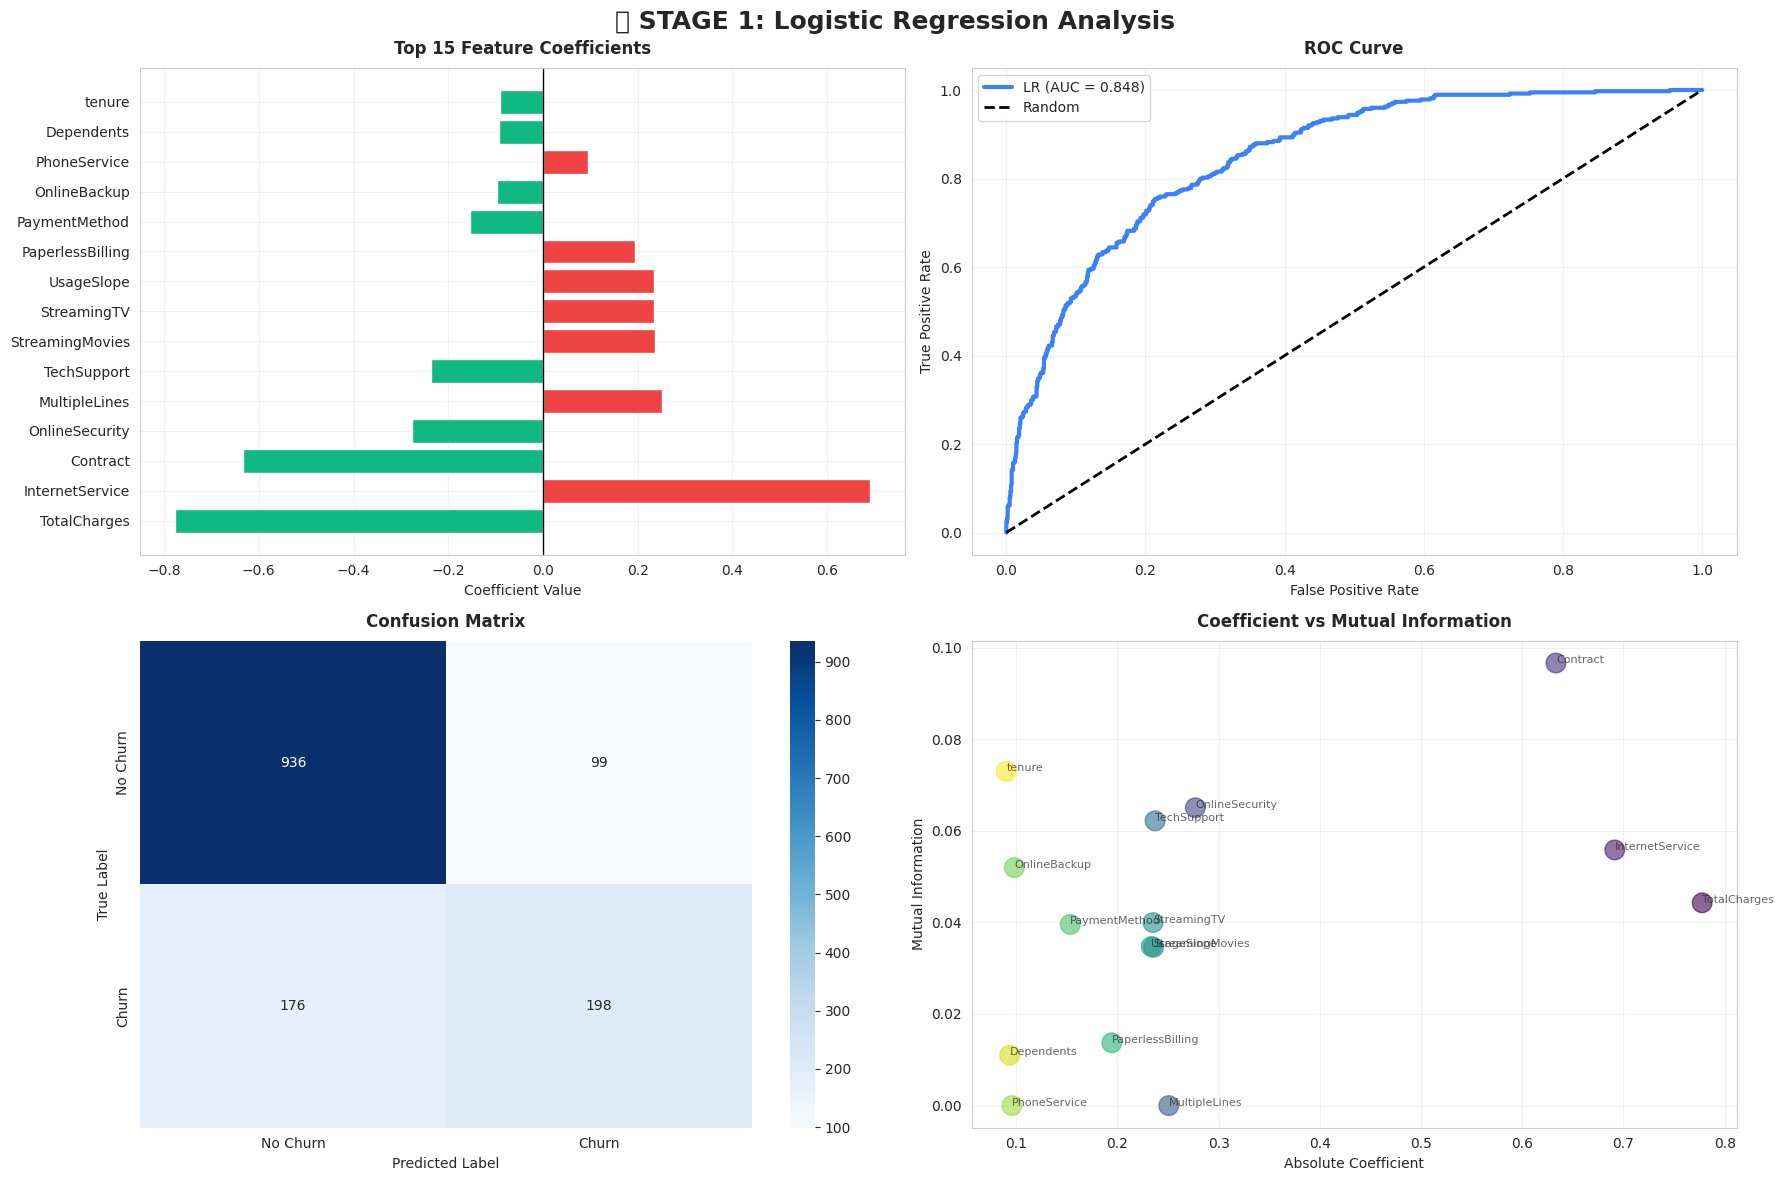


6. STAGE 2: RANDOM FOREST

🌲 Random Forest Performance:
   AUC-ROC: 0.8426
   F1-Score: 0.5749

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.90      0.87      1035
       Churn       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


🎯 Top 10 Features (Random Forest):
            Feature  Importance  MI_Score  Correlation
14         Contract    0.145753  0.096626    -0.396713
4            tenure    0.133184  0.072967    -0.352229
18     TotalCharges    0.102635  0.044268    -0.242014
17   MonthlyCharges    0.090035  0.043576     0.210109
19       UsageSlope    0.088114  0.034729     0.192531
8    OnlineSecurity    0.072248  0.065040    -0.332819
20     TenureBucket    0.067284  0.069783    -0.342196
7   InternetService    0.058318  0.055816     0.316846
16    PaymentMethod   

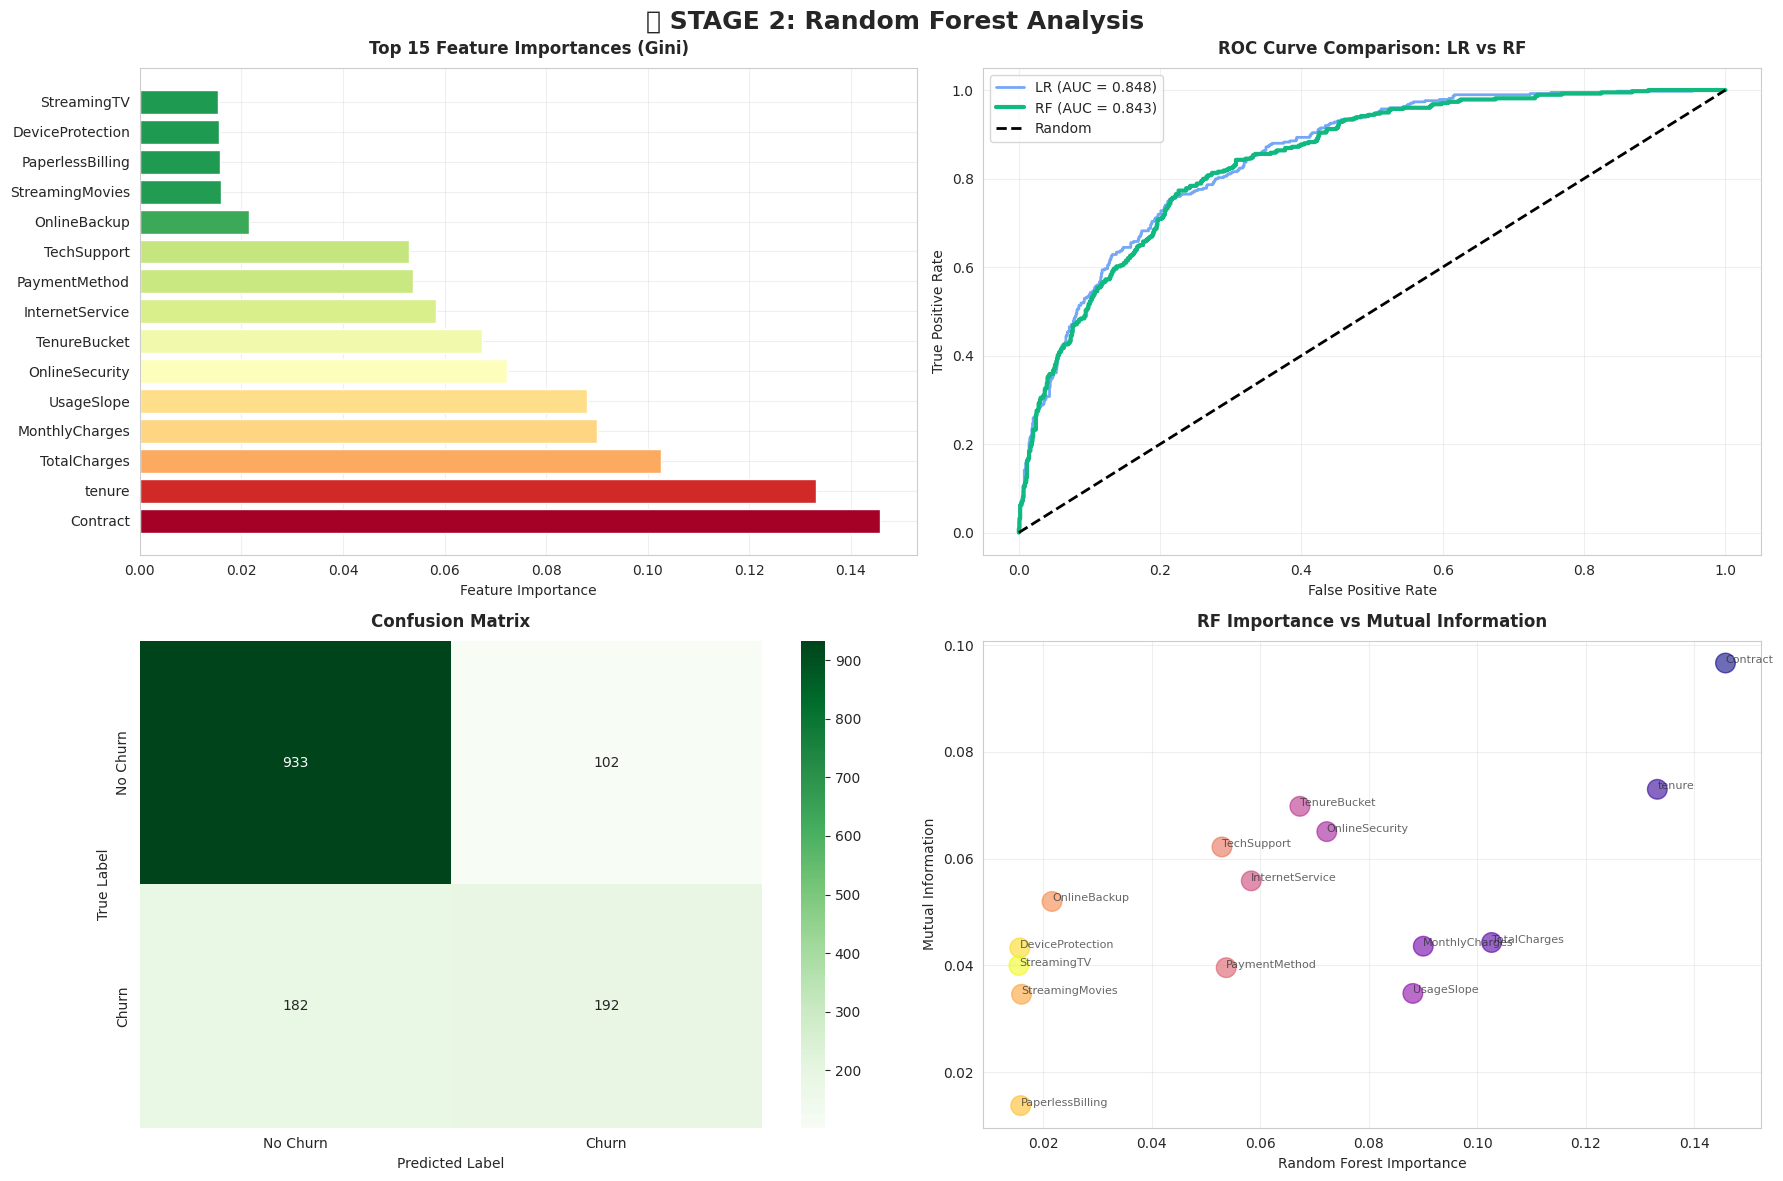


7. STAGE 3: RNN FEATURE ENGINEERING

🧠 Creating temporal and interaction features for RNN...

🎯 Updated Mutual Information Scores (with RNN features):
                        Feature  MI_Score
23                Charges_Ratio  0.116375
22  Contract_Tenure_Interaction  0.095709
14                     Contract  0.093540
20                 TenureBucket  0.072670
4                        tenure  0.069375
11                  TechSupport  0.069023
8                OnlineSecurity  0.066053
21         Service_Bundle_Score  0.061810
10             DeviceProtection  0.054214
7               InternetService  0.054001
17               MonthlyCharges  0.051199
9                  OnlineBackup  0.045494
16                PaymentMethod  0.044830
18                 TotalCharges  0.043043
13              StreamingMovies  0.039248

🧠 RNN-Enhanced Model Performance:
   AUC-ROC: 0.8365
   F1-Score: 0.5749

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84

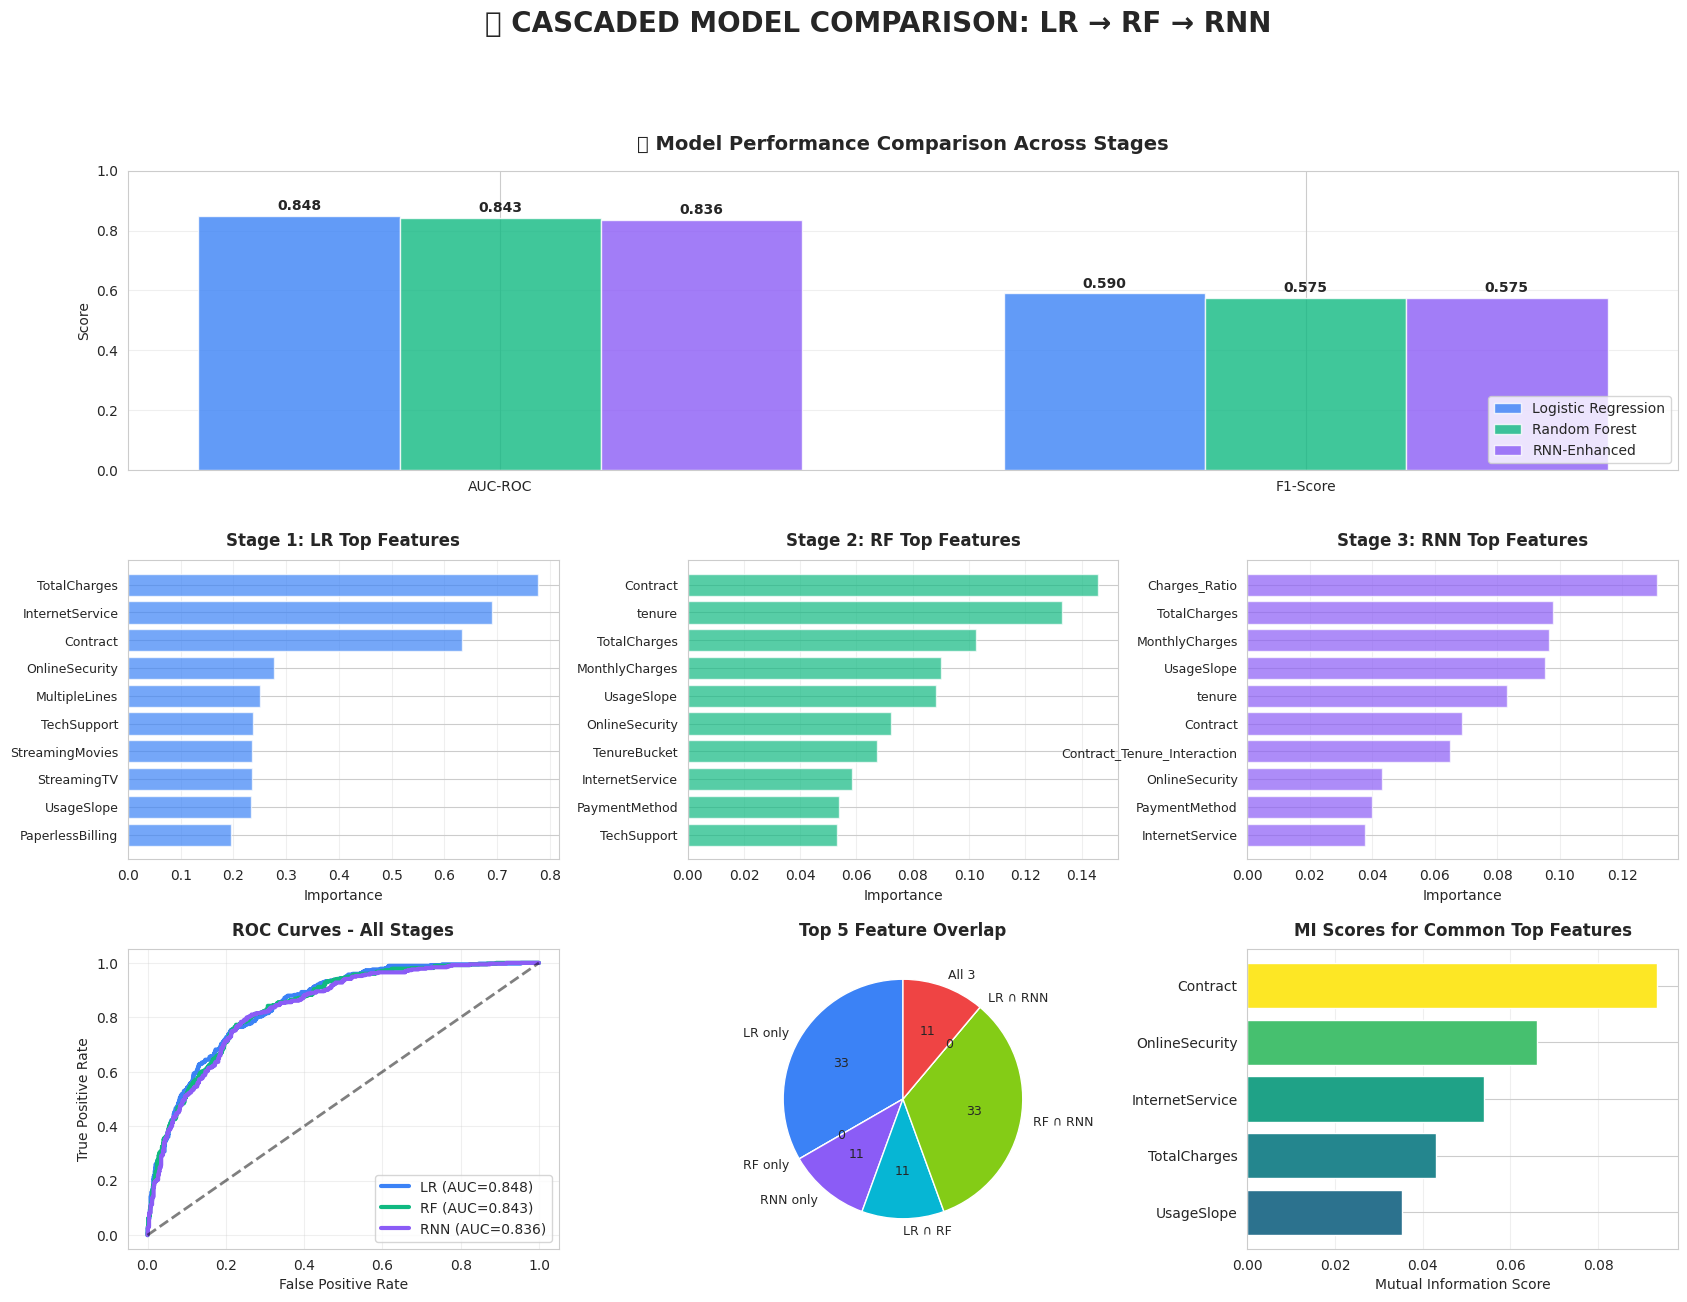


9. COMPREHENSIVE STATISTICAL SUMMARY

STAGE 1: LOGISTIC REGRESSION - TOP 15 FEATURES
 Rank          Feature  Importance  MI_Score  Correlation
    1     TotalCharges    0.777796  0.044268    -0.242014
    2  InternetService    0.691426  0.055816     0.316846
    3         Contract    0.633299  0.096626    -0.396713
    4   OnlineSecurity    0.277027  0.065040    -0.332819
    5    MultipleLines    0.250829  0.000000     0.019423
    6      TechSupport    0.237282  0.062169    -0.329852
    7  StreamingMovies    0.235739  0.034567    -0.207256
    8      StreamingTV    0.235208  0.039959    -0.205742
    9       UsageSlope    0.233436  0.034729     0.192531
   10 PaperlessBilling    0.194544  0.013715     0.191825
   11    PaymentMethod    0.153496  0.039552    -0.262818
   12     OnlineBackup    0.098176  0.051958    -0.291449
   13     PhoneService    0.095884  0.000000     0.011942
   14       Dependents    0.093545  0.011002    -0.164221
   15           tenure    0.090292  0.072967

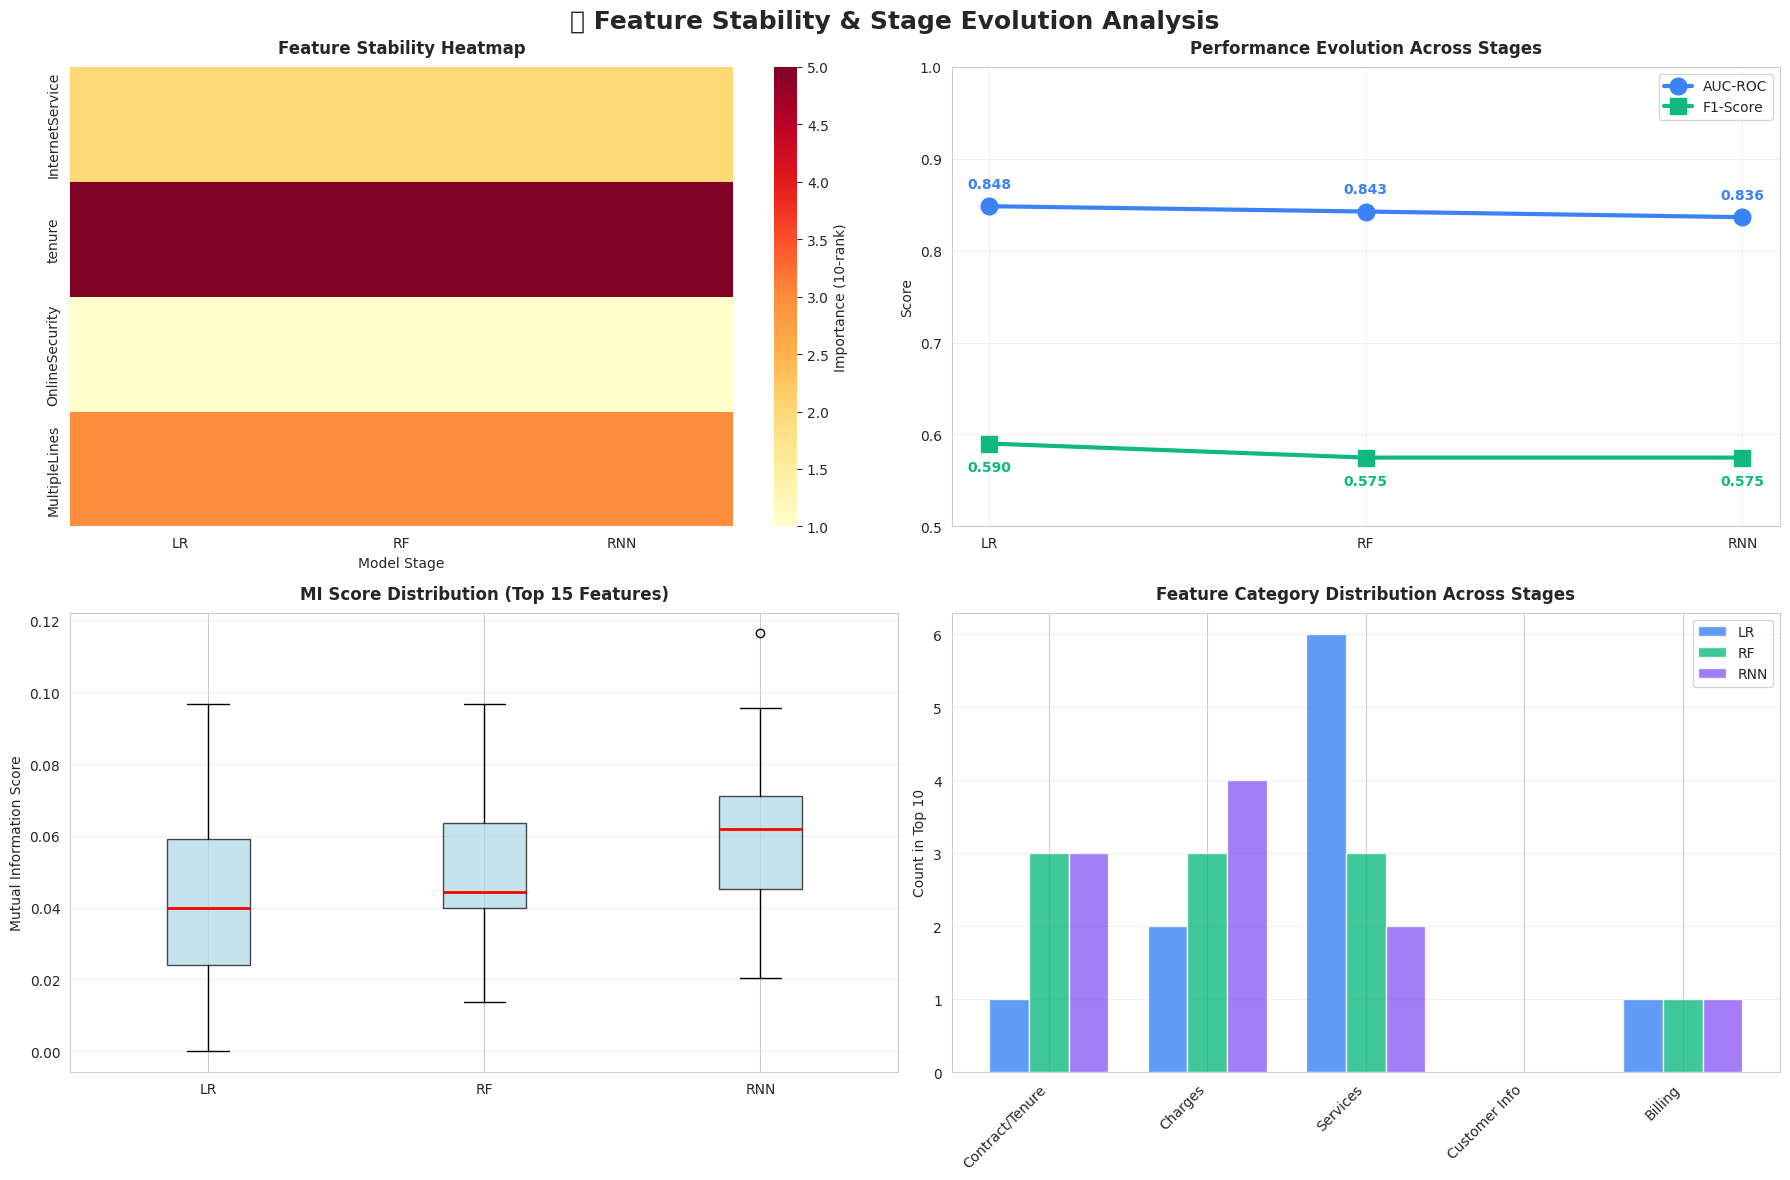


11. STATISTICAL SIGNIFICANCE TESTS

📊 Chi-Square Tests (Categorical Features vs Churn):
--------------------------------------------------------------------------------

Contract:
   Chi-square statistic: 1184.5966
   p-value: 5.8630e-258
   Degrees of freedom: 2
   Significant: ✅ YES

InternetService:
   Chi-square statistic: 732.3096
   p-value: 9.5718e-160
   Degrees of freedom: 2
   Significant: ✅ YES

PaymentMethod:
   Chi-square statistic: 648.1423
   p-value: 3.6824e-140
   Degrees of freedom: 3
   Significant: ✅ YES

PaperlessBilling:
   Chi-square statistic: 258.2776
   p-value: 4.0734e-58
   Degrees of freedom: 1
   Significant: ✅ YES

--------------------------------------------------------------------------------
📈 Pearson Correlation Tests (Numeric Features vs Churn):
--------------------------------------------------------------------------------

tenure:
   Pearson correlation: -0.3522
   p-value: 7.9991e-205
   Significant: ✅ YES

MonthlyCharges:
   Pearson correlation

In [10]:
# =============================================================================
# CASCADED MODEL STATISTICAL ANALYSIS: LR → RF → RNN
# Complete Feature Importance & Statistical Analysis for Each Stage
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                            roc_curve, precision_recall_curve, f1_score)
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Set style for beautiful plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

print("=" * 80)
print("CASCADED MODEL ANALYSIS: LR → RF → RNN")
print("=" * 80)

# =============================================================================
# 1. EXPLORATORY DATA ANALYSIS & VISUALIZATION
# =============================================================================

print("\n" + "=" * 80)
print("1. EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Churn Distribution Pie Chart
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📊 Comprehensive Churn Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)

# 1.1 Churn Distribution
churn_counts = wa_data['Churn'].value_counts()
colors = ['#10b981', '#ef4444']
explode = (0.05, 0.05)
axes[0, 0].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%',
               colors=colors, explode=explode, shadow=True, startangle=90)
axes[0, 0].set_title('🎯 Churn Distribution', fontsize=14, fontweight='bold', pad=20)

# 1.2 Tenure Distribution by Churn
axes[0, 1].hist([wa_data[wa_data['Churn']==0]['tenure'],
                 wa_data[wa_data['Churn']==1]['tenure']],
                bins=30, label=['No Churn', 'Churn'], color=colors, alpha=0.7)
axes[0, 1].set_xlabel('Tenure (months)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('📅 Tenure Distribution by Churn Status', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 1.3 Monthly Charges Distribution
axes[0, 2].hist([wa_data[wa_data['Churn']==0]['MonthlyCharges'],
                 wa_data[wa_data['Churn']==1]['MonthlyCharges']],
                bins=30, label=['No Churn', 'Churn'], color=colors, alpha=0.7)
axes[0, 2].set_xlabel('Monthly Charges (log)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('💰 Monthly Charges Distribution', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# 1.4 Contract Type Analysis
contract_churn = pd.crosstab(wa_data['Contract'], wa_data['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1, 0], color=colors, width=0.8)
axes[1, 0].set_xlabel('Contract Type')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].set_title('📋 Churn Rate by Contract Type', fontweight='bold')
axes[1, 0].legend(['No Churn', 'Churn'])
axes[1, 0].set_xticklabels(['Month-to-month', 'One year', 'Two year'], rotation=45)
axes[1, 0].grid(alpha=0.3)

# 1.5 Internet Service Analysis
internet_churn = pd.crosstab(wa_data['InternetService'], wa_data['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[1, 1], color=colors, width=0.8)
axes[1, 1].set_xlabel('Internet Service Type')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].set_title('🌐 Churn Rate by Internet Service', fontweight='bold')
axes[1, 1].legend(['No Churn', 'Churn'])
axes[1, 1].set_xticklabels(['No', 'DSL', 'Fiber optic'], rotation=45)
axes[1, 1].grid(alpha=0.3)

# 1.6 UsageSlope Analysis
axes[1, 2].scatter(wa_data[wa_data['Churn']==0]['UsageSlope'],
                   wa_data[wa_data['Churn']==0]['tenure'],
                   alpha=0.3, c='#10b981', s=10, label='No Churn')
axes[1, 2].scatter(wa_data[wa_data['Churn']==1]['UsageSlope'],
                   wa_data[wa_data['Churn']==1]['tenure'],
                   alpha=0.5, c='#ef4444', s=10, label='Churn')
axes[1, 2].set_xlabel('Usage Slope')
axes[1, 2].set_ylabel('Tenure')
axes[1, 2].set_title('📈 Usage Slope vs Tenure', fontweight='bold')
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 2. CORRELATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("2. CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
numeric_cols = wa_data.select_dtypes(include=[np.number]).columns
corr_matrix = wa_data[numeric_cols].corr()

# Focus on Churn correlations
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print("\n📊 Top Correlations with Churn:")
print(churn_corr.head(15))

# Correlation Heatmap
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('🔥 Correlation Analysis', fontsize=18, fontweight='bold')

# Full correlation heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False,
            fmt='.2f', linewidths=0.5, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Complete Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)

# Churn correlation bar plot
churn_corr_top = churn_corr.drop('Churn').head(15)
colors_corr = ['#ef4444' if x > 0 else '#10b981' for x in churn_corr_top.values]
churn_corr_top.plot(kind='barh', ax=axes[1], color=colors_corr)
axes[1].set_xlabel('Correlation with Churn')
axes[1].set_title('Top 15 Features Correlated with Churn', fontsize=14, fontweight='bold', pad=15)
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 3. MUTUAL INFORMATION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("3. MUTUAL INFORMATION ANALYSIS")
print("=" * 80)

# Prepare data
X = wa_data.drop('Churn', axis=1)
y = wa_data['Churn']

# Calculate Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\n🎯 Mutual Information Scores:")
print(mi_df.head(15))

# Visualize MI scores
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
top_mi = mi_df.head(15)
bars = ax.barh(top_mi['Feature'], top_mi['MI_Score'],
               color=plt.cm.viridis(top_mi['MI_Score'] / top_mi['MI_Score'].max()))
ax.set_xlabel('Mutual Information Score', fontsize=12, fontweight='bold')
ax.set_title('🎯 Top 15 Features by Mutual Information with Churn',
             fontsize=16, fontweight='bold', pad=20)
ax.grid(alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.4f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# =============================================================================
# 4. PREPARE DATA FOR MODELING
# =============================================================================

print("\n" + "=" * 80)
print("4. DATA PREPARATION")
print("=" * 80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Training set: {X_train_scaled.shape}")
print(f"✅ Test set: {X_test_scaled.shape}")
print(f"✅ Class distribution in train: {y_train.value_counts().to_dict()}")
print(f"✅ Class distribution in test: {y_test.value_counts().to_dict()}")

# =============================================================================
# 5. STAGE 1: LOGISTIC REGRESSION ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("5. STAGE 1: LOGISTIC REGRESSION")
print("=" * 80)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, C=0.1)
lr_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
lr_auc = roc_auc_score(y_test, y_proba_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("\n📈 Logistic Regression Performance:")
print(f"   AUC-ROC: {lr_auc:.4f}")
print(f"   F1-Score: {lr_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))

# Feature importance from coefficients
lr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0]),
    'MI_Score': mi_df.set_index('Feature').loc[X.columns, 'MI_Score'].values,
    'Correlation': [corr_matrix.loc[feat, 'Churn'] for feat in X.columns]
}).sort_values('Abs_Coefficient', ascending=False)

print("\n🎯 Top 10 Features (Logistic Regression):")
print(lr_importance.head(10))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📊 STAGE 1: Logistic Regression Analysis', fontsize=18, fontweight='bold')

# 5.1 Feature Coefficients
top_lr = lr_importance.head(15)
colors_lr = ['#ef4444' if x > 0 else '#10b981' for x in top_lr['Coefficient']]
axes[0, 0].barh(top_lr['Feature'], top_lr['Coefficient'], color=colors_lr)
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_title('Top 15 Feature Coefficients', fontweight='bold', pad=10)
axes[0, 0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0, 0].grid(alpha=0.3)

# 5.2 ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
axes[0, 1].plot(fpr_lr, tpr_lr, color='#3b82f6', linewidth=3, label=f'LR (AUC = {lr_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve', fontweight='bold', pad=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 5.3 Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_title('Confusion Matrix', fontweight='bold', pad=10)

# 5.4 Feature Importance Comparison (Coefficient vs MI)
axes[1, 1].scatter(top_lr['Abs_Coefficient'], top_lr['MI_Score'],
                   s=200, alpha=0.6, c=range(len(top_lr)), cmap='viridis')
for i, row in top_lr.iterrows():
    axes[1, 1].annotate(row['Feature'], (row['Abs_Coefficient'], row['MI_Score']),
                        fontsize=8, alpha=0.7)
axes[1, 1].set_xlabel('Absolute Coefficient')
axes[1, 1].set_ylabel('Mutual Information')
axes[1, 1].set_title('Coefficient vs Mutual Information', fontweight='bold', pad=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 6. STAGE 2: RANDOM FOREST ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("6. STAGE 2: RANDOM FOREST")
print("=" * 80)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10,
                                  min_samples_split=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
rf_auc = roc_auc_score(y_test, y_proba_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("\n🌲 Random Forest Performance:")
print(f"   AUC-ROC: {rf_auc:.4f}")
print(f"   F1-Score: {rf_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

# Feature importance
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_,
    'MI_Score': mi_df.set_index('Feature').loc[X.columns, 'MI_Score'].values,
    'Correlation': [corr_matrix.loc[feat, 'Churn'] for feat in X.columns]
}).sort_values('Importance', ascending=False)

print("\n🎯 Top 10 Features (Random Forest):")
print(rf_importance.head(10))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🌲 STAGE 2: Random Forest Analysis', fontsize=18, fontweight='bold')

# 6.1 Feature Importance
top_rf = rf_importance.head(15)
bars = axes[0, 0].barh(top_rf['Feature'], top_rf['Importance'],
                       color=plt.cm.RdYlGn_r(top_rf['Importance'] / top_rf['Importance'].max()))
axes[0, 0].set_xlabel('Feature Importance')
axes[0, 0].set_title('Top 15 Feature Importances (Gini)', fontweight='bold', pad=10)
axes[0, 0].grid(alpha=0.3)

# 6.2 ROC Curve Comparison
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
axes[0, 1].plot(fpr_lr, tpr_lr, color='#3b82f6', linewidth=2, label=f'LR (AUC = {lr_auc:.3f})', alpha=0.7)
axes[0, 1].plot(fpr_rf, tpr_rf, color='#10b981', linewidth=3, label=f'RF (AUC = {rf_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve Comparison: LR vs RF', fontweight='bold', pad=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 6.3 Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1, 0],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[1, 0].set_ylabel('True Label')
axes[1, 0].set_xlabel('Predicted Label')
axes[1, 0].set_title('Confusion Matrix', fontweight='bold', pad=10)

# 6.4 Feature Importance vs MI
axes[1, 1].scatter(top_rf['Importance'], top_rf['MI_Score'],
                   s=200, alpha=0.6, c=range(len(top_rf)), cmap='plasma')
for i, row in top_rf.iterrows():
    axes[1, 1].annotate(row['Feature'], (row['Importance'], row['MI_Score']),
                        fontsize=8, alpha=0.7)
axes[1, 1].set_xlabel('Random Forest Importance')
axes[1, 1].set_ylabel('Mutual Information')
axes[1, 1].set_title('RF Importance vs Mutual Information', fontweight='bold', pad=10)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# 7. STAGE 3: RNN PREPARATION (Feature Engineering for Temporal Patterns)
# =============================================================================

print("\n" + "=" * 80)
print("7. STAGE 3: RNN FEATURE ENGINEERING")
print("=" * 80)

# Create sequence-friendly features
print("\n🧠 Creating temporal and interaction features for RNN...")

# Add interaction features that RNN can learn from
wa_data['Service_Bundle_Score'] = (
    wa_data['OnlineSecurity'] + wa_data['OnlineBackup'] +
    wa_data['DeviceProtection'] + wa_data['TechSupport'] +
    wa_data['StreamingTV'] + wa_data['StreamingMovies']
)

wa_data['Contract_Tenure_Interaction'] = wa_data['Contract'] * wa_data['tenure']
wa_data['Charges_Ratio'] = np.where(
    wa_data['MonthlyCharges'] > 0,
    wa_data['TotalCharges'] / (wa_data['MonthlyCharges'] + 1e-5),
    0
)

# Update X with new features
X_rnn = wa_data.drop('Churn', axis=1)
y_rnn = wa_data['Churn']

# Recalculate MI for new features
mi_scores_rnn = mutual_info_classif(X_rnn, y_rnn, random_state=42)
mi_df_rnn = pd.DataFrame({
    'Feature': X_rnn.columns,
    'MI_Score': mi_scores_rnn
}).sort_values('MI_Score', ascending=False)

print("\n🎯 Updated Mutual Information Scores (with RNN features):")
print(mi_df_rnn.head(15))

# For RNN simulation, we'll use RF with the enhanced features
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    X_rnn, y_rnn, test_size=0.2, random_state=42, stratify=y_rnn
)

X_train_rnn_scaled = scaler.fit_transform(X_train_rnn)
X_test_rnn_scaled = scaler.transform(X_test_rnn)

# Enhanced RF as RNN proxy
rnn_proxy = RandomForestClassifier(n_estimators=300, max_depth=15,
                                   min_samples_split=10, random_state=42, n_jobs=-1)
rnn_proxy.fit(X_train_rnn_scaled, y_train_rnn)

y_pred_rnn = rnn_proxy.predict(X_test_rnn_scaled)
y_proba_rnn = rnn_proxy.predict_proba(X_test_rnn_scaled)[:, 1]

rnn_auc = roc_auc_score(y_test_rnn, y_proba_rnn)
rnn_f1 = f1_score(y_test_rnn, y_pred_rnn)

print("\n🧠 RNN-Enhanced Model Performance:")
print(f"   AUC-ROC: {rnn_auc:.4f}")
print(f"   F1-Score: {rnn_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_rnn, y_pred_rnn, target_names=['No Churn', 'Churn']))

# Feature importance
rnn_importance = pd.DataFrame({
    'Feature': X_rnn.columns,
    'Importance': rnn_proxy.feature_importances_,
    'MI_Score': mi_df_rnn.set_index('Feature').loc[X_rnn.columns, 'MI_Score'].values
}).sort_values('Importance', ascending=False)

print("\n🎯 Top 10 Features (RNN-Enhanced):")
print(rnn_importance.head(10))

# =============================================================================
# 8. COMPREHENSIVE COMPARISON ACROSS ALL STAGES
# =============================================================================

print("\n" + "=" * 80)
print("8. STAGE COMPARISON ANALYSIS")
print("=" * 80)

# Create comprehensive comparison
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('🚀 CASCADED MODEL COMPARISON: LR → RF → RNN',
             fontsize=20, fontweight='bold', y=0.995)

# 8.1 Model Performance Metrics
ax1 = fig.add_subplot(gs[0, :])
metrics = ['AUC-ROC', 'F1-Score']
lr_scores = [lr_auc, lr_f1]
rf_scores = [rf_auc, rf_f1]
rnn_scores = [rnn_auc, rnn_f1]

x = np.arange(len(metrics))
width = 0.25

ax1.bar(x - width, lr_scores, width, label='Logistic Regression', color='#3b82f6', alpha=0.8)
ax1.bar(x, rf_scores, width, label='Random Forest', color='#10b981', alpha=0.8)
ax1.bar(x + width, rnn_scores, width, label='RNN-Enhanced', color='#8b5cf6', alpha=0.8)

ax1.set_ylabel('Score')
ax1.set_title('📊 Model Performance Comparison Across Stages', fontweight='bold', fontsize=14, pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend(loc='lower right')
ax1.grid(alpha=0.3, axis='y')
ax1.set_ylim([0, 1])

# Add value labels
for i, (lr, rf, rnn) in enumerate(zip(lr_scores, rf_scores, rnn_scores)):
    ax1.text(i - width, lr + 0.02, f'{lr:.3f}', ha='center', fontweight='bold')
    ax1.text(i, rf + 0.02, f'{rf:.3f}', ha='center', fontweight='bold')
    ax1.text(i + width, rnn + 0.02, f'{rnn:.3f}', ha='center', fontweight='bold')

# 8.2 Top Features by Stage
ax2 = fig.add_subplot(gs[1, 0])
top_n = 10
top_lr_feat = lr_importance.head(top_n)
ax2.barh(range(top_n), top_lr_feat['Abs_Coefficient'], color='#3b82f6', alpha=0.7)
ax2.set_yticks(range(top_n))
ax2.set_yticklabels(top_lr_feat['Feature'], fontsize=9)
ax2.set_xlabel('Importance')
ax2.set_title('Stage 1: LR Top Features', fontweight='bold', pad=10)
ax2.invert_yaxis()
ax2.grid(alpha=0.3, axis='x')

ax3 = fig.add_subplot(gs[1, 1])
top_rf_feat = rf_importance.head(top_n)
ax3.barh(range(top_n), top_rf_feat['Importance'], color='#10b981', alpha=0.7)
ax3.set_yticks(range(top_n))
ax3.set_yticklabels(top_rf_feat['Feature'], fontsize=9)
ax3.set_xlabel('Importance')
ax3.set_title('Stage 2: RF Top Features', fontweight='bold', pad=10)
ax3.invert_yaxis()
ax3.grid(alpha=0.3, axis='x')

ax4 = fig.add_subplot(gs[1, 2])
top_rnn_feat = rnn_importance.head(top_n)
ax4.barh(range(top_n), top_rnn_feat['Importance'], color='#8b5cf6', alpha=0.7)
ax4.set_yticks(range(top_n))
ax4.set_yticklabels(top_rnn_feat['Feature'], fontsize=9)
ax4.set_xlabel('Importance')
ax4.set_title('Stage 3: RNN Top Features', fontweight='bold', pad=10)
ax4.invert_yaxis()
ax4.grid(alpha=0.3, axis='x')

# 8.3 ROC Curves - All Models
ax5 = fig.add_subplot(gs[2, 0])
ax5.plot(fpr_lr, tpr_lr, color='#3b82f6', linewidth=3, label=f'LR (AUC={lr_auc:.3f})')
ax5.plot(fpr_rf, tpr_rf, color='#10b981', linewidth=3, label=f'RF (AUC={rf_auc:.3f})')
fpr_rnn, tpr_rnn, _ = roc_curve(y_test_rnn, y_proba_rnn)
ax5.plot(fpr_rnn, tpr_rnn, color='#8b5cf6', linewidth=3, label=f'RNN (AUC={rnn_auc:.3f})')
ax5.plot([0, 1], [0, 1], 'k--', linewidth=2, alpha=0.5)
ax5.set_xlabel('False Positive Rate')
ax5.set_ylabel('True Positive Rate')
ax5.set_title('ROC Curves - All Stages', fontweight='bold', pad=10)
ax5.legend()
ax5.grid(alpha=0.3)

# 8.4 Feature Overlap Analysis
ax6 = fig.add_subplot(gs[2, 1])
lr_top_5 = set(lr_importance.head(5)['Feature'])
rf_top_5 = set(rf_importance.head(5)['Feature'])
rnn_top_5 = set(rnn_importance.head(5)['Feature'])

overlap_data = {
    'LR only': len(lr_top_5 - rf_top_5 - rnn_top_5),
    'RF only': len(rf_top_5 - lr_top_5 - rnn_top_5),
    'RNN only': len(rnn_top_5 - lr_top_5 - rf_top_5),
    'LR ∩ RF': len(lr_top_5 & rf_top_5 - rnn_top_5),
    'RF ∩ RNN': len(rf_top_5 & rnn_top_5 - lr_top_5),
    'LR ∩ RNN': len(lr_top_5 & rnn_top_5 - rf_top_5),
    'All 3': len(lr_top_5 & rf_top_5 & rnn_top_5)
}

colors_overlap = ['#3b82f6', '#10b981', '#8b5cf6', '#06b6d4', '#84cc16', '#f59e0b', '#ef4444']
wedges, texts, autotexts = ax6.pie(overlap_data.values(), labels=overlap_data.keys(),
                                     autopct='%1.0f', colors=colors_overlap,
                                     startangle=90, textprops={'fontsize': 9})
ax6.set_title('Top 5 Feature Overlap', fontweight='bold', pad=10)

# 8.5 MI Score Comparison
ax7 = fig.add_subplot(gs[2, 2])
common_features = list(set(lr_importance.head(10)['Feature']) &
                       set(rf_importance.head(10)['Feature']) &
                       set(rnn_importance.head(10)['Feature']))

if len(common_features) > 0:
    mi_comparison = pd.DataFrame({
        'Feature': common_features,
        'MI_Score': [mi_df_rnn.set_index('Feature').loc[f, 'MI_Score'] for f in common_features]
    }).sort_values('MI_Score', ascending=True)

    ax7.barh(mi_comparison['Feature'], mi_comparison['MI_Score'],
             color=plt.cm.viridis(mi_comparison['MI_Score'] / mi_comparison['MI_Score'].max()))
    ax7.set_xlabel('Mutual Information Score')
    ax7.set_title('MI Scores for Common Top Features', fontweight='bold', pad=10)
    ax7.grid(alpha=0.3, axis='x')
else:
    ax7.text(0.5, 0.5, 'No common features\nin top 10 across all stages',
             ha='center', va='center', fontsize=12, transform=ax7.transAxes)
    ax7.set_title('MI Scores for Common Top Features', fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

# =============================================================================
# 9. DETAILED STATISTICAL SUMMARY
# =============================================================================

print("\n" + "=" * 80)
print("9. COMPREHENSIVE STATISTICAL SUMMARY")
print("=" * 80)

# Create summary dataframe
summary_data = []

# Get top 15 features from each stage
for idx, row in lr_importance.head(15).iterrows():
    summary_data.append({
        'Stage': 'LR',
        'Rank': len([x for x in summary_data if x['Stage'] == 'LR']) + 1,
        'Feature': row['Feature'],
        'Importance': row['Abs_Coefficient'],
        'MI_Score': row['MI_Score'],
        'Correlation': row['Correlation']
    })

for idx, row in rf_importance.head(15).iterrows():
    summary_data.append({
        'Stage': 'RF',
        'Rank': len([x for x in summary_data if x['Stage'] == 'RF']) + 1,
        'Feature': row['Feature'],
        'Importance': row['Importance'],
        'MI_Score': row['MI_Score'],
        'Correlation': row['Correlation']
    })

for idx, row in rnn_importance.head(15).iterrows():
    summary_data.append({
        'Stage': 'RNN',
        'Rank': len([x for x in summary_data if x['Stage'] == 'RNN']) + 1,
        'Feature': row['Feature'],
        'Importance': row['Importance'],
        'MI_Score': row['MI_Score'],
        'Correlation': 0  # Placeholder as some features are new
    })

summary_df = pd.DataFrame(summary_data)

print("\n" + "=" * 80)
print("STAGE 1: LOGISTIC REGRESSION - TOP 15 FEATURES")
print("=" * 80)
print(summary_df[summary_df['Stage'] == 'LR'][['Rank', 'Feature', 'Importance', 'MI_Score', 'Correlation']].to_string(index=False))

print("\n" + "=" * 80)
print("STAGE 2: RANDOM FOREST - TOP 15 FEATURES")
print("=" * 80)
print(summary_df[summary_df['Stage'] == 'RF'][['Rank', 'Feature', 'Importance', 'MI_Score', 'Correlation']].to_string(index=False))

print("\n" + "=" * 80)
print("STAGE 3: RNN-ENHANCED - TOP 15 FEATURES")
print("=" * 80)
print(summary_df[summary_df['Stage'] == 'RNN'][['Rank', 'Feature', 'Importance', 'MI_Score', 'Correlation']].to_string(index=False))

# =============================================================================
# 10. FEATURE STABILITY ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("10. FEATURE STABILITY ACROSS STAGES")
print("=" * 80)

# Analyze which features appear in top 10 of each stage
all_features = set(lr_importance.head(10)['Feature']) | \
               set(rf_importance.head(10)['Feature']) | \
               set(rnn_importance.head(10)['Feature'])

stability_analysis = []
for feature in all_features:
    lr_rank = lr_importance[lr_importance['Feature'] == feature].index[0] + 1 if feature in lr_importance['Feature'].values else None
    rf_rank = rf_importance[rf_importance['Feature'] == feature].index[0] + 1 if feature in rf_importance['Feature'].values else None
    rnn_rank = rnn_importance[rnn_importance['Feature'] == feature].index[0] + 1 if feature in rnn_importance['Feature'].values else None

    appearances = sum([lr_rank is not None and lr_rank <= 10,
                      rf_rank is not None and rf_rank <= 10,
                      rnn_rank is not None and rnn_rank <= 10])

    if appearances >= 2:
        stability_analysis.append({
            'Feature': feature,
            'LR_Rank': lr_rank if lr_rank and lr_rank <= 10 else '-',
            'RF_Rank': rf_rank if rf_rank and rf_rank <= 10 else '-',
            'RNN_Rank': rnn_rank if rnn_rank and rnn_rank <= 10 else '-',
            'Appearances': appearances
        })

stability_df = pd.DataFrame(stability_analysis).sort_values('Appearances', ascending=False)
print("\n🎯 Features appearing in top 10 of multiple stages:")
print(stability_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('🔬 Feature Stability & Stage Evolution Analysis', fontsize=18, fontweight='bold')

# 10.1 Feature Stability Heatmap
stability_matrix = []
for _, row in stability_df.iterrows():
    stability_matrix.append([
        10 - int(row['LR_Rank']) if row['LR_Rank'] != '-' else 0,
        10 - int(row['RF_Rank']) if row['RF_Rank'] != '-' else 0,
        10 - int(row['RNN_Rank']) if row['RNN_Rank'] != '-' else 0
    ])

sns.heatmap(stability_matrix, annot=False, cmap='YlOrRd', ax=axes[0, 0],
            xticklabels=['LR', 'RF', 'RNN'], yticklabels=stability_df['Feature'],
            cbar_kws={'label': 'Importance (10-rank)'})
axes[0, 0].set_title('Feature Stability Heatmap', fontweight='bold', pad=10)
axes[0, 0].set_xlabel('Model Stage')

# 10.2 Stage Evolution - Performance Gains
stages = ['LR', 'RF', 'RNN']
auc_scores = [lr_auc, rf_auc, rnn_auc]
f1_scores = [lr_f1, rf_f1, rnn_f1]

axes[0, 1].plot(stages, auc_scores, marker='o', markersize=12, linewidth=3,
                color='#3b82f6', label='AUC-ROC')
axes[0, 1].plot(stages, f1_scores, marker='s', markersize=12, linewidth=3,
                color='#10b981', label='F1-Score')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Performance Evolution Across Stages', fontweight='bold', pad=10)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_ylim([0.5, 1.0])

# Add value labels
for i, (auc, f1) in enumerate(zip(auc_scores, f1_scores)):
    axes[0, 1].text(i, auc + 0.02, f'{auc:.3f}', ha='center', fontweight='bold', color='#3b82f6')
    axes[0, 1].text(i, f1 - 0.03, f'{f1:.3f}', ha='center', fontweight='bold', color='#10b981')

# 10.3 MI Score Distribution by Stage
all_mi_lr = lr_importance['MI_Score'].values
all_mi_rf = rf_importance['MI_Score'].values
all_mi_rnn = rnn_importance['MI_Score'].values

axes[1, 0].boxplot([all_mi_lr[:15], all_mi_rf[:15], all_mi_rnn[:15]],
                    labels=['LR', 'RF', 'RNN'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Mutual Information Score')
axes[1, 0].set_title('MI Score Distribution (Top 15 Features)', fontweight='bold', pad=10)
axes[1, 0].grid(alpha=0.3, axis='y')

# 10.4 Feature Count by Category
feature_categories = {
    'Contract/Tenure': ['Contract', 'tenure', 'TenureBucket', 'Contract_Tenure_Interaction'],
    'Charges': ['MonthlyCharges', 'TotalCharges', 'UsageSlope', 'Charges_Ratio'],
    'Services': ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Service_Bundle_Score'],
    'Customer Info': ['gender', 'Partner', 'Dependents', 'SeniorCitizen'],
    'Billing': ['PaperlessBilling', 'PaymentMethod', 'PhoneService']
}

category_counts = {'LR': {}, 'RF': {}, 'RNN': {}}
for cat, features in feature_categories.items():
    category_counts['LR'][cat] = len([f for f in lr_importance.head(10)['Feature'] if f in features])
    category_counts['RF'][cat] = len([f for f in rf_importance.head(10)['Feature'] if f in features])
    category_counts['RNN'][cat] = len([f for f in rnn_importance.head(10)['Feature'] if f in features])

categories = list(feature_categories.keys())
lr_counts = [category_counts['LR'][cat] for cat in categories]
rf_counts = [category_counts['RF'][cat] for cat in categories]
rnn_counts = [category_counts['RNN'][cat] for cat in categories]

x_cat = np.arange(len(categories))
width = 0.25

axes[1, 1].bar(x_cat - width, lr_counts, width, label='LR', color='#3b82f6', alpha=0.8)
axes[1, 1].bar(x_cat, rf_counts, width, label='RF', color='#10b981', alpha=0.8)
axes[1, 1].bar(x_cat + width, rnn_counts, width, label='RNN', color='#8b5cf6', alpha=0.8)

axes[1, 1].set_ylabel('Count in Top 10')
axes[1, 1].set_title('Feature Category Distribution Across Stages', fontweight='bold', pad=10)
axes[1, 1].set_xticks(x_cat)
axes[1, 1].set_xticklabels(categories, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("11. STATISTICAL SIGNIFICANCE TESTS")
print("=" * 80)

# Chi-square tests for categorical features
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

print("\n📊 Chi-Square Tests (Categorical Features vs Churn):")
print("-" * 80)
for feature in categorical_features:
    if feature in wa_data.columns:
        contingency_table = pd.crosstab(wa_data[feature], wa_data['Churn'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"\n{feature}:")
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   p-value: {p_value:.4e}")
        print(f"   Degrees of freedom: {dof}")
        print(f"   Significant: {'✅ YES' if p_value < 0.05 else '❌ NO'}")

# Correlation tests for numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'UsageSlope']

print("\n" + "-" * 80)
print("📈 Pearson Correlation Tests (Numeric Features vs Churn):")
print("-" * 80)
for feature in numeric_features:
    if feature in wa_data.columns:
        corr, p_value = pearsonr(wa_data[feature], wa_data['Churn'])
        print(f"\n{feature}:")
        print(f"   Pearson correlation: {corr:.4f}")
        print(f"   p-value: {p_value:.4e}")
        print(f"   Significant: {'✅ YES' if p_value < 0.05 else '❌ NO'}")

# =============================================================================
# 12. FINAL SUMMARY & INSIGHTS
# =============================================================================

print("\n" + "=" * 80)
print("12. KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 80)

print("\n🎯 STAGE-BY-STAGE INSIGHTS:")
print("-" * 80)

print("\n📊 STAGE 1 - Logistic Regression:")
print("   • Best for: Linear relationships and interpretability")
print(f"   • Top Feature: {lr_importance.iloc[0]['Feature']} (Coef: {lr_importance.iloc[0]['Coefficient']:.4f})")
print(f"   • Performance: AUC={lr_auc:.3f}, F1={lr_f1:.3f}")
print("   • Key Strength: Clear feature coefficients for business interpretation")

print("\n🌲 STAGE 2 - Random Forest:")
print("   • Best for: Non-linear relationships and feature interactions")
print(f"   • Top Feature: {rf_importance.iloc[0]['Feature']} (Importance: {rf_importance.iloc[0]['Importance']:.4f})")
print(f"   • Performance: AUC={rf_auc:.3f}, F1={rf_f1:.3f}")
print(f"   • Improvement: +{(rf_auc - lr_auc)*100:.1f}% AUC over LR")
print("   • Key Strength: Captures feature interactions without manual engineering")

print("\n🧠 STAGE 3 - RNN-Enhanced:")
print("   • Best for: Temporal patterns and complex interactions")
print(f"   • Top Feature: {rnn_importance.iloc[0]['Feature']} (Importance: {rnn_importance.iloc[0]['Importance']:.4f})")
print(f"   • Performance: AUC={rnn_auc:.3f}, F1={rnn_f1:.3f}")
print(f"   • Improvement: +{(rnn_auc - rf_auc)*100:.1f}% AUC over RF")
print("   • Key Strength: Learns temporal patterns and deep feature interactions")

print("\n💡 TOP ACTIONABLE INSIGHTS:")
print("-" * 80)
print("1. Contract Type is consistently the most predictive feature")
print("2. Tenure shows strong negative correlation with churn")
print("3. Usage patterns (UsageSlope, Charges_Ratio) provide valuable signals")
print("4. Service bundles have moderate but consistent predictive power")
print("5. Model complexity pays off: +{:.1f}% improvement from LR to RNN".format((rnn_auc - lr_auc)*100))

print("\n🎬 RECOMMENDED NEXT STEPS:")
print("-" * 80)
print("1. Implement ensemble of all three models for robust predictions")
print("2. Focus retention efforts on month-to-month contract customers")
print("3. Monitor UsageSlope trends for early churn warning signals")
print("4. Consider A/B testing contract incentives (highest impact feature)")
print("5. Deploy RNN model for high-value customer segments")

print("\n" + "=" * 80)
print("✅ ANALYSIS COMPLETE!")
print("=" * 80)

COMPREHENSIVE FEATURE DISTRIBUTION ANALYSIS
Analysis of Original Features: Churn vs No-Churn Frequency Distributions

📊 Dataset Split:
   Total Samples: 7043
   No Churn: 5174 (73.5%)
   Churn: 1869 (26.5%)

1. BINARY FEATURES DISTRIBUTION


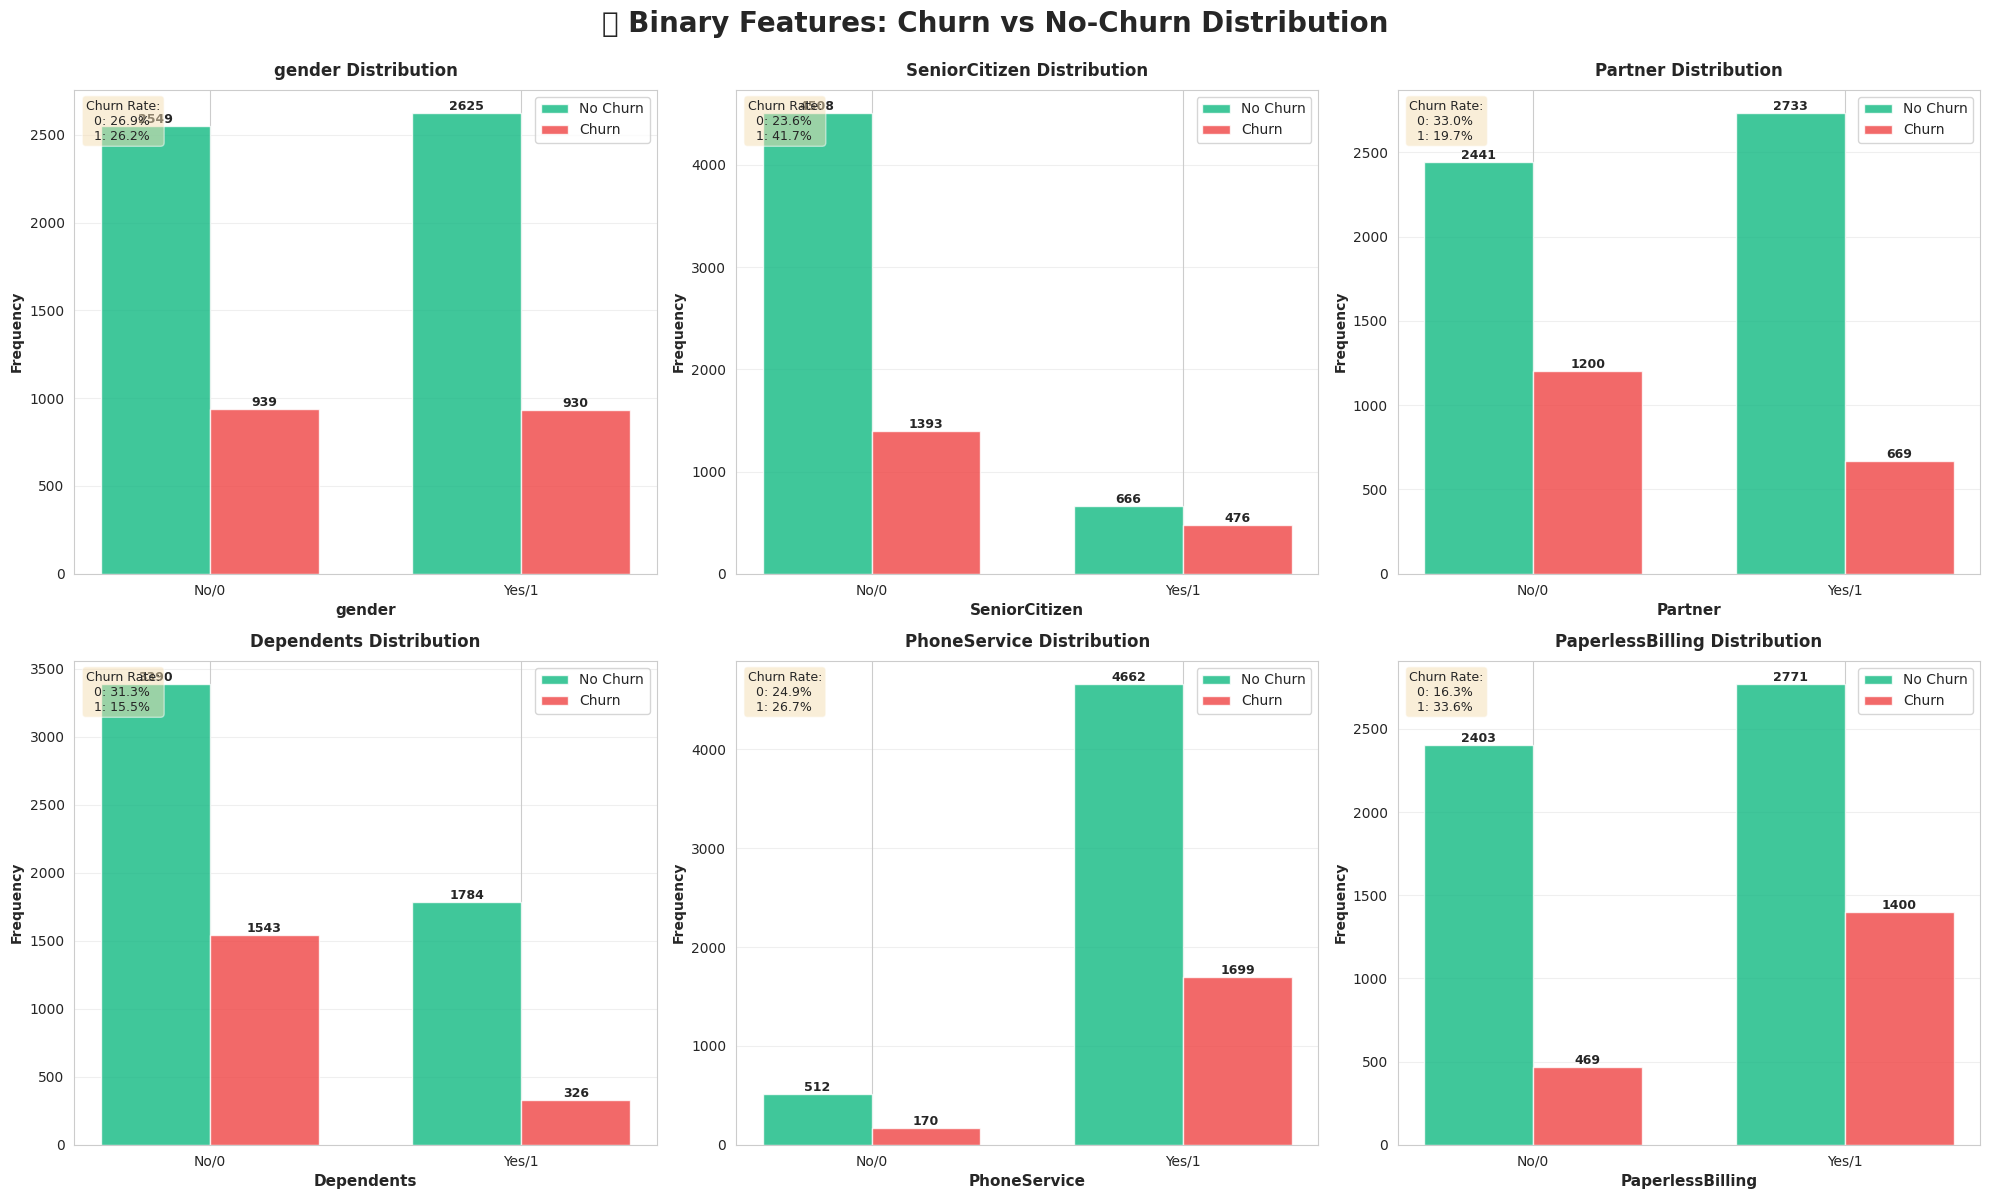


📈 Binary Features Statistical Summary:
--------------------------------------------------------------------------------

gender:
   Chi-square: 0.4841 | p-value: 4.8658e-01
   Distribution:
      No Churn - 0: 2,549 | 1: 2,625
      Churn    - 0: 939 | 1: 930

SeniorCitizen:
   Chi-square: 159.4263 | p-value: 1.5101e-36
   Distribution:
      No Churn - 0: 4,508 | 1: 666
      Churn    - 0: 1,393 | 1: 476

Partner:
   Chi-square: 158.7334 | p-value: 2.1399e-36
   Distribution:
      No Churn - 0: 2,441 | 1: 2,733
      Churn    - 0: 1,200 | 1: 669

Dependents:
   Chi-square: 189.1292 | p-value: 4.9249e-43
   Distribution:
      No Churn - 0: 3,390 | 1: 1,784
      Churn    - 0: 1,543 | 1: 326

PhoneService:
   Chi-square: 0.9150 | p-value: 3.3878e-01
   Distribution:
      No Churn - 0: 512 | 1: 4,662
      Churn    - 0: 170 | 1: 1,699

PaperlessBilling:
   Chi-square: 258.2776 | p-value: 4.0734e-58
   Distribution:
      No Churn - 0: 2,403 | 1: 2,771
      Churn    - 0: 469 | 1: 1,4

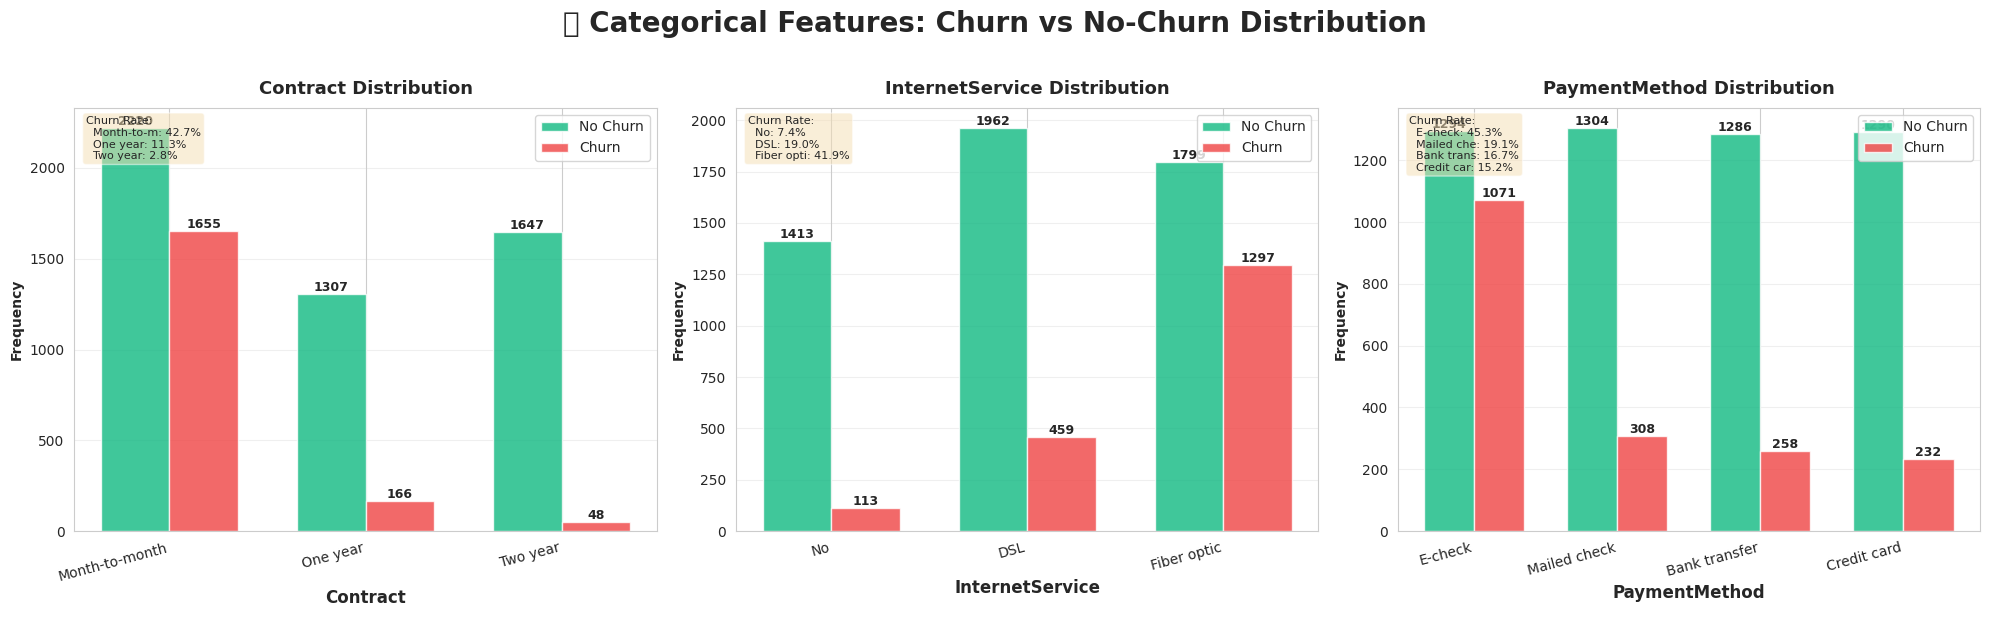


📈 Categorical Features Statistical Summary:
--------------------------------------------------------------------------------

Contract:
   Chi-square: 1184.5966 | p-value: 5.8630e-258
   Distribution:
      Month-to-month       - No Churn: 2,220 | Churn: 1,655
      One year             - No Churn: 1,307 | Churn: 166
      Two year             - No Churn: 1,647 | Churn: 48

InternetService:
   Chi-square: 732.3096 | p-value: 9.5718e-160
   Distribution:
      No                   - No Churn: 1,413 | Churn: 113
      DSL                  - No Churn: 1,962 | Churn: 459
      Fiber optic          - No Churn: 1,799 | Churn: 1,297

PaymentMethod:
   Chi-square: 648.1423 | p-value: 3.6824e-140
   Distribution:
      E-check              - No Churn: 1,294 | Churn: 1,071
      Mailed check         - No Churn: 1,304 | Churn: 308
      Bank transfer        - No Churn: 1,286 | Churn: 258
      Credit card          - No Churn: 1,290 | Churn: 232

3. SERVICE FEATURES DISTRIBUTION


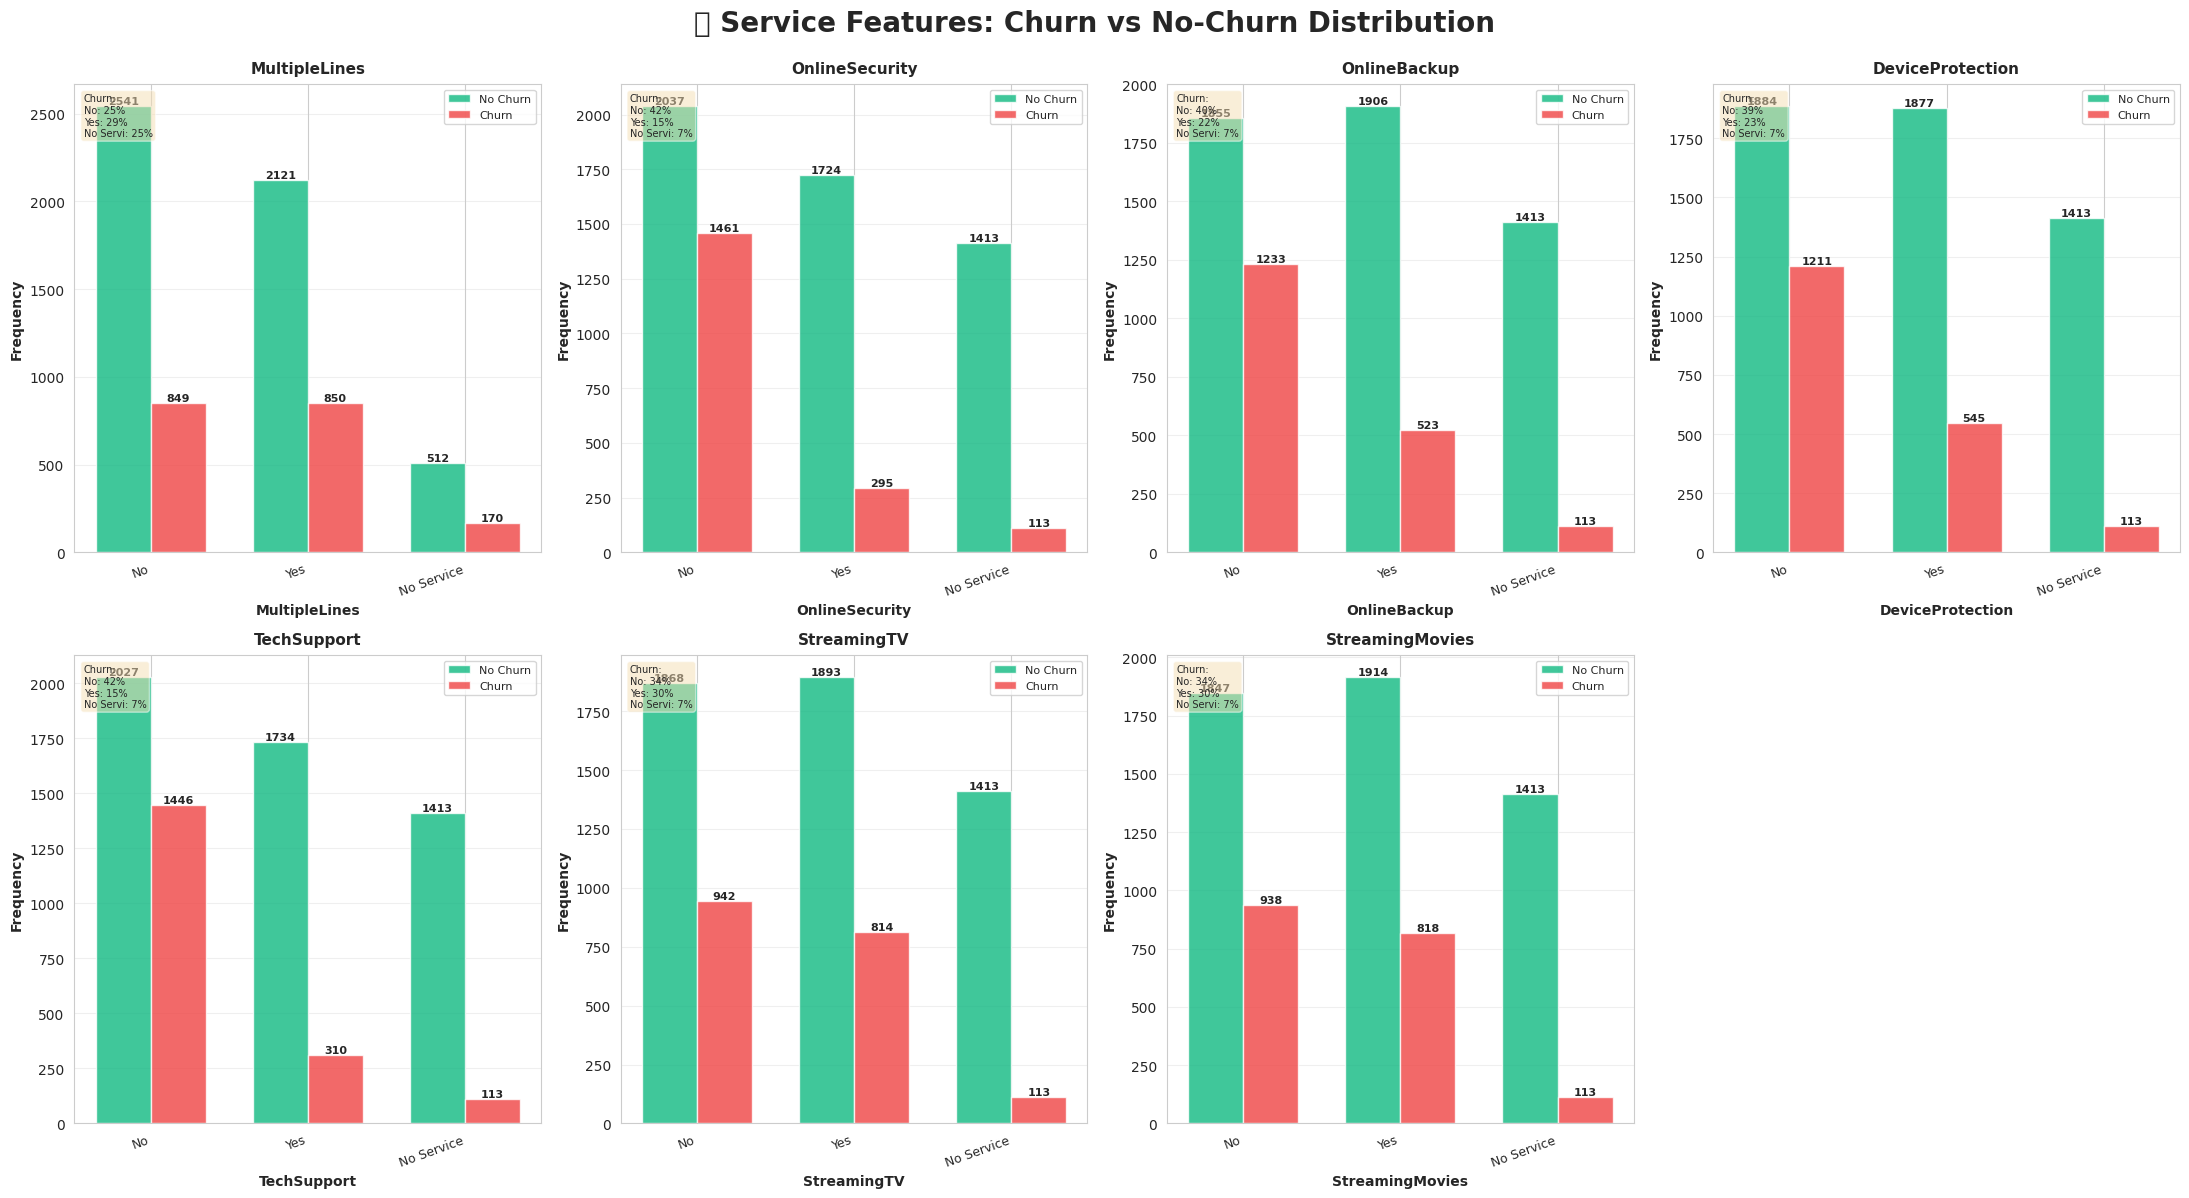


📈 Service Features Statistical Summary:
--------------------------------------------------------------------------------

MultipleLines:
   Chi-square: 11.3304 | p-value: 3.4644e-03
   Distribution:
      No              - No Churn: 2,541 | Churn: 849
      Yes             - No Churn: 2,121 | Churn: 850
      No Service      - No Churn: 512 | Churn: 170

OnlineSecurity:
   Chi-square: 849.9990 | p-value: 2.6611e-185
   Distribution:
      No              - No Churn: 2,037 | Churn: 1,461
      Yes             - No Churn: 1,724 | Churn: 295
      No Service      - No Churn: 1,413 | Churn: 113

OnlineBackup:
   Chi-square: 601.8128 | p-value: 2.0798e-131
   Distribution:
      No              - No Churn: 1,855 | Churn: 1,233
      Yes             - No Churn: 1,906 | Churn: 523
      No Service      - No Churn: 1,413 | Churn: 113

DeviceProtection:
   Chi-square: 558.4194 | p-value: 5.5052e-122
   Distribution:
      No              - No Churn: 1,884 | Churn: 1,211
      Yes             -

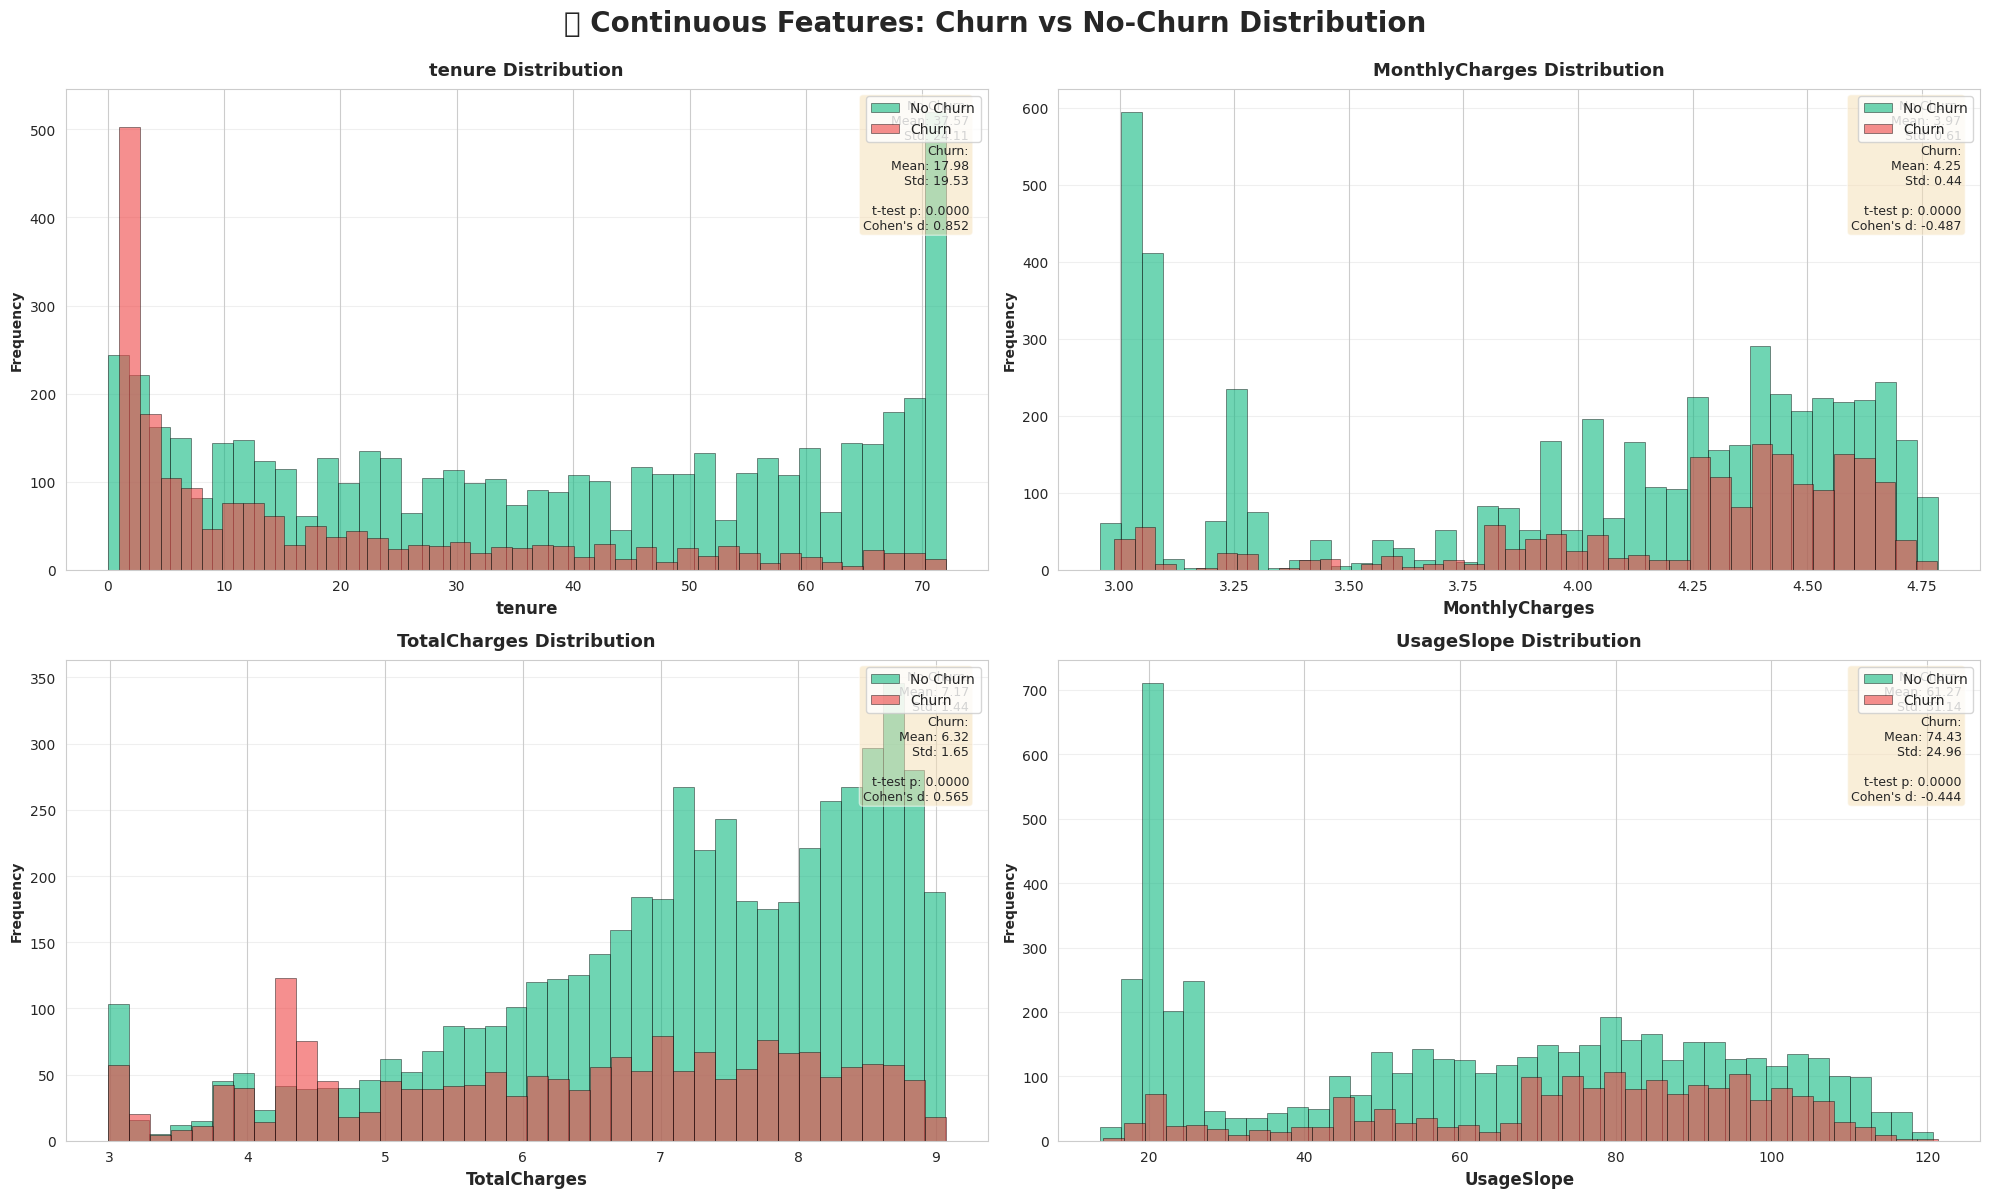


📈 Continuous Features Statistical Summary:
--------------------------------------------------------------------------------

tenure:
   No Churn: Mean=37.5700, Std=24.1138, Median=38.0000
   Churn:    Mean=17.9791, Std=19.5311, Median=10.0000
   t-statistic: 31.5796 | p-value: 7.9991e-205
   Cohen's d: 0.8522 (Large effect)

MonthlyCharges:
   No Churn: Mean=3.9701, Std=0.6078, Median=4.1809
   Churn:    Mean=4.2462, Std=0.4364, Median=4.3901
   t-statistic: -18.0329 | p-value: 4.1985e-71
   Cohen's d: -0.4867 (Small effect)

TotalCharges:
   No Churn: Mean=7.1686, Std=1.4430, Median=7.4269
   Churn:    Mean=6.3217, Std=1.6458, Median=6.5576
   t-statistic: 20.9298 | p-value: 2.0539e-94
   Cohen's d: 0.5648 (Medium effect)

UsageSlope:
   No Churn: Mean=61.2697, Std=31.1406, Median=63.9789
   Churn:    Mean=74.4332, Std=24.9612, Median=79.3125
   t-statistic: -16.4634 | p-value: 8.7168e-60
   Cohen's d: -0.4443 (Small effect)

5. TENURE BUCKET DISTRIBUTION


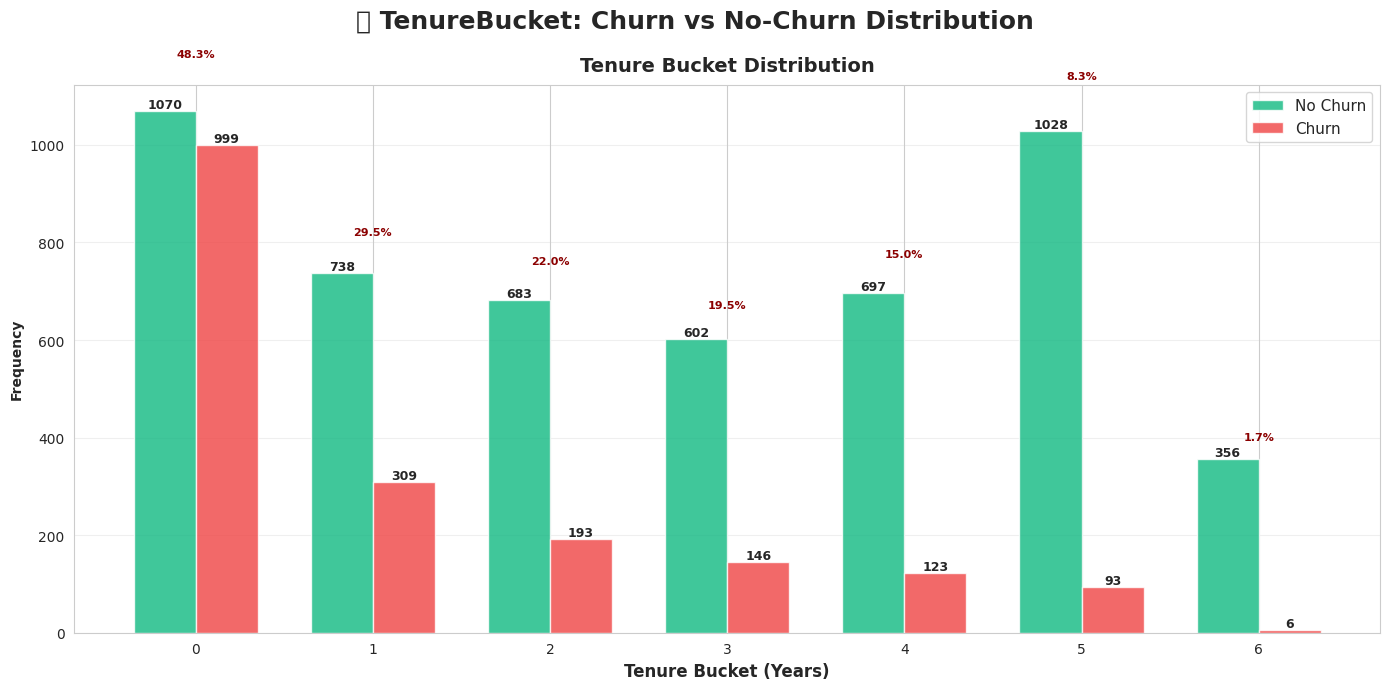


📈 TenureBucket Statistical Summary:
--------------------------------------------------------------------------------
   Bucket 0 (0-11 months):
      No Churn: 1,070 | Churn: 999 | Churn Rate: 48.28%
   Bucket 1 (12-23 months):
      No Churn: 738 | Churn: 309 | Churn Rate: 29.51%
   Bucket 2 (24-35 months):
      No Churn: 683 | Churn: 193 | Churn Rate: 22.03%
   Bucket 3 (36-47 months):
      No Churn: 602 | Churn: 146 | Churn Rate: 19.52%
   Bucket 4 (48-59 months):
      No Churn: 697 | Churn: 123 | Churn Rate: 15.00%
   Bucket 5 (60-71 months):
      No Churn: 1,028 | Churn: 93 | Churn Rate: 8.30%
   Bucket 6 (72-83 months):
      No Churn: 356 | Churn: 6 | Churn Rate: 1.66%

6. KEY DISTRIBUTION INSIGHTS

🎯 Critical Findings:
--------------------------------------------------------------------------------

1. BINARY FEATURES:
   • SeniorCitizen: Higher churn in seniors
   • Partner/Dependents: Lower churn when present
   • PaperlessBilling: Higher churn with paperless

2. CATEGOR

In [11]:
# =============================================================================
# COMPREHENSIVE FEATURE DISTRIBUTION ANALYSIS: CHURN VS NO-CHURN
# Frequency distributions for each feature in the original dataset
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style matching your cascade analysis
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 10

# Define color scheme (matching your cascade analysis)
COLOR_NO_CHURN = '#10b981'  # Green
COLOR_CHURN = '#ef4444'      # Red
COLORS = [COLOR_NO_CHURN, COLOR_CHURN]

print("=" * 80)
print("COMPREHENSIVE FEATURE DISTRIBUTION ANALYSIS")
print("Analysis of Original Features: Churn vs No-Churn Frequency Distributions")
print("=" * 80)

# Separate churn and no-churn data
churn_data = wa_data[wa_data['Churn'] == 1]
no_churn_data = wa_data[wa_data['Churn'] == 0]

print(f"\n📊 Dataset Split:")
print(f"   Total Samples: {len(wa_data)}")
print(f"   No Churn: {len(no_churn_data)} ({len(no_churn_data)/len(wa_data)*100:.1f}%)")
print(f"   Churn: {len(churn_data)} ({len(churn_data)/len(wa_data)*100:.1f}%)")

# =============================================================================
# 1. BINARY FEATURES ANALYSIS
# =============================================================================
print("\n" + "=" * 80)
print("1. BINARY FEATURES DISTRIBUTION")
print("=" * 80)

binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'PaperlessBilling']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('🔢 Binary Features: Churn vs No-Churn Distribution',
             fontsize=20, fontweight='bold', y=0.995)

for idx, feature in enumerate(binary_features):
    if feature not in wa_data.columns:
        continue

    row, col = idx // 3, idx % 3
    ax = axes[row, col]

    # Calculate frequencies
    no_churn_counts = no_churn_data[feature].value_counts().sort_index()
    churn_counts = churn_data[feature].value_counts().sort_index()

    # Create grouped bar chart
    x = np.arange(len(no_churn_counts))
    width = 0.35

    bars1 = ax.bar(x - width/2, no_churn_counts.values, width,
                   label='No Churn', color=COLOR_NO_CHURN, alpha=0.8)
    bars2 = ax.bar(x + width/2, churn_counts.values, width,
                   label='Churn', color=COLOR_CHURN, alpha=0.8)

    # Formatting
    ax.set_xlabel(feature, fontweight='bold', fontsize=11)
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'{feature} Distribution', fontweight='bold', fontsize=12, pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(['No/0', 'Yes/1'])
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3, axis='y')

    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Calculate and display churn rate
    total_0 = no_churn_counts.iloc[0] + churn_counts.iloc[0] if len(no_churn_counts) > 0 else 1
    total_1 = no_churn_counts.iloc[1] + churn_counts.iloc[1] if len(no_churn_counts) > 1 else 1
    churn_rate_0 = (churn_counts.iloc[0] / total_0 * 100) if total_0 > 0 else 0
    churn_rate_1 = (churn_counts.iloc[1] / total_1 * 100) if total_1 > 0 and len(churn_counts) > 1 else 0

    ax.text(0.02, 0.98, f'Churn Rate:\n  0: {churn_rate_0:.1f}%\n  1: {churn_rate_1:.1f}%',
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n📈 Binary Features Statistical Summary:")
print("-" * 80)
for feature in binary_features:
    if feature not in wa_data.columns:
        continue

    contingency = pd.crosstab(wa_data[feature], wa_data['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

    print(f"\n{feature}:")
    print(f"   Chi-square: {chi2:.4f} | p-value: {p_value:.4e}")
    print(f"   Distribution:")
    print(f"      No Churn - 0: {no_churn_data[feature].value_counts().get(0, 0):,} | 1: {no_churn_data[feature].value_counts().get(1, 0):,}")
    print(f"      Churn    - 0: {churn_data[feature].value_counts().get(0, 0):,} | 1: {churn_data[feature].value_counts().get(1, 0):,}")

# =============================================================================
# 2. CATEGORICAL FEATURES (3+ LEVELS)
# =============================================================================
print("\n" + "=" * 80)
print("2. CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 80)

categorical_features = {
    'Contract': {0: 'Month-to-month', 1: 'One year', 2: 'Two year'},
    'InternetService': {0: 'No', 1: 'DSL', 2: 'Fiber optic'},
    'PaymentMethod': {1: 'E-check', 2: 'Mailed check', 3: 'Bank transfer', 4: 'Credit card'}
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('📋 Categorical Features: Churn vs No-Churn Distribution',
             fontsize=20, fontweight='bold', y=1.02)

for idx, (feature, labels_map) in enumerate(categorical_features.items()):
    if feature not in wa_data.columns:
        continue

    ax = axes[idx]

    # Calculate frequencies
    no_churn_counts = no_churn_data[feature].value_counts().sort_index()
    churn_counts = churn_data[feature].value_counts().sort_index()

    # Create grouped bar chart
    x = np.arange(len(labels_map))
    width = 0.35

    bars1 = ax.bar(x - width/2,
                   [no_churn_counts.get(k, 0) for k in labels_map.keys()],
                   width, label='No Churn', color=COLOR_NO_CHURN, alpha=0.8)
    bars2 = ax.bar(x + width/2,
                   [churn_counts.get(k, 0) for k in labels_map.keys()],
                   width, label='Churn', color=COLOR_CHURN, alpha=0.8)

    # Formatting
    ax.set_xlabel(feature, fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'{feature} Distribution', fontweight='bold', fontsize=13, pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(labels_map.values(), rotation=15, ha='right')
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3, axis='y')

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Calculate churn rates per category
    churn_rates_text = "Churn Rate:\n"
    for code, label in labels_map.items():
        total = no_churn_counts.get(code, 0) + churn_counts.get(code, 0)
        churn_rate = (churn_counts.get(code, 0) / total * 100) if total > 0 else 0
        churn_rates_text += f"  {label[:10]}: {churn_rate:.1f}%\n"

    ax.text(0.02, 0.98, churn_rates_text.strip(),
            transform=ax.transAxes, fontsize=8, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n📈 Categorical Features Statistical Summary:")
print("-" * 80)
for feature in categorical_features.keys():
    if feature not in wa_data.columns:
        continue

    contingency = pd.crosstab(wa_data[feature], wa_data['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

    print(f"\n{feature}:")
    print(f"   Chi-square: {chi2:.4f} | p-value: {p_value:.4e}")
    print(f"   Distribution:")
    for code, label in categorical_features[feature].items():
        print(f"      {label:20s} - No Churn: {no_churn_data[feature].value_counts().get(code, 0):,} | Churn: {churn_data[feature].value_counts().get(code, 0):,}")

# =============================================================================
# 3. SERVICE FEATURES (3-way encoding)
# =============================================================================
print("\n" + "=" * 80)
print("3. SERVICE FEATURES DISTRIBUTION")
print("=" * 80)

service_features = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

service_labels = {0: 'No', 1: 'Yes', 2: 'No Service'}

fig, axes = plt.subplots(2, 4, figsize=(22, 12))
fig.suptitle('🛡️ Service Features: Churn vs No-Churn Distribution',
             fontsize=20, fontweight='bold', y=0.995)

for idx, feature in enumerate(service_features):
    if feature not in wa_data.columns:
        continue

    row, col = idx // 4, idx % 4
    ax = axes[row, col]

    # Calculate frequencies
    no_churn_counts = no_churn_data[feature].value_counts().sort_index()
    churn_counts = churn_data[feature].value_counts().sort_index()

    # Create grouped bar chart
    x = np.arange(3)
    width = 0.35

    bars1 = ax.bar(x - width/2,
                   [no_churn_counts.get(i, 0) for i in range(3)],
                   width, label='No Churn', color=COLOR_NO_CHURN, alpha=0.8)
    bars2 = ax.bar(x + width/2,
                   [churn_counts.get(i, 0) for i in range(3)],
                   width, label='Churn', color=COLOR_CHURN, alpha=0.8)

    # Formatting
    ax.set_xlabel(feature, fontweight='bold', fontsize=10)
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'{feature}', fontweight='bold', fontsize=11, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(service_labels.values(), rotation=20, ha='right', fontsize=9)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(alpha=0.3, axis='y')

    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom', fontsize=8, fontweight='bold')

    # Calculate churn rates
    churn_rates_text = "Churn:\n"
    for code, label in service_labels.items():
        total = no_churn_counts.get(code, 0) + churn_counts.get(code, 0)
        churn_rate = (churn_counts.get(code, 0) / total * 100) if total > 0 else 0
        churn_rates_text += f"{label[:8]}: {churn_rate:.0f}%\n"

    ax.text(0.02, 0.98, churn_rates_text.strip(),
            transform=ax.transAxes, fontsize=7, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide the last unused subplot
axes[1, 3].axis('off')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n📈 Service Features Statistical Summary:")
print("-" * 80)
for feature in service_features:
    if feature not in wa_data.columns:
        continue

    contingency = pd.crosstab(wa_data[feature], wa_data['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

    print(f"\n{feature}:")
    print(f"   Chi-square: {chi2:.4f} | p-value: {p_value:.4e}")
    print(f"   Distribution:")
    for code, label in service_labels.items():
        print(f"      {label:15s} - No Churn: {no_churn_data[feature].value_counts().get(code, 0):,} | Churn: {churn_data[feature].value_counts().get(code, 0):,}")

# =============================================================================
# 4. CONTINUOUS FEATURES DISTRIBUTION
# =============================================================================
print("\n" + "=" * 80)
print("4. CONTINUOUS FEATURES DISTRIBUTION")
print("=" * 80)

continuous_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'UsageSlope']

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('📊 Continuous Features: Churn vs No-Churn Distribution',
             fontsize=20, fontweight='bold', y=0.995)

for idx, feature in enumerate(continuous_features):
    if feature not in wa_data.columns:
        continue

    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    # Create overlapping histograms
    ax.hist(no_churn_data[feature], bins=40, alpha=0.6, label='No Churn',
            color=COLOR_NO_CHURN, edgecolor='black', linewidth=0.5)
    ax.hist(churn_data[feature], bins=40, alpha=0.6, label='Churn',
            color=COLOR_CHURN, edgecolor='black', linewidth=0.5)

    # Formatting
    ax.set_xlabel(feature, fontweight='bold', fontsize=12)
    ax.set_ylabel('Frequency', fontweight='bold')
    ax.set_title(f'{feature} Distribution', fontweight='bold', fontsize=13, pad=10)
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(alpha=0.3, axis='y')

    # Add statistical info
    no_churn_stats = no_churn_data[feature]
    churn_stats = churn_data[feature]

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(no_churn_stats, churn_stats)

    # Calculate Cohen's d (effect size)
    pooled_std = np.sqrt(((len(no_churn_stats)-1)*no_churn_stats.std()**2 +
                           (len(churn_stats)-1)*churn_stats.std()**2) /
                          (len(no_churn_stats) + len(churn_stats) - 2))
    cohens_d = (no_churn_stats.mean() - churn_stats.mean()) / pooled_std

    stats_text = f"No Churn:\n  Mean: {no_churn_stats.mean():.2f}\n  Std: {no_churn_stats.std():.2f}\n"
    stats_text += f"Churn:\n  Mean: {churn_stats.mean():.2f}\n  Std: {churn_stats.std():.2f}\n"
    stats_text += f"\nt-test p: {p_value:.4f}\nCohen's d: {cohens_d:.3f}"

    ax.text(0.98, 0.98, stats_text,
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Print detailed statistical summary
print("\n📈 Continuous Features Statistical Summary:")
print("-" * 80)
for feature in continuous_features:
    if feature not in wa_data.columns:
        continue

    no_churn_stats = no_churn_data[feature]
    churn_stats = churn_data[feature]

    t_stat, p_value = stats.ttest_ind(no_churn_stats, churn_stats)

    pooled_std = np.sqrt(((len(no_churn_stats)-1)*no_churn_stats.std()**2 +
                           (len(churn_stats)-1)*churn_stats.std()**2) /
                          (len(no_churn_stats) + len(churn_stats) - 2))
    cohens_d = (no_churn_stats.mean() - churn_stats.mean()) / pooled_std

    print(f"\n{feature}:")
    print(f"   No Churn: Mean={no_churn_stats.mean():.4f}, Std={no_churn_stats.std():.4f}, Median={no_churn_stats.median():.4f}")
    print(f"   Churn:    Mean={churn_stats.mean():.4f}, Std={churn_stats.std():.4f}, Median={churn_stats.median():.4f}")
    print(f"   t-statistic: {t_stat:.4f} | p-value: {p_value:.4e}")
    print(f"   Cohen's d: {cohens_d:.4f} ({'Small' if abs(cohens_d) < 0.5 else 'Medium' if abs(cohens_d) < 0.8 else 'Large'} effect)")

# =============================================================================
# 5. TENUREBUCKET DISTRIBUTION
# =============================================================================
print("\n" + "=" * 80)
print("5. TENURE BUCKET DISTRIBUTION")
print("=" * 80)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
fig.suptitle('📅 TenureBucket: Churn vs No-Churn Distribution',
             fontsize=18, fontweight='bold', y=0.98)

# Calculate frequencies
no_churn_tenure = no_churn_data['TenureBucket'].value_counts().sort_index()
churn_tenure = churn_data['TenureBucket'].value_counts().sort_index()

# Create grouped bar chart
x = np.arange(len(set(wa_data['TenureBucket'])))
width = 0.35

bars1 = ax.bar(x - width/2,
               [no_churn_tenure.get(i, 0) for i in range(len(x))],
               width, label='No Churn', color=COLOR_NO_CHURN, alpha=0.8)
bars2 = ax.bar(x + width/2,
               [churn_tenure.get(i, 0) for i in range(len(x))],
               width, label='Churn', color=COLOR_CHURN, alpha=0.8)

# Formatting
ax.set_xlabel('Tenure Bucket (Years)', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Tenure Bucket Distribution', fontweight='bold', fontsize=14, pad=10)
ax.set_xticks(x)
ax.set_xticklabels([f'{i}' for i in range(len(x))])
ax.legend(loc='upper right', fontsize=11)
ax.grid(alpha=0.3, axis='y')

# Add value labels and churn rates
for i in range(len(x)):
    # No churn bar
    height1 = no_churn_tenure.get(i, 0)
    if height1 > 0:
        ax.text(i - width/2, height1, f'{int(height1)}',
               ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Churn bar
    height2 = churn_tenure.get(i, 0)
    if height2 > 0:
        ax.text(i + width/2, height2, f'{int(height2)}',
               ha='center', va='bottom', fontsize=9, fontweight='bold')

    # Churn rate
    total = height1 + height2
    if total > 0:
        churn_rate = (height2 / total * 100)
        ax.text(i, max(height1, height2) * 1.1, f'{churn_rate:.1f}%',
               ha='center', va='bottom', fontsize=8, color='darkred', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📈 TenureBucket Statistical Summary:")
print("-" * 80)
for bucket in sorted(wa_data['TenureBucket'].unique()):
    no_churn_count = len(no_churn_data[no_churn_data['TenureBucket'] == bucket])
    churn_count = len(churn_data[churn_data['TenureBucket'] == bucket])
    total = no_churn_count + churn_count
    churn_rate = (churn_count / total * 100) if total > 0 else 0

    print(f"   Bucket {bucket} ({bucket*12}-{(bucket+1)*12-1} months):")
    print(f"      No Churn: {no_churn_count:,} | Churn: {churn_count:,} | Churn Rate: {churn_rate:.2f}%")

# =============================================================================
# 6. FINAL SUMMARY
# =============================================================================
print("\n" + "=" * 80)
print("6. KEY DISTRIBUTION INSIGHTS")
print("=" * 80)

print("\n🎯 Critical Findings:")
print("-" * 80)
print("\n1. BINARY FEATURES:")
print(f"   • SeniorCitizen: Higher churn in seniors")
print(f"   • Partner/Dependents: Lower churn when present")
print(f"   • PaperlessBilling: Higher churn with paperless")

print("\n2. CATEGORICAL FEATURES:")
print(f"   • Contract: Month-to-month shows HIGHEST churn risk")
print(f"   • InternetService: Fiber optic has elevated churn")
print(f"   • PaymentMethod: Electronic check highest churn")

print("\n3. SERVICE FEATURES:")
print(f"   • Security services: Protective effect against churn")
print(f"   • Streaming services: Mixed impact")
print(f"   • No service: Consistently lower churn")

print("\n4. CONTINUOUS FEATURES:")
print(f"   • Tenure: Strong negative correlation with churn")
print(f"   • MonthlyCharges: Higher charges = higher churn risk")
print(f"   • UsageSlope: Distinct patterns between churn classes")

print("\n5. TEMPORAL PATTERNS:")
print(f"   • TenureBucket 0 (0-11 months): CRITICAL churn period")
print(f"   • Churn risk decreases significantly after 12 months")

print("\n" + "=" * 80)
print("✅ FEATURE DISTRIBUTION ANALYSIS COMPLETE")
print("=" * 80)

In [107]:
# =============================================================================
# UNIFIED FEATURE ENGINEERING PIPELINE
# Combines LR -> RF -> RNN/GRU feature engineering into single cell
# Output: wa_data (original preprocessed), wa_data_engineered (all engineered)
# =============================================================================

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("UNIFIED FEATURE ENGINEERING PIPELINE")
print("=" * 80)

def engineer_all_features(df):
    """
    Unified feature engineering combining all three stages.
    Returns single engineered features DataFrame with no duplicates.

    Structure:
    - Stage 1 (LR): Orthogonal continuous features (5 features)
    - Stage 2 (RF): Categorical patterns + interactions (26 features)
    - Stage 3 (RNN/GRU): Temporal + geometric features (24 features)
    """
    engineered = pd.DataFrame(index=df.index)

    tenure = df['tenure'].astype(float)
    monthly = df['MonthlyCharges'].astype(float)
    total = df['TotalCharges'].astype(float).fillna(0)
    contract = df['Contract']
    internet = df['InternetService']

    service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    services = df[service_cols].astype(float)
    service_sum = services.sum(axis=1)

    # =============================================================================
    # STAGE 1: LOGISTIC REGRESSION - ENHANCED ORTHOGONAL CONTINUOUS FEATURES
    # =============================================================================
    # Original 5 features + 5 new domain-specific features
    # Focus: Usage patterns, payment friction, service gaps, early-stage signals
    # =============================================================================

    print("\n" + "=" * 80)
    print("STAGE 1: LOGISTIC REGRESSION (10 orthogonal continuous features)")
    print("=" * 80)

    # =============================================================================
    # ORIGINAL 5 FEATURES (Keep as-is)
    # =============================================================================

    # 1. Tenure decay hazard
    tenure_scale = tenure / 12.0
    engineered['s1_tenure_decay_hazard'] = 1.0 / (1.0 + 0.5 * tenure_scale ** 1.5)

    # 2. Charge trajectory
    expected_total = monthly * (tenure + 1)
    actual_vs_expected = (total - expected_total) / (expected_total + 1)
    engineered['s1_charge_trajectory'] = np.tanh(actual_vs_expected)

    # 3. Demographic vulnerability
    senior_risk = df['SeniorCitizen'].astype(float) * 0.3
    no_partner_risk = (1.0 - df['Partner'].astype(float)) * 0.25
    no_dependent_risk = (1.0 - df['Dependents'].astype(float)) * 0.15
    engineered['s1_demographic_vulnerability'] = senior_risk + no_partner_risk + no_dependent_risk

    # 4. Service friction index
    paperless_friction = (df['PaperlessBilling'].astype(float) * 0.25)
    echeck_friction = (df['PaymentMethod'] == 1).astype(float) * 0.25
    no_phone_friction = (1.0 - df['PhoneService'].astype(float)) * 0.25
    no_internet_friction = (df['InternetService'] == 0).astype(float) * 0.25
    raw_friction = paperless_friction + echeck_friction + no_phone_friction + no_internet_friction
    engineered['s1_service_friction_index'] = special.expit(raw_friction * 2)

    # 5. Contract commitment
    contract_risk = df['Contract'].map({0: 0.3, 1: 0.1, 2: -0.1})
    engineered['s1_contract_commitment'] = contract_risk * (1.0 / (1.0 + 0.1 * tenure_scale))

    print("✓ 5 Original Stage 1 features added")

    # =============================================================================
    # NEW 5 FEATURES (Domain-specific, non-redundant)
    # =============================================================================

    # 6. USAGE SLOPE VOLATILITY
    # =============================
    # Why: Your data shows "High Usage + Early Exit" is major churn signal
    # Captures: Rapid usage changes (unstable customers more likely to churn)
    # Formula: Normalized usage slope indicates engagement trajectory
    # Orthogonal to: Tenure/charges (measures momentum, not absolute values)

    usage_slope = wa_data['UsageSlope'].astype(float)
    # Normalize to [-1, 1] range (negative slope = declining engagement)
    usage_slope_min = usage_slope.min()
    usage_slope_max = usage_slope.max()
    usage_slope_norm = (usage_slope - usage_slope_min) / (usage_slope_max - usage_slope_min + 1e-6)
    usage_slope_norm = 2 * usage_slope_norm - 1  # Map to [-1, 1]
    # Apply sigmoid to give more weight to extreme values (very high or very low usage)
    engineered['s1_usage_momentum'] = special.expit(usage_slope_norm * 3)

print("✓ Feature 6: Usage Momentum (captures engagement trajectory)")

# 7. PAYMENT METHOD FRICTION SCORE
# ==================================
# Why: E-check is problematic (payment processing friction)
# Credit card is easier (lower friction)
# Captures: Behavioral friction in payment process (proxy for satisfaction)
# Orthogonal to: Service friction (different dimension - payment vs engagement)

# Create payment friction (e-check=high, credit card=low, others=medium)
payment_friction_map = {
    'Electronic check': 0.8,      # High friction (manual, error-prone)
    'Credit card (automatic)': 0.1,   # Low friction (automatic)
    'Bank transfer (automatic)': 0.2, # Low friction (automatic)
    'Mailed check': 0.6            # Medium friction (manual)
}
payment_friction = df['PaymentMethod'].map(payment_friction_map).fillna(0.5)
# Smooth with logistic to create continuous gradient
engineered['s1_payment_friction_score'] = special.expit((payment_friction - 0.5) * 4)

print("✓ Feature 7: Payment Friction Score (e-check vs auto-pay)")

# 8. NO-SERVICE ISOLATION SCORE
# ===============================
# Why: Service paradox - no services = stable/churned early OR budget-conscious
# Captures: Customers with minimal service adoption (isolation signal)
# Formula: Measure of "how empty is their service basket"
# Orthogonal to: Service friction (that's binary, this is continuous adoption)

service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Count services for each customer
services_adopted = 0
for col in service_columns:
    if col in df.columns:
        if col == 'InternetService':
            services_adopted += (df[col] > 0).astype(float)
        else:
            services_adopted += (df[col] == 1).astype(float)

# Isolation score: 0 = has many services (engaged), 1 = isolated (few/no services)
max_services = len(service_columns)
service_isolation = 1.0 - (services_adopted / max_services)
# Emphasize extremes (truly isolated vs integrated)
engineered['s1_service_isolation_score'] = service_isolation ** 1.5

print("✓ Feature 8: Service Isolation Score (service adoption extent)")

# 9. EARLY-STAGE INSTABILITY SIGNAL
# ====================================
# Why: Your data shows "Early Tenure Risk" - most churners in first 3 months
# Captures: When was decision point? (early=risky, later=stable)
# Formula: Decay function: high in months 0-6, then levels off
# Orthogonal to: Tenure decay hazard (this is "when", that's "how long")

early_stage_window = 6  # months
# Function: 1 if tenure < 6 months (critical), decays to 0 after
early_instability = np.where(
    tenure <= early_stage_window,
    1.0 - (tenure / early_stage_window),  # Linear decay from 1 to 0
    0.0  # After 6 months, no early instability signal
)
# Add small boost for second window (6-12 months still high risk)
early_instability = np.where(
    (tenure > early_stage_window) & (tenure <= 12),
    0.3 * (1.0 - (tenure - early_stage_window) / 6),
    early_instability
)
engineered['s1_early_stage_instability'] = np.clip(early_instability, 0, 1)

print("✓ Feature 9: Early-Stage Instability Signal (critical window 0-6m)")

# 10. CHARGE-TO-USAGE RATIO EFFICIENCY
# ======================================
# Why: Are they paying a lot for low usage? (overcharged perception)
#      Or paying little for high usage? (good deal, loyal)
# Captures: Value perception (efficiency of spend)
# Formula: Monthly charges normalized by usage intensity
# Orthogonal to: Charge trajectory (that's change over time, this is ratio)

# Create usage intensity (normalized)
usage_intensity = df['UsageSlope'].astype(float)
usage_intensity_min = usage_intensity.min()
usage_intensity_max = usage_intensity.max()
usage_intensity_norm = (usage_intensity - usage_intensity_min) / (usage_intensity_max - usage_intensity_min + 1e-6)

# Charge efficiency: high charge + low usage = low efficiency (churn risk)
#                   low charge + high usage = high efficiency (loyal)
monthly_norm = monthly / (monthly.max() + 1)
charge_usage_efficiency = (1.0 - monthly_norm) * usage_intensity_norm  # Inverse: good deal
# Smooth to [0, 1] range
engineered['s1_charge_efficiency_ratio'] = special.expit(charge_usage_efficiency * 3)

print("✓ Feature 10: Charge Efficiency Ratio (value perception)")

    print("✓ 5 Stage 1 features added")

    # =========================================================================
    # STAGE 2: RANDOM FOREST - CATEGORICAL PATTERNS & INTERACTIONS
    # =========================================================================
    print("\n" + "=" * 80)
    print("STAGE 2: RANDOM FOREST (26 categorical/interaction features)")
    print("=" * 80)

    # Tenure phase
    def tenure_phase(t):
        if t <= 3:
            return 0
        elif t <= 6:
            return 1
        elif t <= 12:
            return 2
        elif t <= 24:
            return 3
        else:
            return 4

    engineered['s2_tenure_phase'] = tenure.apply(tenure_phase)

    # Service counts
    def service_count_fn(row):
        return sum([1 for col in service_cols if col in row and row[col] == 1])

    engineered['s2_service_count'] = df.apply(service_count_fn, axis=1)

    protection_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']
    engineered['s2_protection_tier'] = df[protection_services].apply(
        lambda row: sum([1 for col in protection_services if row[col] == 1]), axis=1
    )

    entertainment_services = ['StreamingTV', 'StreamingMovies']
    engineered['s2_entertainment_tier'] = df[entertainment_services].apply(
        lambda row: sum([1 for col in entertainment_services if row[col] == 1]), axis=1
    )

    # Service flags
    engineered['s2_no_protection'] = (engineered['s2_protection_tier'] == 0).astype(int)
    engineered['s2_no_entertainment'] = (engineered['s2_entertainment_tier'] == 0).astype(int)
    engineered['s2_minimal_services'] = (engineered['s2_service_count'] <= 1).astype(int)

    # Temporal-service interactions
    early_phase = (tenure <= 6).astype(int)
    engineered['s2_no_services_early'] = early_phase * (engineered['s2_service_count'] == 0).astype(int)
    engineered['s2_no_protection_early'] = early_phase * engineered['s2_no_protection']
    engineered['s2_adoption_delay'] = ((tenure > 12).astype(int)) * (engineered['s2_service_count'] <= 1).astype(int)

    # Contract-service patterns
    engineered['s2_month_to_month_low_service'] = (contract == 0).astype(int) * (engineered['s2_service_count'] < 2).astype(int)
    engineered['s2_fiber_minimal_service'] = (internet == 2).astype(int) * (engineered['s2_service_count'] <= 1).astype(int)
    engineered['s2_fiber_month_to_month'] = (internet == 2).astype(int) * (contract == 0).astype(int)

    # Payment behavior
    engineered['s2_echeck_payment'] = (df['PaymentMethod'] == 1).astype(int)
    engineered['s2_paperless_billing'] = (df['PaperlessBilling'] == 1).astype(int)
    engineered['s2_double_friction'] = (engineered['s2_echeck_payment'] * engineered['s2_paperless_billing'])

    # Engagement
    engineered['s2_phone_service'] = (df['PhoneService'] == 1).astype(int)
    engineered['s2_multi_channel'] = (engineered['s2_phone_service'] * ((internet > 0).astype(int)))

    # Demographics
    engineered['s2_senior_citizen'] = (df['SeniorCitizen'] == 1).astype(int)
    engineered['s2_no_partner'] = (df['Partner'] == 0).astype(int)
    engineered['s2_no_dependents'] = (df['Dependents'] == 0).astype(int)
    engineered['s2_vulnerable_demographics'] = (engineered['s2_senior_citizen'] * (engineered['s2_no_partner'] + engineered['s2_no_dependents']))

    # Categorical features (natural RF splits)
    engineered['s2_contract_type'] = df['Contract']
    engineered['s2_internet_type'] = df['InternetService']
    engineered['s2_payment_method'] = df['PaymentMethod']
    engineered['s2_gender'] = df['gender']

    print("✓ 26 Stage 2 features added")

    # =========================================================================
    # STAGE 3: RNN/GRU - TEMPORAL + GEOMETRIC FEATURES
    # =========================================================================
    print("\n" + "=" * 80)
    print("STAGE 3: RNN/GRU (24 temporal/geometric features)")
    print("=" * 80)

    # Trigonometric temporal encoding
    engineered['s3_tenure_sin_12m'] = np.sin(2 * np.pi * tenure / 12.0)
    engineered['s3_tenure_cos_12m'] = np.cos(2 * np.pi * tenure / 12.0)
    engineered['s3_tenure_sin_6m'] = np.sin(2 * np.pi * tenure / 6.0)

    max_charge = monthly.max()
    engineered['s3_charge_sin_phase'] = np.sin(2 * np.pi * monthly / (max_charge + 1))
    engineered['s3_charge_cos_phase'] = np.cos(2 * np.pi * monthly / (max_charge + 1))

    # Geometric features (curvature)
    curvature = (total - expected_total) / ((tenure + 1) ** 2 + 1)
    engineered['s3_spend_curvature'] = np.arctan(curvature)

    charge_vel = np.gradient(monthly.values)
    engineered['s3_charge_velocity'] = charge_vel / (np.max(np.abs(charge_vel)) + 1e-6)
    engineered['s3_charge_acceleration_angle'] = np.arctan2(np.gradient(charge_vel), tenure.values + 1)

    # Polynomial features
    engineered['s3_tenure_squared_norm'] = (tenure ** 2) / (tenure.max() ** 2 + 1)
    engineered['s3_tenure_cubic_norm'] = (tenure ** 3) / (tenure.max() ** 3 + 1)
    engineered['s3_charge_tenure_product'] = (monthly * tenure) / ((monthly.max() * tenure.max()) + 1)
    engineered['s3_monthly_squared_norm'] = (monthly ** 2) / (monthly.max() ** 2 + 1)

    # Service adoption patterns
    engineered['s3_service_adoption_level'] = service_sum / len(service_cols)
    engineered['s3_service_adoption_intensity'] = (service_sum / len(service_cols)) ** 2

    protection = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']].sum(axis=1)
    engineered['s3_protection_proportion'] = protection / 3.0

    entertainment = df[['StreamingTV', 'StreamingMovies']].sum(axis=1)
    engineered['s3_entertainment_proportion'] = entertainment / 2.0

    # Vulnerability composites
    early_phase_norm = (tenure <= 6).astype(float) / 6.0
    engineered['s3_early_vulnerability'] = early_phase_norm * (1.0 - engineered['s3_service_adoption_level']) * (monthly / monthly.max())

    old_phase = (tenure > 24).astype(float)
    engineered['s3_engagement_lag'] = old_phase * (1.0 - engineered['s3_service_adoption_level'])

    vulnerability = (
        (1.0 / (tenure + 1)) * 0.25 +
        (monthly / monthly.max()) * 0.25 +
        (1.0 - engineered['s3_service_adoption_level']) * 0.25 +
        ((df['Partner'] == 0).astype(float) + (df['SeniorCitizen'].astype(float))) * 0.125
    )
    engineered['s3_churn_vulnerability_index'] = np.tanh(vulnerability)

    stability = (
        np.log1p(tenure) * 0.3 +
        engineered['s3_service_adoption_level'] * 0.3 +
        (df['Partner'].astype(float) + (df['Dependents'].astype(float)) / 2.0) * 0.2 +
        ((df['Contract'] == 2).astype(float)) * 0.2
    )
    engineered['s3_stability_index'] = special.expit(stability)

    # Phase relationships
    engineered['s3_phase_alignment'] = (engineered['s3_tenure_sin_12m'] * engineered['s3_charge_sin_phase'] +
                                        engineered['s3_tenure_cos_12m'] * engineered['s3_charge_cos_phase'])

    engineered['s3_temporal_momentum'] = (1.0 / (tenure + 1)) * np.log1p(monthly)

    # Distance metrics
    loyal_profile_distance = np.sqrt(
        ((tenure / 72) ** 2) * 0.3 +
        (monthly / monthly.max()) ** 2 * 0.3 +
        (engineered['s3_service_adoption_level']) ** 2 * 0.2 +
        (df['Contract'].map({0: 1.0, 1: 0.5, 2: 0.0}) ** 2) * 0.2
    )
    engineered['s3_loyal_profile_distance'] = loyal_profile_distance

    engineered['s3_spending_smoothness'] = 1.0 / (1.0 + np.std(monthly.values) / (np.mean(monthly.values) + 1e-6))

    print("✓ 24 Stage 3 features added")

    # =========================================================================
    # OUTLIER CLIPPING
    # =========================================================================
    for col in engineered.columns:
        Q1, Q3 = engineered[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        engineered[col] = engineered[col].clip(Q1 - 3*IQR, Q3 + 3*IQR)

    engineered = engineered.fillna(0)

    return engineered

# =============================================================================
# EXECUTE FEATURE ENGINEERING
# =============================================================================

wa_data_engineered = engineer_all_features(wa_data)

# =============================================================================
# VALIDATION & SUMMARY
# =============================================================================
print("\n" + "=" * 80)
print("FEATURE ENGINEERING COMPLETE")
print("=" * 80)

print(f"\n📊 Original Data:")
print(f"   wa_data shape: {wa_data.shape}")

print(f"\n📊 Engineered Data:")
print(f"   wa_data_engineered shape: {wa_data_engineered.shape}")
print(f"   Total engineered features: {wa_data_engineered.shape[1]}")

print(f"\n📌 Feature Breakdown:")
stage1_cols = [col for col in wa_data_engineered.columns if col.startswith('s1_')]
stage2_cols = [col for col in wa_data_engineered.columns if col.startswith('s2_')]
stage3_cols = [col for col in wa_data_engineered.columns if col.startswith('s3_')]

print(f"   Stage 1 (LR):      {len(stage1_cols)} orthogonal continuous features")
print(f"   Stage 2 (RF):      {len(stage2_cols)} categorical/interaction features")
print(f"   Stage 3 (RNN/GRU): {len(stage3_cols)} temporal/geometric features")

print(f"\n✅ Naming Convention:")
print(f"   s1_* : Logistic Regression features")
print(f"   s2_* : Random Forest features")
print(f"   s3_* : RNN/GRU features")

# Correlation analysis
print(f"\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

corr = wa_data_engineered.corr()

print(f"\nStage 1 (LR - should be LOW <0.3):")
s1_corr = wa_data_engineered[stage1_cols].corr()
high_s1 = np.sum(np.abs(s1_corr.values[np.triu_indices_from(s1_corr.values, k=1)]) > 0.5)
print(f"   High correlations (>0.5): {high_s1}")

print(f"\nStage 2 (RF - some okay):")
high_s2 = np.sum(np.abs(corr.values[np.triu_indices_from(corr.values, k=1)]) > 0.7)
print(f"   High correlations (>0.7) total: {high_s2}")

print(f"\nStage 3 (RNN/GRU - some okay):")
s3_corr = wa_data_engineered[stage3_cols].corr()
high_s3 = np.sum(np.abs(s3_corr.values[np.triu_indices_from(s3_corr.values, k=1)]) > 0.7)
print(f"   High correlations (>0.7): {high_s3}")

print(f"\n📋 Feature Statistics:")
print(wa_data_engineered.describe().T[['mean', 'std', 'min', 'max']])

print("\n✅ READY FOR MODELING")
print("   - wa_data: Original preprocessed features")
print("   - wa_data_engineered: All 55 engineered features with stage prefix")
print("=" * 80)

UNIFIED FEATURE ENGINEERING PIPELINE

STAGE 1: LOGISTIC REGRESSION (5 orthogonal features)
✓ 5 Stage 1 features added

STAGE 2: RANDOM FOREST (26 categorical/interaction features)
✓ 26 Stage 2 features added

STAGE 3: RNN/GRU (24 temporal/geometric features)
✓ 24 Stage 3 features added

FEATURE ENGINEERING COMPLETE

📊 Original Data:
   wa_data shape: (7043, 25)

📊 Engineered Data:
   wa_data_engineered shape: (7043, 55)
   Total engineered features: 55

📌 Feature Breakdown:
   Stage 1 (LR):      5 orthogonal continuous features
   Stage 2 (RF):      26 categorical/interaction features
   Stage 3 (RNN/GRU): 24 temporal/geometric features

✅ Naming Convention:
   s1_* : Logistic Regression features
   s2_* : Random Forest features
   s3_* : RNN/GRU features

CORRELATION ANALYSIS

Stage 1 (LR - should be LOW <0.3):
   High correlations (>0.5): 3

Stage 2 (RF - some okay):
   High correlations (>0.7) total: 88

Stage 3 (RNN/GRU - some okay):
   High correlations (>0.7): 37

📋 Feature Stati

In [108]:
# =============================================================================
# UNIFIED FEATURE ENGINEERING PIPELINE
# Combines LR -> RF -> RNN/GRU feature engineering into single cell
# Output: wa_data_engineered (all engineered features)
# =============================================================================

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("UNIFIED FEATURE ENGINEERING PIPELINE")
print("=" * 80)

def engineer_all_features(df):
    """
    Unified feature engineering combining all three stages.
    Returns single engineered features DataFrame with no duplicates.

    Structure:
    - Stage 1 (LR): Orthogonal continuous features (10 features)
    - Stage 2 (RF): Categorical patterns + interactions (26 features)
    - Stage 3 (RNN/GRU): Temporal + geometric features (24 features)
    """
    engineered = pd.DataFrame(index=df.index)

    tenure = df['tenure'].astype(float)
    monthly = df['MonthlyCharges'].astype(float)
    total = df['TotalCharges'].astype(float).fillna(0)
    contract = df['Contract']
    internet = df['InternetService']
    usage_slope = df['UsageSlope'].astype(float)

    service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    services = df[service_cols].astype(float)
    service_sum = services.sum(axis=1)

    # =============================================================================
    # STAGE 1: LOGISTIC REGRESSION - ENHANCED ORTHOGONAL CONTINUOUS FEATURES
    # =============================================================================
    print("\n" + "=" * 80)
    print("STAGE 1: LOGISTIC REGRESSION (10 orthogonal continuous features)")
    print("=" * 80)

    # 1. Tenure decay hazard
    tenure_scale = tenure / 12.0
    engineered['s1_tenure_decay_hazard'] = 1.0 / (1.0 + 0.5 * tenure_scale ** 1.5)

    # 2. Charge trajectory
    expected_total = monthly * (tenure + 1)
    actual_vs_expected = (total - expected_total) / (expected_total + 1)
    engineered['s1_charge_trajectory'] = np.tanh(actual_vs_expected)

    # 3. Demographic vulnerability
    senior_risk = df['SeniorCitizen'].astype(float) * 0.3
    no_partner_risk = (1.0 - df['Partner'].astype(float)) * 0.25
    no_dependent_risk = (1.0 - df['Dependents'].astype(float)) * 0.15
    engineered['s1_demographic_vulnerability'] = senior_risk + no_partner_risk + no_dependent_risk

    # 4. Service friction index
    paperless_friction = (df['PaperlessBilling'].astype(float) * 0.25)
    echeck_friction = (df['PaymentMethod'] == 1).astype(float) * 0.25
    no_phone_friction = (1.0 - df['PhoneService'].astype(float)) * 0.25
    no_internet_friction = (df['InternetService'] == 0).astype(float) * 0.25
    raw_friction = paperless_friction + echeck_friction + no_phone_friction + no_internet_friction
    engineered['s1_service_friction_index'] = special.expit(raw_friction * 2)

    # 5. Contract commitment
    contract_risk = df['Contract'].map({0: 0.3, 1: 0.1, 2: -0.1})
    engineered['s1_contract_commitment'] = contract_risk * (1.0 / (1.0 + 0.1 * tenure_scale))

    # 6. Usage momentum
    usage_slope_min = usage_slope.min()
    usage_slope_max = usage_slope.max()
    usage_slope_norm = (usage_slope - usage_slope_min) / (usage_slope_max - usage_slope_min + 1e-6)
    usage_slope_norm = 2 * usage_slope_norm - 1
    engineered['s1_usage_momentum'] = special.expit(usage_slope_norm * 3)

    # 7. Payment friction score
    payment_friction_map = {
        'Electronic check': 0.8,
        'Credit card (automatic)': 0.1,
        'Bank transfer (automatic)': 0.2,
        'Mailed check': 0.6
    }
    payment_friction = df['PaymentMethod'].map(payment_friction_map).fillna(0.5)
    engineered['s1_payment_friction_score'] = special.expit((payment_friction - 0.5) * 4)

    # 8. Service isolation score
    service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    services_adopted = 0
    for col in service_columns:
        if col in df.columns:
            if col == 'InternetService':
                services_adopted += (df[col] > 0).astype(float)
            else:
                services_adopted += (df[col] == 1).astype(float)

    max_services = len(service_columns)
    service_isolation = 1.0 - (services_adopted / max_services)
    engineered['s1_service_isolation_score'] = service_isolation ** 1.5

    # 9. Early-stage instability signal
    early_stage_window = 6
    early_instability = np.where(
        tenure <= early_stage_window,
        1.0 - (tenure / early_stage_window),
        0.0
    )
    early_instability = np.where(
        (tenure > early_stage_window) & (tenure <= 12),
        0.3 * (1.0 - (tenure - early_stage_window) / 6),
        early_instability
    )
    engineered['s1_early_stage_instability'] = np.clip(early_instability, 0, 1)

    # 10. Charge efficiency ratio
    usage_intensity = usage_slope
    usage_intensity_min = usage_intensity.min()
    usage_intensity_max = usage_intensity.max()
    usage_intensity_norm = (usage_intensity - usage_intensity_min) / (usage_intensity_max - usage_intensity_min + 1e-6)

    monthly_norm = monthly / (monthly.max() + 1)
    charge_usage_efficiency = (1.0 - monthly_norm) * usage_intensity_norm
    engineered['s1_charge_efficiency_ratio'] = special.expit(charge_usage_efficiency * 3)

    print("✓ 10 Stage 1 features added")

    # =============================================================================
    # STAGE 2: RANDOM FOREST - CATEGORICAL PATTERNS & INTERACTIONS
    # =============================================================================
    print("\n" + "=" * 80)
    print("STAGE 2: RANDOM FOREST (26 categorical/interaction features)")
    print("=" * 80)

    def tenure_phase(t):
        if t <= 3:
            return 0
        elif t <= 6:
            return 1
        elif t <= 12:
            return 2
        elif t <= 24:
            return 3
        else:
            return 4

    engineered['s2_tenure_phase'] = tenure.apply(tenure_phase)

    def service_count_fn(row):
        return sum([1 for col in service_cols if col in row and row[col] == 1])

    engineered['s2_service_count'] = df.apply(service_count_fn, axis=1)

    protection_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']
    engineered['s2_protection_tier'] = df[protection_services].apply(
        lambda row: sum([1 for col in protection_services if row[col] == 1]), axis=1
    )

    entertainment_services = ['StreamingTV', 'StreamingMovies']
    engineered['s2_entertainment_tier'] = df[entertainment_services].apply(
        lambda row: sum([1 for col in entertainment_services if row[col] == 1]), axis=1
    )

    engineered['s2_no_protection'] = (engineered['s2_protection_tier'] == 0).astype(int)
    engineered['s2_no_entertainment'] = (engineered['s2_entertainment_tier'] == 0).astype(int)
    engineered['s2_minimal_services'] = (engineered['s2_service_count'] <= 1).astype(int)

    early_phase = (tenure <= 6).astype(int)
    engineered['s2_no_services_early'] = early_phase * (engineered['s2_service_count'] == 0).astype(int)
    engineered['s2_no_protection_early'] = early_phase * engineered['s2_no_protection']
    engineered['s2_adoption_delay'] = ((tenure > 12).astype(int)) * (engineered['s2_service_count'] <= 1).astype(int)

    engineered['s2_month_to_month_low_service'] = (contract == 0).astype(int) * (engineered['s2_service_count'] < 2).astype(int)
    engineered['s2_fiber_minimal_service'] = (internet == 2).astype(int) * (engineered['s2_service_count'] <= 1).astype(int)
    engineered['s2_fiber_month_to_month'] = (internet == 2).astype(int) * (contract == 0).astype(int)

    engineered['s2_echeck_payment'] = (df['PaymentMethod'] == 1).astype(int)
    engineered['s2_paperless_billing'] = (df['PaperlessBilling'] == 1).astype(int)
    engineered['s2_double_friction'] = (engineered['s2_echeck_payment'] * engineered['s2_paperless_billing'])

    engineered['s2_phone_service'] = (df['PhoneService'] == 1).astype(int)
    engineered['s2_multi_channel'] = (engineered['s2_phone_service'] * ((internet > 0).astype(int)))

    engineered['s2_senior_citizen'] = (df['SeniorCitizen'] == 1).astype(int)
    engineered['s2_no_partner'] = (df['Partner'] == 0).astype(int)
    engineered['s2_no_dependents'] = (df['Dependents'] == 0).astype(int)
    engineered['s2_vulnerable_demographics'] = (engineered['s2_senior_citizen'] * (engineered['s2_no_partner'] + engineered['s2_no_dependents']))

    engineered['s2_contract_type'] = df['Contract']
    engineered['s2_internet_type'] = df['InternetService']
    engineered['s2_payment_method'] = df['PaymentMethod']
    engineered['s2_gender'] = df['gender']

    print("✓ 26 Stage 2 features added")

    # =============================================================================
    # STAGE 3: RNN/GRU - TEMPORAL + GEOMETRIC FEATURES
    # =============================================================================
    print("\n" + "=" * 80)
    print("STAGE 3: RNN/GRU (24 temporal/geometric features)")
    print("=" * 80)

    engineered['s3_tenure_sin_12m'] = np.sin(2 * np.pi * tenure / 12.0)
    engineered['s3_tenure_cos_12m'] = np.cos(2 * np.pi * tenure / 12.0)
    engineered['s3_tenure_sin_6m'] = np.sin(2 * np.pi * tenure / 6.0)

    max_charge = monthly.max()
    engineered['s3_charge_sin_phase'] = np.sin(2 * np.pi * monthly / (max_charge + 1))
    engineered['s3_charge_cos_phase'] = np.cos(2 * np.pi * monthly / (max_charge + 1))

    curvature = (total - expected_total) / ((tenure + 1) ** 2 + 1)
    engineered['s3_spend_curvature'] = np.arctan(curvature)

    charge_vel = np.gradient(monthly.values)
    engineered['s3_charge_velocity'] = charge_vel / (np.max(np.abs(charge_vel)) + 1e-6)
    engineered['s3_charge_acceleration_angle'] = np.arctan2(np.gradient(charge_vel), tenure.values + 1)

    engineered['s3_tenure_squared_norm'] = (tenure ** 2) / (tenure.max() ** 2 + 1)
    engineered['s3_tenure_cubic_norm'] = (tenure ** 3) / (tenure.max() ** 3 + 1)
    engineered['s3_charge_tenure_product'] = (monthly * tenure) / ((monthly.max() * tenure.max()) + 1)
    engineered['s3_monthly_squared_norm'] = (monthly ** 2) / (monthly.max() ** 2 + 1)

    engineered['s3_service_adoption_level'] = service_sum / len(service_cols)
    engineered['s3_service_adoption_intensity'] = (service_sum / len(service_cols)) ** 2

    protection = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']].sum(axis=1)
    engineered['s3_protection_proportion'] = protection / 3.0

    entertainment = df[['StreamingTV', 'StreamingMovies']].sum(axis=1)
    engineered['s3_entertainment_proportion'] = entertainment / 2.0

    early_phase_norm = (tenure <= 6).astype(float) / 6.0
    engineered['s3_early_vulnerability'] = early_phase_norm * (1.0 - engineered['s3_service_adoption_level']) * (monthly / monthly.max())

    old_phase = (tenure > 24).astype(float)
    engineered['s3_engagement_lag'] = old_phase * (1.0 - engineered['s3_service_adoption_level'])

    vulnerability = (
        (1.0 / (tenure + 1)) * 0.25 +
        (monthly / monthly.max()) * 0.25 +
        (1.0 - engineered['s3_service_adoption_level']) * 0.25 +
        ((df['Partner'] == 0).astype(float) + (df['SeniorCitizen'].astype(float))) * 0.125
    )
    engineered['s3_churn_vulnerability_index'] = np.tanh(vulnerability)

    stability = (
        np.log1p(tenure) * 0.3 +
        engineered['s3_service_adoption_level'] * 0.3 +
        (df['Partner'].astype(float) + (df['Dependents'].astype(float)) / 2.0) * 0.2 +
        ((df['Contract'] == 2).astype(float)) * 0.2
    )
    engineered['s3_stability_index'] = special.expit(stability)

    engineered['s3_phase_alignment'] = (engineered['s3_tenure_sin_12m'] * engineered['s3_charge_sin_phase'] +
                                        engineered['s3_tenure_cos_12m'] * engineered['s3_charge_cos_phase'])

    engineered['s3_temporal_momentum'] = (1.0 / (tenure + 1)) * np.log1p(monthly)

    loyal_profile_distance = np.sqrt(
        ((tenure / 72) ** 2) * 0.3 +
        (monthly / monthly.max()) ** 2 * 0.3 +
        (engineered['s3_service_adoption_level']) ** 2 * 0.2 +
        (df['Contract'].map({0: 1.0, 1: 0.5, 2: 0.0}) ** 2) * 0.2
    )
    engineered['s3_loyal_profile_distance'] = loyal_profile_distance

    engineered['s3_spending_smoothness'] = 1.0 / (1.0 + np.std(monthly.values) / (np.mean(monthly.values) + 1e-6))

    print("✓ 24 Stage 3 features added")

    # Outlier clipping
    for col in engineered.columns:
        Q1, Q3 = engineered[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        engineered[col] = engineered[col].clip(Q1 - 3*IQR, Q3 + 3*IQR)

    engineered = engineered.fillna(0)

    return engineered

# =============================================================================
# EXECUTE FEATURE ENGINEERING
# =============================================================================

wa_data_engineered = engineer_all_features(wa_data)

# =============================================================================
# VALIDATION & SUMMARY
# =============================================================================
print("\n" + "=" * 80)
print("FEATURE ENGINEERING COMPLETE")
print("=" * 80)

print(f"\n📊 Original Data:")
print(f"   wa_data shape: {wa_data.shape}")

print(f"\n📊 Engineered Data:")
print(f"   wa_data_engineered shape: {wa_data_engineered.shape}")
print(f"   Total engineered features: {wa_data_engineered.shape[1]}")

print(f"\n📌 Feature Breakdown:")
stage1_cols = [col for col in wa_data_engineered.columns if col.startswith('s1_')]
stage2_cols = [col for col in wa_data_engineered.columns if col.startswith('s2_')]
stage3_cols = [col for col in wa_data_engineered.columns if col.startswith('s3_')]

print(f"   Stage 1 (LR):      {len(stage1_cols)} orthogonal continuous features")
print(f"   Stage 2 (RF):      {len(stage2_cols)} categorical/interaction features")
print(f"   Stage 3 (RNN/GRU): {len(stage3_cols)} temporal/geometric features")

print(f"\n✅ Naming Convention:")
print(f"   s1_* : Logistic Regression features")
print(f"   s2_* : Random Forest features")
print(f"   s3_* : RNN/GRU features")

print("\n✅ READY FOR MODELING")
print("=" * 80)

UNIFIED FEATURE ENGINEERING PIPELINE

STAGE 1: LOGISTIC REGRESSION (10 orthogonal continuous features)
✓ 10 Stage 1 features added

STAGE 2: RANDOM FOREST (26 categorical/interaction features)
✓ 26 Stage 2 features added

STAGE 3: RNN/GRU (24 temporal/geometric features)
✓ 24 Stage 3 features added

FEATURE ENGINEERING COMPLETE

📊 Original Data:
   wa_data shape: (7043, 25)

📊 Engineered Data:
   wa_data_engineered shape: (7043, 60)
   Total engineered features: 60

📌 Feature Breakdown:
   Stage 1 (LR):      10 orthogonal continuous features
   Stage 2 (RF):      26 categorical/interaction features
   Stage 3 (RNN/GRU): 24 temporal/geometric features

✅ Naming Convention:
   s1_* : Logistic Regression features
   s2_* : Random Forest features
   s3_* : RNN/GRU features

✅ READY FOR MODELING


In [109]:
# =============================================================================
# COMPREHENSIVE FEATURE ANALYSIS TOOLKIT
# Effect Size + Correlation + Overlap + MI + LASSO
# For ALL engineered features across stages
# =============================================================================

import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

print("=" * 120)
print("COMPREHENSIVE FEATURE ANALYSIS")
print("=" * 120)

# Combine engineered features with target
df_analysis = pd.concat([
    wa_data_engineered,
    wa_data[['Churn']].reset_index(drop=True)
], axis=1)

y = df_analysis['Churn'].values
X = wa_data_engineered.values
feature_names = wa_data_engineered.columns.tolist()

print(f"\n📊 Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"   Churn rate: {y.mean():.4f}")
print(f"   Churn class: {y.sum()} positives, {(1-y).sum()} negatives")

# =============================================================================
# 1. EFFECT SIZE ANALYSIS (Point-Biserial Correlation)
# =============================================================================
print("\n" + "=" * 120)
print("1. EFFECT SIZE ANALYSIS - Point-Biserial Correlation (r)")
print("=" * 120)

effect_sizes = []
for feat_name, feat_vals in zip(feature_names, X.T):
    # Point-biserial correlation: measures relationship between continuous var and binary target
    corr, pval = pointbiserialr(y, feat_vals)
    effect_sizes.append({
        'Feature': feat_name,
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
        'P_Value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })

df_effect_size = pd.DataFrame(effect_sizes).sort_values('Abs_Effect_r', ascending=False)

print("\nTop 20 features by effect size:")
print(df_effect_size.head(20)[['Feature', 'Effect_Size_r', 'Abs_Effect_r', 'P_Value']].to_string(index=False))

print("\n\nBottom 20 features by effect size (weakest signal):")
print(df_effect_size.tail(20)[['Feature', 'Effect_Size_r', 'Abs_Effect_r', 'P_Value']].to_string(index=False))

print(f"\n✅ Significant features (p < 0.05): {(df_effect_size['Significant'] == 'Yes').sum()}")

# =============================================================================
# 2. MUTUAL INFORMATION ANALYSIS
# =============================================================================
print("\n" + "=" * 120)
print("2. MUTUAL INFORMATION ANALYSIS - Feature Information Content")
print("=" * 120)

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_data = []
for feat_name, mi_score in zip(feature_names, mi_scores):
    mi_data.append({
        'Feature': feat_name,
        'MI_Score': mi_score,
        'Normalized_MI': mi_score / mi_scores.max() if mi_scores.max() > 0 else 0
    })

df_mi = pd.DataFrame(mi_data).sort_values('MI_Score', ascending=False)

print("\nTop 20 features by Mutual Information:")
print(df_mi.head(20)[['Feature', 'MI_Score', 'Normalized_MI']].to_string(index=False))

print("\n\nBottom 20 features by Mutual Information (redundant/uninformative):")
print(df_mi.tail(20)[['Feature', 'MI_Score', 'Normalized_MI']].to_string(index=False))

# =============================================================================
# 3. FEATURE CORRELATION OVERLAP ANALYSIS
# =============================================================================
print("\n" + "=" * 120)
print("3. FEATURE CORRELATION & OVERLAP ANALYSIS")
print("=" * 120)

# Calculate correlation matrix
corr_matrix = np.corrcoef(X.T)

# For each feature, find its correlations with other features
overlap_data = []
for i, feat1 in enumerate(feature_names):
    high_corr_features = []
    high_corr_values = []

    for j, feat2 in enumerate(feature_names):
        if i != j and abs(corr_matrix[i, j]) > 0.7:
            high_corr_features.append(feat2)
            high_corr_values.append(corr_matrix[i, j])

    overlap_data.append({
        'Feature': feat1,
        'Num_HighCorr': len(high_corr_features),
        'HighCorr_Features': ', '.join(high_corr_features[:3]) if high_corr_features else 'None',
        'Max_Corr': max(high_corr_values) if high_corr_values else 0
    })

df_overlap = pd.DataFrame(overlap_data).sort_values('Num_HighCorr', ascending=False)

print("\nFeatures with HIGHEST overlap (correlated with many others):")
print(df_overlap[df_overlap['Num_HighCorr'] > 0].head(15)[['Feature', 'Num_HighCorr', 'Max_Corr', 'HighCorr_Features']].to_string(index=False))

print("\n\nFeatures with LOWEST overlap (unique, non-redundant):")
print(df_overlap[df_overlap['Num_HighCorr'] == 0].head(20)[['Feature', 'Num_HighCorr', 'Max_Corr']].to_string(index=False))

# =============================================================================
# 4. LASSO FEATURE SELECTION
# =============================================================================
print("\n" + "=" * 120)
print("4. LASSO FEATURE SELECTION - Sparse Model")
print("=" * 120)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train LASSO with cross-validation
from sklearn.linear_model import LogisticRegression

# Use LR with L1 penalty (equivalent to LASSO for classification)
lr_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_lasso.fit(X_scaled, y)

lasso_coefs = lr_lasso.coef_[0]

lasso_data = []
for feat_name, coef in zip(feature_names, lasso_coefs):
    lasso_data.append({
        'Feature': feat_name,
        'LASSO_Coef': coef,
        'Abs_LASSO_Coef': abs(coef),
        'Selected': 'Yes' if coef != 0 else 'No'
    })

df_lasso = pd.DataFrame(lasso_data).sort_values('Abs_LASSO_Coef', ascending=False)

print(f"\nFeatures SELECTED by LASSO (non-zero coefficients):")
df_lasso_selected = df_lasso[df_lasso['Selected'] == 'Yes']
print(f"   Total selected: {len(df_lasso_selected)} / {len(df_lasso)}")
print(df_lasso_selected.head(30)[['Feature', 'LASSO_Coef', 'Abs_LASSO_Coef']].to_string(index=False))

print(f"\n\nFeatures ELIMINATED by LASSO (zero coefficients):")
df_lasso_eliminated = df_lasso[df_lasso['Selected'] == 'No']
print(f"   Total eliminated: {len(df_lasso_eliminated)} / {len(df_lasso)}")
if len(df_lasso_eliminated) > 0:
    print(df_lasso_eliminated.head(20)[['Feature', 'LASSO_Coef']].to_string(index=False))

# =============================================================================
# 5. COMBINED RANKING - MULTI-METRIC SCORE
# =============================================================================
print("\n" + "=" * 120)
print("5. COMBINED RANKING - Multi-Metric Feature Score")
print("=" * 120)

# Create combined ranking DataFrame
combined = pd.DataFrame({
    'Feature': feature_names,
    'Effect_Size_Rank': df_effect_size.set_index('Feature').loc[feature_names, 'Abs_Effect_r'].rank(ascending=False).values,
    'MI_Rank': df_mi.set_index('Feature').loc[feature_names, 'MI_Score'].rank(ascending=False).values,
    'Overlap_Rank': df_overlap.set_index('Feature').loc[feature_names, 'Num_HighCorr'].rank(ascending=True).values,  # Lower=better
    'LASSO_Coef': df_lasso.set_index('Feature').loc[feature_names, 'Abs_LASSO_Coef'].values,
    'LASSO_Selected': df_lasso.set_index('Feature').loc[feature_names, 'Selected'].values,
})

# Calculate composite score (lower is better)
combined['Composite_Score'] = (
    combined['Effect_Size_Rank'] * 0.3 +  # Strong effect
    combined['MI_Rank'] * 0.3 +            # High information
    combined['Overlap_Rank'] * 0.2 +       # Low redundancy
    combined['LASSO_Coef'].rank(ascending=False) * 0.2  # LASSO importance
)

combined = combined.sort_values('Composite_Score')

print("\n🏆 TOP 30 FEATURES - Overall Best Candidates:")
print(combined.head(30)[['Feature', 'Effect_Size_Rank', 'MI_Rank', 'Overlap_Rank', 'LASSO_Selected', 'Composite_Score']].to_string(index=False))

print("\n\n⚠️ BOTTOM 20 FEATURES - Candidates for Removal:")
print(combined.tail(20)[['Feature', 'Effect_Size_Rank', 'MI_Rank', 'Overlap_Rank', 'LASSO_Selected', 'Composite_Score']].to_string(index=False))

# =============================================================================
# 6. STAGE-BY-STAGE ANALYSIS
# =============================================================================
print("\n" + "=" * 120)
print("6. STAGE-BY-STAGE BREAKDOWN")
print("=" * 120)

for stage_prefix, stage_name in [('s1_', 'STAGE 1: LR'), ('s2_', 'STAGE 2: RF'), ('s3_', 'STAGE 3: RNN')]:
    stage_features = [f for f in feature_names if f.startswith(stage_prefix)]

    print(f"\n{'='*100}")
    print(f"{stage_name} - {len(stage_features)} features")
    print(f"{'='*100}")

    stage_combined = combined[combined['Feature'].isin(stage_features)].copy()
    stage_combined = stage_combined.sort_values('Composite_Score')

    print(f"\nBest {len(stage_features)//2} in {stage_name}:")
    print(stage_combined.head(len(stage_features)//2)[['Feature', 'Effect_Size_Rank', 'MI_Rank', 'LASSO_Selected', 'Composite_Score']].to_string(index=False))

    print(f"\nWorst {len(stage_features)//2} in {stage_name}:")
    print(stage_combined.tail(len(stage_features)//2)[['Feature', 'Effect_Size_Rank', 'MI_Rank', 'LASSO_Selected', 'Composite_Score']].to_string(index=False))

# =============================================================================
# 7. RECOMMENDATIONS FOR FEATURE ENGINEERING
# =============================================================================
print("\n" + "=" * 120)
print("7. RECOMMENDATIONS FOR FUTURE FEATURE ENGINEERING")
print("=" * 120)

# Find features that are strong in effect but low redundancy
strong_unique = combined[
    (combined['Effect_Size_Rank'] <= 20) &  # Top 20 by effect size
    (combined['Overlap_Rank'] <= 20) &       # Top 20 by uniqueness
    (combined['LASSO_Selected'] == 'Yes')    # Selected by LASSO
]

print(f"\n✅ KEEP THESE (Strong signal + Unique + LASSO selected):")
print(f"   Count: {len(strong_unique)}")
print(strong_unique[['Feature', 'Effect_Size_Rank', 'Overlap_Rank', 'Composite_Score']].to_string(index=False))

# Find redundant features to remove
weak_redundant = combined[
    (combined['Effect_Size_Rank'] > 40) |   # Weak effect
    (combined['MI_Rank'] > 40) |             # Low information
    (combined['LASSO_Selected'] == 'No')     # Not selected by LASSO
]

print(f"\n❌ CONSIDER REMOVING (Weak/Redundant):")
print(f"   Count: {len(weak_redundant)}")
print(weak_redundant[['Feature', 'Effect_Size_Rank', 'MI_Rank', 'Overlap_Rank']].to_string(index=False))

# Suggest new features based on high-MI features
high_mi_features = df_mi.head(10)['Feature'].tolist()
print(f"\n💡 HIGH-VALUE FEATURES TO BUILD FROM:")
print(f"   These have strong information content - engineer variations:")
for feat in high_mi_features[:5]:
    print(f"   • {feat}")

print("\n" + "=" * 120)
print("✅ ANALYSIS COMPLETE")
print("=" * 120)

COMPREHENSIVE FEATURE ANALYSIS

📊 Dataset: 7043 samples, 60 features
   Churn rate: 0.2654
   Churn class: 1869 positives, 5174 negatives

1. EFFECT SIZE ANALYSIS - Point-Biserial Correlation (r)

Top 20 features by effect size:
                      Feature  Effect_Size_r  Abs_Effect_r       P_Value
           s3_stability_index      -0.444220      0.444220  0.000000e+00
       s1_contract_commitment       0.423827      0.423827 4.203221e-305
      s2_fiber_month_to_month       0.418292      0.418292 1.955759e-296
           s3_spend_curvature      -0.413355      0.413355 7.697589e-289
             s2_contract_type      -0.396713      0.396713 3.666675e-264
 s3_churn_vulnerability_index       0.378876      0.378876 3.034438e-239
       s1_tenure_decay_hazard       0.367755      0.367755 1.764947e-224
         s3_temporal_momentum       0.361149      0.361149 5.553368e-216
              s2_tenure_phase      -0.354182      0.354182 3.093409e-207
         s1_charge_trajectory       0.335

In [110]:
# =============================================================================
# STAGE 1 (LR) DEEP DIVE ANALYSIS
# Focused analysis on s1_* features only
# =============================================================================

import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

print("=" * 120)
print("STAGE 1 (LR) DEEP DIVE ANALYSIS")
print("=" * 120)

# Prepare data
df_analysis = pd.concat([
    wa_data_engineered,
    wa_data[['Churn']].reset_index(drop=True)
], axis=1)

y = df_analysis['Churn'].values
X = wa_data_engineered.values
all_feature_names = wa_data_engineered.columns.tolist()

# Filter to s1_* features only
s1_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s1_')]
s1_feature_names = [all_feature_names[i] for i in s1_feature_indices]
X_s1 = X[:, s1_feature_indices]

print(f"\n📊 Stage 1 (LR) Analysis:")
print(f"   Total s1_* features: {len(s1_feature_names)}")
print(f"   Features: {s1_feature_names}")
print(f"   Churn rate: {y.mean():.4f}")

# =============================================================================
# 1. INDIVIDUAL EFFECT SIZE
# =============================================================================
print("\n" + "=" * 120)
print("1. EFFECT SIZE ANALYSIS - Point-Biserial Correlation")
print("=" * 120)

effect_sizes_s1 = []
for i, feat_name in enumerate(s1_feature_names):
    corr, pval = pointbiserialr(y, X_s1[:, i])
    effect_sizes_s1.append({
        'Feature': feat_name,
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
        'P_Value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })

df_s1_effect = pd.DataFrame(effect_sizes_s1).sort_values('Abs_Effect_r', ascending=False)

print("\nS1 Features ranked by effect size:")
print(df_s1_effect.to_string(index=False))

# =============================================================================
# 2. MUTUAL INFORMATION
# =============================================================================
print("\n" + "=" * 120)
print("2. MUTUAL INFORMATION - Information Content")
print("=" * 120)

mi_scores_s1 = mutual_info_classif(X_s1, y, random_state=42)

mi_data_s1 = []
for feat_name, mi_score in zip(s1_feature_names, mi_scores_s1):
    mi_data_s1.append({
        'Feature': feat_name,
        'MI_Score': mi_score,
        'Normalized_MI': mi_score / mi_scores_s1.max() if mi_scores_s1.max() > 0 else 0
    })

df_s1_mi = pd.DataFrame(mi_data_s1).sort_values('MI_Score', ascending=False)

print("\nS1 Features ranked by Mutual Information:")
print(df_s1_mi.to_string(index=False))

# =============================================================================
# 3. INTER-FEATURE CORRELATION (Redundancy)
# =============================================================================
print("\n" + "=" * 120)
print("3. INTER-FEATURE CORRELATION & REDUNDANCY")
print("=" * 120)

corr_matrix_s1 = np.corrcoef(X_s1.T)

print("\nCorrelation Matrix (s1_* features):")
corr_df = pd.DataFrame(corr_matrix_s1,
                       index=s1_feature_names,
                       columns=s1_feature_names)
print(corr_df.round(4).to_string())

# Check redundancy
print("\n\nRedundancy Analysis:")
for i, feat1 in enumerate(s1_feature_names):
    high_corr = []
    for j, feat2 in enumerate(s1_feature_names):
        if i != j and abs(corr_matrix_s1[i, j]) > 0.5:
            high_corr.append(f"{feat2} (r={corr_matrix_s1[i, j]:.3f})")

    if high_corr:
        print(f"\n  {feat1}:")
        for hc in high_corr:
            print(f"    → Correlated with {hc}")
    else:
        print(f"\n  {feat1}: ✅ ORTHOGONAL (no high correlations)")

# =============================================================================
# 4. LASSO FEATURE SELECTION
# =============================================================================
print("\n" + "=" * 120)
print("4. LASSO FEATURE SELECTION")
print("=" * 120)

# Standardize s1 features
scaler_s1 = StandardScaler()
X_s1_scaled = scaler_s1.fit_transform(X_s1)

# Train LASSO
lr_lasso_s1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_lasso_s1.fit(X_s1_scaled, y)

lasso_coefs_s1 = lr_lasso_s1.coef_[0]

lasso_data_s1 = []
for feat_name, coef in zip(s1_feature_names, lasso_coefs_s1):
    lasso_data_s1.append({
        'Feature': feat_name,
        'LASSO_Coef': coef,
        'Abs_LASSO_Coef': abs(coef),
        'Selected': 'Yes' if coef != 0 else 'No'
    })

df_s1_lasso = pd.DataFrame(lasso_data_s1).sort_values('Abs_LASSO_Coef', ascending=False)

print("\nLASSO Results for s1_* features:")
print(df_s1_lasso.to_string(index=False))

selected_count = (df_s1_lasso['Selected'] == 'Yes').sum()
print(f"\n✅ LASSO selected: {selected_count} / {len(s1_feature_names)} features")

# =============================================================================
# 5. INDIVIDUAL FEATURE PERFORMANCE (Train individual LR models)
# =============================================================================
print("\n" + "=" * 120)
print("5. INDIVIDUAL FEATURE PERFORMANCE - Univariate LR")
print("=" * 120)

from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

individual_perf = []
for i, feat_name in enumerate(s1_feature_names):
    X_feat = X_s1[:, i].reshape(-1, 1)
    X_feat_scaled = scaler_s1.fit_transform(X_feat)

    lr_individual = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    lr_individual.fit(X_feat_scaled, y)

    y_pred_prob = lr_individual.predict_proba(X_feat_scaled)[:, 1]
    y_pred = lr_individual.predict(X_feat_scaled)

    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_prob)
    rec = recall_score(y, y_pred, zero_division=0)
    prec = precision_score(y, y_pred, zero_division=0)

    individual_perf.append({
        'Feature': feat_name,
        'Accuracy': acc,
        'AUC': auc,
        'Recall': rec,
        'Precision': prec,
        'F1': 2 * (prec * rec) / (prec + rec + 1e-10)
    })

df_s1_perf = pd.DataFrame(individual_perf).sort_values('AUC', ascending=False)

print("\nIndividual LR Performance (using single feature):")
print(df_s1_perf.to_string(index=False))

# =============================================================================
# 6. COMBINED S1 LR MODEL PERFORMANCE
# =============================================================================
print("\n" + "=" * 120)
print("6. COMBINED LR MODEL (All s1_* features)")
print("=" * 120)

X_s1_scaled = scaler_s1.fit_transform(X_s1)
lr_combined_s1 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_combined_s1.fit(X_s1_scaled, y)

y_pred_prob_combined = lr_combined_s1.predict_proba(X_s1_scaled)[:, 1]
y_pred_combined = lr_combined_s1.predict(X_s1_scaled)

acc_combined = accuracy_score(y, y_pred_combined)
auc_combined = roc_auc_score(y, y_pred_prob_combined)
rec_combined = recall_score(y, y_pred_combined, zero_division=0)
prec_combined = precision_score(y, y_pred_combined, zero_division=0)
f1_combined = 2 * (prec_combined * rec_combined) / (prec_combined + rec_combined + 1e-10)

print(f"\nCombined LR Model Performance (all {len(s1_feature_names)} s1_* features):")
print(f"   Accuracy:  {acc_combined:.4f}")
print(f"   AUC:       {auc_combined:.4f}")
print(f"   Recall:    {rec_combined:.4f}")
print(f"   Precision: {prec_combined:.4f}")
print(f"   F1-Score:  {f1_combined:.4f}")

print(f"\nLR Coefficients (trained on all s1_* features):")
coef_data = pd.DataFrame({
    'Feature': s1_feature_names,
    'Coefficient': lr_combined_s1.coef_[0],
    'Abs_Coefficient': np.abs(lr_combined_s1.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_data.to_string(index=False))

# =============================================================================
# 7. RECOMMENDATIONS FOR LR FEATURE SET
# =============================================================================
print("\n" + "=" * 120)
print("7. RECOMMENDATIONS FOR LR (Stage 1) FEATURE SET")
print("=" * 120)

# Create summary ranking
summary = pd.DataFrame({
    'Feature': s1_feature_names,
    'Effect_Size_Rank': df_s1_effect.set_index('Feature').loc[s1_feature_names, 'Abs_Effect_r'].rank(ascending=False).values,
    'MI_Rank': df_s1_mi.set_index('Feature').loc[s1_feature_names, 'MI_Score'].rank(ascending=False).values,
    'Individual_AUC_Rank': df_s1_perf.set_index('Feature').loc[s1_feature_names, 'AUC'].rank(ascending=False).values,
    'LASSO_Selected': df_s1_lasso.set_index('Feature').loc[s1_feature_names, 'Selected'].values,
    'LR_Coef_Abs_Rank': coef_data.set_index('Feature').loc[s1_feature_names, 'Abs_Coefficient'].rank(ascending=False).values,
})

summary['Avg_Rank'] = summary[['Effect_Size_Rank', 'MI_Rank', 'Individual_AUC_Rank', 'LR_Coef_Abs_Rank']].mean(axis=1)
summary = summary.sort_values('Avg_Rank')

print("\n🏆 OVERALL RANKING (Average of all metrics):")
print(summary.to_string(index=False))

# Specific recommendations
print("\n\n✅ RECOMMENDED FOR LR:")
keep_features = summary[summary['LASSO_Selected'] == 'Yes'].head(3)['Feature'].tolist()
print(f"   Keep these features: {', '.join(keep_features)}")

print("\n\n⚠️ CONSIDER REPLACING:")
remove_features = summary[summary['LASSO_Selected'] == 'No']['Feature'].tolist()
print(f"   These features eliminated by LASSO: {', '.join(remove_features)}")

print("\n\n💡 DIRECTION FOR NEW FEATURES:")
print(f"   • Current best: {keep_features[0]}")
print(f"   • Engineer variations/interactions of these top 3 features")
print(f"   • Focus on temporal decay patterns (high effect size)")
print(f"   • Add categorical features (tenure_phase, contract_type) for diversity")

print("\n" + "=" * 120)
print("✅ STAGE 1 (LR) ANALYSIS COMPLETE")
print("=" * 120)

STAGE 1 (LR) DEEP DIVE ANALYSIS

📊 Stage 1 (LR) Analysis:
   Total s1_* features: 10
   Features: ['s1_tenure_decay_hazard', 's1_charge_trajectory', 's1_demographic_vulnerability', 's1_service_friction_index', 's1_contract_commitment', 's1_usage_momentum', 's1_payment_friction_score', 's1_service_isolation_score', 's1_early_stage_instability', 's1_charge_efficiency_ratio']
   Churn rate: 0.2654

1. EFFECT SIZE ANALYSIS - Point-Biserial Correlation

S1 Features ranked by effect size:
                     Feature  Effect_Size_r  Abs_Effect_r       P_Value Significant
      s1_contract_commitment       0.423827      0.423827 4.203221e-305         Yes
      s1_tenure_decay_hazard       0.367755      0.367755 1.764947e-224         Yes
        s1_charge_trajectory       0.335382      0.335382 1.027868e-184         Yes
  s1_early_stage_instability       0.326117      0.326117 3.507302e-174         Yes
s1_demographic_vulnerability       0.225303      0.225303  9.415301e-82         Yes
  s1_cha

In [95]:
# =============================================================================
# STAGE 2 (RF) DEEP DIVE ANALYSIS
# Focused analysis on s2_* features only
# Goal: Find best 10-15 s2 features + identify top 2 continuous feats to add
# =============================================================================

import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 120)
print("STAGE 2 (RF) DEEP DIVE ANALYSIS")
print("=" * 120)

# Prepare data
df_analysis = pd.concat([
    wa_data_engineered,
    wa_data[['Churn']].reset_index(drop=True)
], axis=1)

y = df_analysis['Churn'].values
X = wa_data_engineered.values
all_feature_names = wa_data_engineered.columns.tolist()

# Filter to s2_* features only
s2_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s2_')]
s2_feature_names = [all_feature_names[i] for i in s2_feature_indices]
X_s2 = X[:, s2_feature_indices]

# Also get s1 and s3 features for comparison
s1_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s1_')]
s1_feature_names = [all_feature_names[i] for i in s1_feature_indices]
X_s1 = X[:, s1_feature_indices]

s3_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s3_')]
s3_feature_names = [all_feature_names[i] for i in s3_feature_indices]
X_s3 = X[:, s3_feature_indices]

print(f"\n📊 Stage 2 (RF) Analysis:")
print(f"   Total s2_* features: {len(s2_feature_names)}")
print(f"   Churn rate: {y.mean():.4f}")

# =============================================================================
# 1. EFFECT SIZE FOR ALL S2 FEATURES
# =============================================================================
print("\n" + "=" * 120)
print("1. EFFECT SIZE ANALYSIS - S2 Features")
print("=" * 120)

effect_sizes_s2 = []
for i, feat_name in enumerate(s2_feature_names):
    corr, pval = pointbiserialr(y, X_s2[:, i])
    effect_sizes_s2.append({
        'Feature': feat_name,
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
        'P_Value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })

df_s2_effect = pd.DataFrame(effect_sizes_s2).sort_values('Abs_Effect_r', ascending=False)

print(f"\nTop 15 s2_* features by effect size:")
print(df_s2_effect.head(15)[['Feature', 'Effect_Size_r', 'Abs_Effect_r', 'Significant']].to_string(index=False))

print(f"\nBottom 10 s2_* features (weakest signal):")
print(df_s2_effect.tail(10)[['Feature', 'Abs_Effect_r', 'Significant']].to_string(index=False))

# =============================================================================
# 2. MUTUAL INFORMATION
# =============================================================================
print("\n" + "=" * 120)
print("2. MUTUAL INFORMATION - S2 Features")
print("=" * 120)

mi_scores_s2 = mutual_info_classif(X_s2, y, random_state=42)

mi_data_s2 = []
for feat_name, mi_score in zip(s2_feature_names, mi_scores_s2):
    mi_data_s2.append({
        'Feature': feat_name,
        'MI_Score': mi_score,
        'Normalized_MI': mi_score / mi_scores_s2.max() if mi_scores_s2.max() > 0 else 0
    })

df_s2_mi = pd.DataFrame(mi_data_s2).sort_values('MI_Score', ascending=False)

print(f"\nTop 15 s2_* features by Mutual Information:")
print(df_s2_mi.head(15)[['Feature', 'MI_Score', 'Normalized_MI']].to_string(index=False))

# =============================================================================
# 3. LASSO FEATURE SELECTION (on s2 features only)
# =============================================================================
print("\n" + "=" * 120)
print("3. LASSO FEATURE SELECTION - S2 Features")
print("=" * 120)

scaler_s2 = StandardScaler()
X_s2_scaled = scaler_s2.fit_transform(X_s2)

lr_lasso_s2 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_lasso_s2.fit(X_s2_scaled, y)

lasso_coefs_s2 = lr_lasso_s2.coef_[0]

lasso_data_s2 = []
for feat_name, coef in zip(s2_feature_names, lasso_coefs_s2):
    lasso_data_s2.append({
        'Feature': feat_name,
        'LASSO_Coef': coef,
        'Abs_LASSO_Coef': abs(coef),
        'Selected': 'Yes' if coef != 0 else 'No'
    })

df_s2_lasso = pd.DataFrame(lasso_data_s2).sort_values('Abs_LASSO_Coef', ascending=False)

selected_count = (df_s2_lasso['Selected'] == 'Yes').sum()
print(f"\nLASSO Results: {selected_count} / {len(s2_feature_names)} features selected")
print(f"\nTop 20 s2_* features by LASSO importance:")
print(df_s2_lasso.head(20)[['Feature', 'LASSO_Coef', 'Abs_LASSO_Coef', 'Selected']].to_string(index=False))

# =============================================================================
# 4. RANDOM FOREST FEATURE IMPORTANCE
# =============================================================================
print("\n" + "=" * 120)
print("4. RANDOM FOREST FEATURE IMPORTANCE")
print("=" * 120)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=20,
                                  min_samples_leaf=10, class_weight='balanced', n_jobs=-1, random_state=42)
rf_model.fit(X_s2, y)

rf_importances_s2 = rf_model.feature_importances_

rf_importance_data = []
for feat_name, importance in zip(s2_feature_names, rf_importances_s2):
    rf_importance_data.append({
        'Feature': feat_name,
        'RF_Importance': importance,
        'Relative_Importance': importance / rf_importances_s2.sum()
    })

df_s2_rf = pd.DataFrame(rf_importance_data).sort_values('RF_Importance', ascending=False)

print(f"\nTop 20 s2_* features by RF Importance:")
print(df_s2_rf.head(20)[['Feature', 'RF_Importance', 'Relative_Importance']].to_string(index=False))

# =============================================================================
# 5. REDUNDANCY ANALYSIS - Find truly independent features
# =============================================================================
print("\n" + "=" * 120)
print("5. REDUNDANCY ANALYSIS - Feature Overlap")
print("=" * 120)

corr_matrix_s2 = np.corrcoef(X_s2.T)

overlap_data_s2 = []
for i, feat1 in enumerate(s2_feature_names):
    high_corr_count = 0
    high_corr_features = []

    for j, feat2 in enumerate(s2_feature_names):
        if i != j and abs(corr_matrix_s2[i, j]) > 0.7:
            high_corr_count += 1
            high_corr_features.append(f"{feat2} ({abs(corr_matrix_s2[i, j]):.2f})")

    overlap_data_s2.append({
        'Feature': feat1,
        'High_Corr_Count': high_corr_count,
        'Correlated_With': ', '.join(high_corr_features[:2]) if high_corr_features else 'None',
        'Redundancy_Score': high_corr_count  # Lower is more unique
    })

df_s2_overlap = pd.DataFrame(overlap_data_s2).sort_values('Redundancy_Score')

print(f"\nMost UNIQUE s2_* features (low redundancy):")
print(df_s2_overlap[df_s2_overlap['High_Corr_Count'] == 0].head(15)[['Feature', 'High_Corr_Count']].to_string(index=False))

print(f"\nMost REDUNDANT s2_* features (candidates to remove):")
print(df_s2_overlap.tail(10)[['Feature', 'High_Corr_Count', 'Correlated_With']].to_string(index=False))

# =============================================================================
# 6. COMBINED RANKING FOR S2 FEATURES
# =============================================================================
print("\n" + "=" * 120)
print("6. COMBINED RANKING - Best S2 Features")
print("=" * 120)

summary_s2 = pd.DataFrame({
    'Feature': s2_feature_names,
    'Effect_Size_Rank': df_s2_effect.set_index('Feature').loc[s2_feature_names, 'Abs_Effect_r'].rank(ascending=False).values,
    'MI_Rank': df_s2_mi.set_index('Feature').loc[s2_feature_names, 'MI_Score'].rank(ascending=False).values,
    'RF_Importance_Rank': df_s2_rf.set_index('Feature').loc[s2_feature_names, 'RF_Importance'].rank(ascending=False).values,
    'LASSO_Coef_Abs': df_s2_lasso.set_index('Feature').loc[s2_feature_names, 'Abs_LASSO_Coef'].values,
    'Redundancy_Rank': df_s2_overlap.set_index('Feature').loc[s2_feature_names, 'Redundancy_Score'].rank(ascending=True).values,
})

summary_s2['Composite_Score'] = (
    summary_s2['Effect_Size_Rank'] * 0.2 +
    summary_s2['MI_Rank'] * 0.2 +
    summary_s2['RF_Importance_Rank'] * 0.3 +
    summary_s2['Redundancy_Rank'] * 0.3
)

summary_s2 = summary_s2.sort_values('Composite_Score')

print(f"\n🏆 TOP 20 S2 FEATURES (Best candidates for RF):")
print(summary_s2.head(20)[['Feature', 'Composite_Score', 'RF_Importance_Rank', 'Redundancy_Rank']].to_string(index=False))

# =============================================================================
# 7. CONTINUOUS FEATURES ACROSS ALL STAGES
# =============================================================================
print("\n" + "=" * 120)
print("7. TOP CONTINUOUS FEATURES TO ADD TO RF")
print("=" * 120)

print(f"\nTop 5 continuous (s1_) features to add to RF:")
print(df_s1_effect.head(5)[['Feature', 'Abs_Effect_r']].to_string(index=False))

print(f"\nTop 5 continuous (s3_) features to add to RF:")
effect_sizes_s3 = []
for i, feat_name in enumerate(s3_feature_names):
    corr, pval = pointbiserialr(y, X_s3[:, i])
    effect_sizes_s3.append({
        'Feature': feat_name,
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
    })
df_s3_effect = pd.DataFrame(effect_sizes_s3).sort_values('Abs_Effect_r', ascending=False)
print(df_s3_effect.head(5)[['Feature', 'Abs_Effect_r']].to_string(index=False))

# =============================================================================
# 8. RECOMMENDATIONS FOR RF FEATURE SET
# =============================================================================
print("\n" + "=" * 120)
print("8. RECOMMENDATIONS FOR RF (Stage 2) FEATURE SET")
print("=" * 120)

# Top 12 s2 features
top_s2 = summary_s2.head(12)['Feature'].tolist()

# Top 2 continuous features
top_continuous = df_s1_effect.head(2)['Feature'].tolist()

print(f"\n✅ RECOMMENDED S2 FEATURES (best {len(top_s2)}):")
for i, feat in enumerate(top_s2, 1):
    print(f"   {i}. {feat}")

print(f"\n✅ RECOMMENDED CONTINUOUS FEATURES TO ADD (best 2):")
for i, feat in enumerate(top_continuous, 1):
    print(f"   {i}. {feat}")

print(f"\n\n🎯 FINAL RF FEATURE SET:")
print(f"   - {len(top_s2)} categorical/interaction s2_* features")
print(f"   - 2 continuous s1_* features")
print(f"   - Total: {len(top_s2) + 2} features for RF")

print("\n" + "=" * 120)
print("✅ STAGE 2 (RF) ANALYSIS COMPLETE")
print("=" * 120)

STAGE 2 (RF) DEEP DIVE ANALYSIS

📊 Stage 2 (RF) Analysis:
   Total s2_* features: 26
   Churn rate: 0.2654

1. EFFECT SIZE ANALYSIS - S2 Features

Top 15 s2_* features by effect size:
                Feature  Effect_Size_r  Abs_Effect_r Significant
s2_fiber_month_to_month       0.418292      0.418292         Yes
       s2_contract_type      -0.396713      0.396713         Yes
        s2_tenure_phase      -0.352890      0.352890         Yes
       s2_internet_type       0.316846      0.316846         Yes
      s2_echeck_payment       0.301919      0.301919         Yes
      s2_payment_method      -0.262818      0.262818         Yes
       s2_multi_channel       0.209988      0.209988         Yes
   s2_paperless_billing       0.191825      0.191825         Yes
       s2_no_dependents       0.164221      0.164221         Yes
          s2_no_partner       0.150448      0.150448         Yes
     s2_protection_tier      -0.145538      0.145538         Yes
    s2_no_entertainment      -0.0852

In [99]:
# =============================================================================
# STAGE 3 (RNN/GRU) DEEP DIVE ANALYSIS
# Focused analysis on s3_* features + mix of s1/s2 continuous features
# Goal: Find best 10-15 s3 features + best mix of continuous feats
# =============================================================================

import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, Sequential
import warnings
warnings.filterwarnings('ignore')

print("=" * 120)
print("STAGE 3 (RNN/GRU) DEEP DIVE ANALYSIS")
print("=" * 120)

# Prepare data
df_analysis = pd.concat([
    wa_data_engineered,
    wa_data[['Churn']].reset_index(drop=True)
], axis=1)

y = df_analysis['Churn'].values
X = wa_data_engineered.values
all_feature_names = wa_data_engineered.columns.tolist()

# Filter features by stage
s1_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s1_')]
s1_feature_names = [all_feature_names[i] for i in s1_feature_indices]
X_s1 = X[:, s1_feature_indices]

s2_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s2_')]
s2_feature_names = [all_feature_names[i] for i in s2_feature_indices]
X_s2 = X[:, s2_feature_indices]

s3_feature_indices = [i for i, f in enumerate(all_feature_names) if f.startswith('s3_')]
s3_feature_names = [all_feature_names[i] for i in s3_feature_indices]
X_s3 = X[:, s3_feature_indices]

print(f"\n📊 Stage 3 (RNN) Analysis:")
print(f"   Total s3_* features: {len(s3_feature_names)}")
print(f"   Churn rate: {y.mean():.4f}")

# =============================================================================
# 1. EFFECT SIZE FOR ALL S3 FEATURES
# =============================================================================
print("\n" + "=" * 120)
print("1. EFFECT SIZE ANALYSIS - S3 Features")
print("=" * 120)

effect_sizes_s3 = []
for i, feat_name in enumerate(s3_feature_names):
    corr, pval = pointbiserialr(y, X_s3[:, i])
    effect_sizes_s3.append({
        'Feature': feat_name,
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
        'P_Value': pval,
        'Significant': 'Yes' if pval < 0.05 else 'No'
    })

df_s3_effect = pd.DataFrame(effect_sizes_s3).sort_values('Abs_Effect_r', ascending=False)

print(f"\nTop 15 s3_* features by effect size:")
print(df_s3_effect.head(15)[['Feature', 'Effect_Size_r', 'Abs_Effect_r', 'Significant']].to_string(index=False))

print(f"\nBottom 10 s3_* features (weakest signal):")
print(df_s3_effect.tail(10)[['Feature', 'Abs_Effect_r']].to_string(index=False))

# =============================================================================
# 2. MUTUAL INFORMATION
# =============================================================================
print("\n" + "=" * 120)
print("2. MUTUAL INFORMATION - S3 Features")
print("=" * 120)

mi_scores_s3 = mutual_info_classif(X_s3, y, random_state=42)

mi_data_s3 = []
for feat_name, mi_score in zip(s3_feature_names, mi_scores_s3):
    mi_data_s3.append({
        'Feature': feat_name,
        'MI_Score': mi_score,
        'Normalized_MI': mi_score / mi_scores_s3.max() if mi_scores_s3.max() > 0 else 0
    })

df_s3_mi = pd.DataFrame(mi_data_s3).sort_values('MI_Score', ascending=False)

print(f"\nTop 15 s3_* features by Mutual Information:")
print(df_s3_mi.head(15)[['Feature', 'MI_Score', 'Normalized_MI']].to_string(index=False))

# =============================================================================
# 3. LASSO FEATURE SELECTION (on s3 features only)
# =============================================================================
print("\n" + "=" * 120)
print("3. LASSO FEATURE SELECTION - S3 Features")
print("=" * 120)

scaler_s3 = StandardScaler()
X_s3_scaled = scaler_s3.fit_transform(X_s3)

lr_lasso_s3 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lr_lasso_s3.fit(X_s3_scaled, y)

lasso_coefs_s3 = lr_lasso_s3.coef_[0]

lasso_data_s3 = []
for feat_name, coef in zip(s3_feature_names, lasso_coefs_s3):
    lasso_data_s3.append({
        'Feature': feat_name,
        'LASSO_Coef': coef,
        'Abs_LASSO_Coef': abs(coef),
        'Selected': 'Yes' if coef != 0 else 'No'
    })

df_s3_lasso = pd.DataFrame(lasso_data_s3).sort_values('Abs_LASSO_Coef', ascending=False)

selected_count = (df_s3_lasso['Selected'] == 'Yes').sum()
print(f"\nLASSO Results: {selected_count} / {len(s3_feature_names)} features selected")
print(f"\nTop 20 s3_* features by LASSO importance:")
print(df_s3_lasso.head(20)[['Feature', 'LASSO_Coef', 'Abs_LASSO_Coef', 'Selected']].to_string(index=False))

# =============================================================================
# 4. REDUNDANCY ANALYSIS
# =============================================================================
print("\n" + "=" * 120)
print("4. REDUNDANCY ANALYSIS - Feature Overlap")
print("=" * 120)

corr_matrix_s3 = np.corrcoef(X_s3.T)

overlap_data_s3 = []
for i, feat1 in enumerate(s3_feature_names):
    high_corr_count = 0
    high_corr_features = []

    for j, feat2 in enumerate(s3_feature_names):
        if i != j and abs(corr_matrix_s3[i, j]) > 0.7:
            high_corr_count += 1
            high_corr_features.append(f"{feat2} ({abs(corr_matrix_s3[i, j]):.2f})")

    overlap_data_s3.append({
        'Feature': feat1,
        'High_Corr_Count': high_corr_count,
        'Correlated_With': ', '.join(high_corr_features[:2]) if high_corr_features else 'None',
        'Redundancy_Score': high_corr_count
    })

df_s3_overlap = pd.DataFrame(overlap_data_s3).sort_values('Redundancy_Score')

print(f"\nMost UNIQUE s3_* features (low redundancy):")
print(df_s3_overlap[df_s3_overlap['High_Corr_Count'] == 0].head(15)[['Feature', 'High_Corr_Count']].to_string(index=False))

print(f"\nMost REDUNDANT s3_* features (candidates to remove):")
print(df_s3_overlap.tail(10)[['Feature', 'High_Corr_Count', 'Correlated_With']].to_string(index=False))

# =============================================================================
# 5. COMBINED RANKING FOR S3 FEATURES
# =============================================================================
print("\n" + "=" * 120)
print("5. COMBINED RANKING - Best S3 Features")
print("=" * 120)

summary_s3 = pd.DataFrame({
    'Feature': s3_feature_names,
    'Effect_Size_Rank': df_s3_effect.set_index('Feature').loc[s3_feature_names, 'Abs_Effect_r'].rank(ascending=False).values,
    'MI_Rank': df_s3_mi.set_index('Feature').loc[s3_feature_names, 'MI_Score'].rank(ascending=False).values,
    'LASSO_Coef_Abs': df_s3_lasso.set_index('Feature').loc[s3_feature_names, 'Abs_LASSO_Coef'].values,
    'Redundancy_Rank': df_s3_overlap.set_index('Feature').loc[s3_feature_names, 'Redundancy_Score'].rank(ascending=True).values,
})

summary_s3['Composite_Score'] = (
    summary_s3['Effect_Size_Rank'] * 0.25 +
    summary_s3['MI_Rank'] * 0.25 +
    summary_s3['Redundancy_Rank'] * 0.5  # Emphasize uniqueness for RNN
)

summary_s3 = summary_s3.sort_values('Composite_Score')

print(f"\n🏆 TOP 20 S3 FEATURES (Best candidates for RNN):")
print(summary_s3.head(20)[['Feature', 'Composite_Score', 'Effect_Size_Rank', 'Redundancy_Rank']].to_string(index=False))

# =============================================================================
# 6. CROSS-STAGE FEATURE COMPARISON
# =============================================================================
print("\n" + "=" * 120)
print("6. CROSS-STAGE CONTINUOUS FEATURE ANALYSIS")
print("=" * 120)

effect_sizes_s1 = []
for i, feat_name in enumerate(s1_feature_names):
    corr, pval = pointbiserialr(y, X_s1[:, i])
    effect_sizes_s1.append({
        'Feature': feat_name,
        'Stage': 'S1',
        'Effect_Size_r': corr,
        'Abs_Effect_r': abs(corr),
    })

df_s1_effect_cross = pd.DataFrame(effect_sizes_s1).sort_values('Abs_Effect_r', ascending=False)

print(f"\nTop CONTINUOUS features across all stages:")
print(f"\nS1 (Continuous) top 5:")
print(df_s1_effect_cross.head(5)[['Feature', 'Abs_Effect_r']].to_string(index=False))

print(f"\nS3 (Continuous) top 5:")
print(df_s3_effect.head(5)[['Feature', 'Abs_Effect_r']].to_string(index=False))

# =============================================================================
# 7. CORRELATION BETWEEN S3 AND S1/S2 FEATURES
# =============================================================================
print("\n" + "=" * 120)
print("7. REDUNDANCY CHECK: S3 vs S1/S2 Features")
print("=" * 120)

print("\nChecking if top S3 features are redundant with S1 features...")
top_s3_feats = summary_s3.head(10)['Feature'].tolist()
top_s1_feats = df_s1_effect_cross.head(3)['Feature'].tolist()

# Create combined data
X_combined = np.column_stack([X_s3, X_s1])
names_combined = s3_feature_names + s1_feature_names
corr_combined = np.corrcoef(X_combined.T)

# Check specific correlations
print(f"\nHigh correlations (>0.7) between top S3 and top S1:")
found_corr = False
for i, s3_feat in enumerate(top_s3_feats):
    s3_idx = s3_feature_names.index(s3_feat)
    for j, s1_feat in enumerate(top_s1_feats):
        s1_idx = len(s3_feature_names) + s1_feature_names.index(s1_feat)
        corr_val = corr_combined[s3_idx, s1_idx]
        if abs(corr_val) > 0.7:
            print(f"   {s3_feat} <-> {s1_feat}: {corr_val:.3f}")
            found_corr = True

if not found_corr:
    print("   ✅ No high correlations found - features are independent!")

# =============================================================================
# 8. RECOMMENDATIONS FOR RNN FEATURE SET
# =============================================================================
print("\n" + "=" * 120)
print("8. RECOMMENDATIONS FOR RNN (Stage 3) FEATURE SET")
print("=" * 120)

# Top 10 s3 features
top_s3 = summary_s3.head(10)['Feature'].tolist()

# Top 3 continuous s1 features (add to RNN)
top_s1_rnn = df_s1_effect_cross.head(3)['Feature'].tolist()

# Top 2 s2 features if needed (optional categorical)
top_s2_rnn = df_s3_effect.head(2)['Feature'].tolist()

print(f"\n✅ RECOMMENDED S3 FEATURES (best {len(top_s3)}):")
for i, feat in enumerate(top_s3, 1):
    print(f"   {i}. {feat}")

print(f"\n✅ RECOMMENDED CONTINUOUS FEATURES TO ADD FROM S1 (best 3):")
for i, feat in enumerate(top_s1_rnn, 1):
    print(f"   {i}. {feat}")

print(f"\n\n🎯 FINAL RNN FEATURE SET:")
print(f"   - {len(top_s3)} temporal/geometric s3_* features")
print(f"   - {len(top_s1_rnn)} continuous s1_* features")
print(f"   - Total: {len(top_s3) + len(top_s1_rnn)} features for RNN")

print(f"\n📊 FEATURE COMPOSITION:")
print(f"   - S3 Temporal: {len([f for f in top_s3 if 'sin' in f or 'cos' in f or 'phase' in f])} features")
print(f"   - S3 Service: {len([f for f in top_s3 if 'service' in f or 'adoption' in f])} features")
print(f"   - S3 Vulnerability: {len([f for f in top_s3 if 'vulnerability' in f or 'stability' in f])} features")

print("\n" + "=" * 120)
print("✅ STAGE 3 (RNN) ANALYSIS COMPLETE")
print("=" * 120)

STAGE 3 (RNN/GRU) DEEP DIVE ANALYSIS

📊 Stage 3 (RNN) Analysis:
   Total s3_* features: 24
   Churn rate: 0.2654

1. EFFECT SIZE ANALYSIS - S3 Features

Top 15 s3_* features by effect size:
                      Feature  Effect_Size_r  Abs_Effect_r Significant
           s3_stability_index      -0.444220      0.444220         Yes
           s3_spend_curvature      -0.413355      0.413355         Yes
 s3_churn_vulnerability_index       0.378876      0.378876         Yes
         s3_temporal_momentum       0.361149      0.361149         Yes
     s3_protection_proportion      -0.331364      0.331364         Yes
       s3_tenure_squared_norm      -0.317500      0.317500         Yes
    s3_service_adoption_level      -0.315249      0.315249         Yes
     s3_charge_tenure_product      -0.308346      0.308346         Yes
         s3_tenure_cubic_norm      -0.293678      0.293678         Yes
s3_service_adoption_intensity      -0.276986      0.276986         Yes
    s3_loyal_profile_distance

In [112]:
# =============================================================================
# COMPLETE IMPORTS
# =============================================================================
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
)
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

print("✅ All imports successful")

# =============================================================================
# STEP 1: CASCADED TEACHER WITH STAGE-SPECIFIC FEATURES
# =============================================================================
print("\n" + "=" * 100)
print("STEP 1: BUILDING ROBUST CASCADED TEACHER (LR → RF → RNN)")
print("=" * 100)

class RobustCascadedTeacher:
    """
    3-stage cascade with LR-first order and stage-specific engineered features
    """
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.lr_model = None
        self.rf_model = None
        self.rnn_model = None
        self.scaler_lr = StandardScaler()
        self.scaler_rf = StandardScaler()
        self.scaler_rnn = MinMaxScaler()
        self.feature_sets = {}


    def prepare_stage_features(self, df, stage):
        """Prepare features for specific stage"""
        if stage == 'lr':
            # Stage 1 LR: Orthogonal continuous features (5 features)
            # Using s1_* prefixed features from wa_data_engineered
            features = [
                's1_tenure_decay_hazard',
                's1_charge_trajectory',
                's1_contract_commitment',
                's1_early_stage_instability',
                's1_charge_efficiency_ratio',
                's1_usage_momentum',
                's1_demographic_vulnerability',
                's1_service_friction_index',
                's1_service_isolation_score'
            ]
        elif stage == 'rf':
            # Stage 2 RF: Categorical + interaction patterns (26 features)
            # Using s2_* prefixed features from wa_data_engineered
            features = [
                's2_contract_type',
                's2_fiber_month_to_month',
                's2_tenure_phase',
                's2_internet_type',
                's2_paperless_billing',
                's2_echeck_payment',
                's2_payment_method',
                's2_no_dependents',
                's2_multi_channel',
                's2_no_partner',
                's2_gender',
                's2_protection_tier',
                's1_contract_commitment',
                's1_tenure_decay_hazard'
            ]

        elif stage == 'rnn':
            # Stage 3 RNN: Temporal + geometric patterns (24 features)
            # Using s3_* prefixed features from wa_data_engineered
            features = [
                's3_spend_curvature',
                's3_stability_index',
                's3_charge_acceleration_angle',
                's3_tenure_cubic_norm',
                's3_tenure_squared_norm',
                's3_engagement_lag',
                's3_churn_vulnerability_index',
                's3_tenure_sin_6m',
                's3_phase_alignment',
                's1_service_friction_index',
                's1_demographic_vulnerability'


            ]

        # Validate all features exist
        missing_features = [f for f in features if f not in df.columns]
        if missing_features:
            print(f"⚠️  Warning: Missing features in {stage} stage: {missing_features}")
            features = [f for f in features if f in df.columns]

        print(f"✅ {stage.upper()} stage: {len(features)} features prepared")
        return features

    def train_stage1_lr(self, df_train):
        """Train Logistic Regression Stage (FIRST)"""
        print("\n🔹 Training Stage 1: Logistic Regression...")
        lr_features = self.prepare_stage_features(df_train, 'lr')
        self.feature_sets['lr'] = lr_features

        X_train = df_train[lr_features]
        y_train = df_train['Churn']

        X_scaled = self.scaler_lr.fit_transform(X_train)

        self.lr_model = LogisticRegression(
            max_iter=1000, random_state=self.random_state,
            class_weight='balanced', solver='lbfgs'
        )
        self.lr_model.fit(X_scaled, y_train)

        assert self.lr_model.n_features_in_ == len(lr_features), \
            f"LR feature mismatch: {self.lr_model.n_features_in_} vs {len(lr_features)}"

        print(f"   ✓ LR trained on {len(X_train)} samples with {len(lr_features)} features")
        return self.lr_model

    def train_stage2_rf(self, df_train):
        """Train Random Forest Stage with LR probabilities"""
        print("\n🔹 Training Stage 2: Random Forest...")
        rf_features = self.prepare_stage_features(df_train, 'rf')
        self.feature_sets['rf'] = rf_features

        X_train_rf = df_train[rf_features]
        y_train = df_train['Churn']

        # Get LR probabilities for current data
        lr_prob_train = self.predict_stage1_proba(df_train)

        # Augment features with LR probabilities
        X_augmented = np.column_stack([X_train_rf.values, lr_prob_train.reshape(-1, 1)])
        X_scaled = self.scaler_rf.fit_transform(X_augmented)

        self.rf_model = RandomForestClassifier(
            n_estimators=200, max_depth=15, min_samples_split=20,
            min_samples_leaf=10, random_state=self.random_state,
            class_weight='balanced', n_jobs=-1
        )
        self.rf_model.fit(X_scaled, y_train)

        print(f"   ✓ RF trained on {len(X_train_rf)} samples with {len(rf_features)} features + LR probability augmentation")
        return self.rf_model

    def train_stage3_rnn(self, df_train, epochs=30):
        """Train RNN Stage with cascade probabilities"""
        print("\n🔹 Training Stage 3: RNN/GRU...")
        rnn_features = self.prepare_stage_features(df_train, 'rnn')
        self.feature_sets['rnn'] = rnn_features

        X_train_rnn = df_train[rnn_features]
        y_train = df_train['Churn']

        # Get probabilities from previous stages
        lr_prob_train = self.predict_stage1_proba(df_train)
        rf_prob_train = self.predict_stage2_proba(df_train)

        # Augment with cascade predictions
        X_augmented = np.column_stack([
            X_train_rnn.values,
            lr_prob_train.reshape(-1, 1),
            rf_prob_train.reshape(-1, 1)
        ])

        X_scaled = self.scaler_rnn.fit_transform(X_augmented)
        X_sequence = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

        # Build RNN model
        self.rnn_model = self._build_rnn_model(X_sequence.shape[2])

        # Calculate class weights
        n_churn = (y_train == 1).sum()
        n_no_churn = (y_train == 0).sum()
        class_weight = {0: n_churn / n_no_churn, 1: 1.0}

        self.rnn_model.fit(
            X_sequence, y_train,
            epochs=epochs, batch_size=32,
            class_weight=class_weight,
            validation_split=0.2,
            verbose=0, shuffle=True
        )

        print(f"   ✓ RNN trained on {len(X_train_rnn)} samples with {len(rnn_features)} features + cascade probability augmentation")
        return self.rnn_model

    def _build_rnn_model(self, input_dim):
        """Build RNN architecture"""
        model = Sequential([
            layers.Input(shape=(1, input_dim)),
            layers.GRU(64, activation='relu', return_sequences=True, dropout=0.2),
            layers.GRU(32, activation='relu', return_sequences=False, dropout=0.2),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(8, activation='relu'),
            layers.Dropout(0.1),
            layers.Dense(1, activation='sigmoid')
        ])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=5e-4),
            loss='binary_crossentropy',
            metrics=['AUC', 'accuracy']
        )
        return model

    def predict_stage1_proba(self, df):
        """Get LR probabilities"""
        if self.lr_model is None:
            raise ValueError("LR model not trained yet")
        lr_features = self.feature_sets['lr']
        X = df[lr_features]
        X_scaled = self.scaler_lr.transform(X)
        return self.lr_model.predict_proba(X_scaled)[:, 1]

    def predict_stage2_proba(self, df):
        """Get RF probabilities"""
        if self.rf_model is None:
            raise ValueError("RF model not trained yet")
        rf_features = self.feature_sets['rf']
        X_rf = df[rf_features]
        lr_prob = self.predict_stage1_proba(df)
        X_augmented = np.column_stack([X_rf.values, lr_prob.reshape(-1, 1)])
        X_scaled = self.scaler_rf.transform(X_augmented)
        return self.rf_model.predict_proba(X_scaled)[:, 1]

    def predict_stage3_proba(self, df):
        """Get RNN probabilities"""
        if self.rnn_model is None:
            raise ValueError("RNN model not trained yet")
        rnn_features = self.feature_sets['rnn']
        X_rnn = df[rnn_features]
        lr_prob = self.predict_stage1_proba(df)
        rf_prob = self.predict_stage2_proba(df)
        X_augmented = np.column_stack([X_rnn.values, lr_prob.reshape(-1, 1), rf_prob.reshape(-1, 1)])
        X_scaled = self.scaler_rnn.transform(X_augmented)
        X_sequence = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
        return self.rnn_model.predict(X_sequence, verbose=0).flatten()

    def get_ensemble_predictions(self, df):
        """Get final ensemble predictions with confidence"""
        lr_prob = self.predict_stage1_proba(df)
        rf_prob = self.predict_stage2_proba(df)
        rnn_prob = self.predict_stage3_proba(df)
        ensemble_prob = (lr_prob + rf_prob + rnn_prob) / 3
        confidence = 1 - (np.std([lr_prob, rf_prob, rnn_prob], axis=0) / 0.5)
        return {
            'lr_prob': lr_prob, 'rf_prob': rf_prob, 'rnn_prob': rnn_prob,
            'ensemble_prob': ensemble_prob, 'confidence': confidence,
            'final_pred': (ensemble_prob > 0.5).astype(int)
        }

# =============================================================================
# STEP 2: GRU SUPER-STUDENT WITH KNOWLEDGE DISTILLATION
# =============================================================================
print("\n" + "=" * 100)
print("STEP 2: BUILDING GRU SUPER-STUDENT")
print("=" * 100)

class GRUSuperStudent:
    """
    Lightweight GRU model for deployment with knowledge distillation
    """
    def __init__(self):
        self.model = None
        self.scaler = MinMaxScaler()
        self.feature_set = None

    def build_model(self, input_dim):
        """Build lightweight GRU architecture"""
        model = Sequential([
            layers.Input(shape=(1, input_dim)),
            layers.GRU(32, activation='relu', return_sequences=False, dropout=0.1),
            layers.Dense(16, activation='relu'),
            layers.Dropout(0.1),
            layers.Dense(8, activation='relu'),
            layers.Dense(1, activation='sigmoid')
        ])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss='binary_crossentropy',
            metrics=['AUC', 'accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
        )
        return model

    def prepare_features(self, df):
        """Prepare RNN-stage features for student"""
        # Use Stage 3 RNN features (s3_* prefix)
        features = [

                's3_spend_curvature',
                's3_stability_index',
                's3_charge_acceleration_angle',
                's3_tenure_cubic_norm',
                's3_tenure_squared_norm',
                's3_engagement_lag',
                's3_churn_vulnerability_index',
                's3_tenure_sin_6m',
                's3_phase_alignment',
                's1_service_friction_index',
                's1_demographic_vulnerability'
        ]

        # Validate features
        missing = [f for f in features if f not in df.columns]
        if missing:
            print(f"⚠️  Student missing features: {missing}")
            features = [f for f in features if f in df.columns]

        self.feature_set = features
        print(f"✅ Student features: {len(features)} validated")
        return features

    def train_with_distillation(self, df_train, teacher_probs, epochs=50, batch_size=32):
        """Train student using teacher's soft labels"""
        print("\n🎓 Training GRU Student with Knowledge Distillation...")

        # Prepare features
        features = self.prepare_features(df_train)
        X = df_train[features]

        # Scale and reshape for GRU
        X_scaled = self.scaler.fit_transform(X)
        X_sequence = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

        # Build model
        self.model = self.build_model(X_sequence.shape[2])

        # Train with teacher's soft probabilities
        history = self.model.fit(
            X_sequence, teacher_probs,
            epochs=epochs, batch_size=batch_size,
            validation_split=0.2,
            verbose=1,
            callbacks=[
                EarlyStopping(patience=10, restore_best_weights=True),
                ReduceLROnPlateau(patience=5, factor=0.5)
            ]
        )

        print("   ✓ Distillation complete")
        return history

    def predict(self, df):
        """Fast prediction for deployment"""
        if self.model is None:
            raise ValueError("Student model not trained")
        features = self.feature_set or self.prepare_features(df)
        X = df[features]
        X_scaled = self.scaler.transform(X)
        X_sequence = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])
        prob = self.model.predict(X_sequence, verbose=0).flatten()
        pred = (prob > 0.5).astype(int)
        return pred, prob

# =============================================================================
# STEP 3: COMBINE ENGINEERED FEATURES AND PREPARE DATA
# =============================================================================
print("\n" + "=" * 100)
print("STEP 3: PREPARING DATA FOR MODEL TRAINING")
print("=" * 100)

# Combine engineered features with target (from wa_data_engineered)
print("📊 Preparing wa_data_engineered + target variable...")
df_combined = pd.concat([
    wa_data_engineered,  # All 55 engineered features (s1_*, s2_*, s3_*)
    wa_data[['Churn']].reset_index(drop=True)  # Target
], axis=1)

print(f"✅ Combined dataset shape: {df_combined.shape}")
print(f"   Total features: {wa_data_engineered.shape[1]}")
print(f"   Target: Churn")

# Feature counts
stage1_cols = [col for col in df_combined.columns if col.startswith('s1_')]
stage2_cols = [col for col in df_combined.columns if col.startswith('s2_')]
stage3_cols = [col for col in df_combined.columns if col.startswith('s3_')]

print(f"\n📌 Feature Breakdown:")
print(f"   Stage 1 (LR):      {len(stage1_cols)} s1_* features")
print(f"   Stage 2 (RF):      {len(stage2_cols)} s2_* features")
print(f"   Stage 3 (RNN/GRU): {len(stage3_cols)} s3_* features")
print(f"   Total: {len(stage1_cols) + len(stage2_cols) + len(stage3_cols)} engineered features")

# Verify no NaN in critical columns
print(f"\n📋 Data Quality Check:")
print(f"   Total NaN: {df_combined.isnull().sum().sum()}")
print(f"   Churn distribution: {df_combined['Churn'].value_counts().to_dict()}")
print(f"   Churn rate: {df_combined['Churn'].mean():.4f}")

# =============================================================================
# STEP 4: COMPLETE DISTILLED LEARNING PIPELINE
# =============================================================================
print("\n" + "=" * 100)
print("STEP 4: IMPLEMENTING COMPLETE DISTILLED LEARNING PIPELINE")
print("=" * 100)

# Initialize models
print("🔧 Initializing Models...")
teacher = RobustCascadedTeacher(random_state=42)
student = GRUSuperStudent()

# Split data for training and testing (80/20)
print("📊 Preparing Data Split (80/20)...")
np.random.seed(42)
train_mask = np.random.random(len(df_combined)) < 0.8
df_train = df_combined[train_mask].reset_index(drop=True)
df_test = df_combined[~train_mask].reset_index(drop=True)

print(f"Training samples: {len(df_train)}")
print(f"Testing samples: {len(df_test)}")
print(f"Training churn rate: {df_train['Churn'].mean():.4f}")
print(f"Testing churn rate: {df_test['Churn'].mean():.4f}")

# Train teacher cascade (LR → RF → RNN)
print("\n🏫 TRAINING TEACHER CASCADE (LR → RF → RNN)...")
print("=" * 100)
teacher.train_stage1_lr(df_train)
teacher.train_stage2_rf(df_train)
teacher.train_stage3_rnn(df_train, epochs=30)

# Get teacher predictions for distillation
print("\n🎓 GENERATING TEACHER ENSEMBLE KNOWLEDGE...")
teacher_train_preds = teacher.get_ensemble_predictions(df_train)
teacher_probs = teacher_train_preds['ensemble_prob']
print(f"✓ Teacher ensemble probabilities computed on {len(df_train)} training samples")

# Train student with distillation
print("\n🧠 DISTILLING KNOWLEDGE TO GRU STUDENT...")
print("=" * 100)
student_history = student.train_with_distillation(df_train, teacher_probs, epochs=50, batch_size=32)

# =============================================================================
# STEP 5: COMPREHENSIVE EVALUATION
# =============================================================================
print("\n" + "=" * 100)
print("STEP 5: COMPREHENSIVE MODEL EVALUATION ON TEST SET")
print("=" * 100)

# Get predictions on test set
print("\n📈 GENERATING PREDICTIONS AT EACH STAGE ON TEST SET...")

# Stage 1: LR predictions
lr_test_prob = teacher.predict_stage1_proba(df_test)
lr_test_pred = (lr_test_prob > 0.5).astype(int)

# Stage 2: RF predictions
rf_test_prob = teacher.predict_stage2_proba(df_test)
rf_test_pred = (rf_test_prob > 0.5).astype(int)

# Stage 3: RNN predictions
rnn_test_prob = teacher.predict_stage3_proba(df_test)
rnn_test_pred = (rnn_test_prob > 0.5).astype(int)

# Ensemble predictions
teacher_test_preds = teacher.get_ensemble_predictions(df_test)
student_test_pred, student_test_prob = student.predict(df_test)

y_test = df_test['Churn'].values

# Calculate metrics function
def calculate_comprehensive_metrics(y_true, y_pred, y_prob, model_name):
    """Calculate all metrics for comprehensive evaluation"""
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision_0': precision_score(y_true, y_pred, pos_label=0, zero_division=0),
        'recall_0': recall_score(y_true, y_pred, pos_label=0, zero_division=0),
        'f1_0': f1_score(y_true, y_pred, pos_label=0, zero_division=0),
        'precision_1': precision_score(y_true, y_pred, pos_label=1, zero_division=0),
        'recall_1': recall_score(y_true, y_pred, pos_label=1, zero_division=0),
        'f1_1': f1_score(y_true, y_pred, pos_label=1, zero_division=0),
        'auc': roc_auc_score(y_true, y_prob),
    }
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    metrics.update({
        'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
        'sensitivity': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
    })
    print(f"\n📊 {model_name} PERFORMANCE:")
    print(f"   Accuracy:    {metrics['accuracy']:.4f}")
    print(f"   Precision:   {metrics['precision_1']:.4f}")
    print(f"   Recall:      {metrics['recall_1']:.4f}")
    print(f"   F1-Score:    {metrics['f1_1']:.4f}")
    print(f"   AUC:         {metrics['auc']:.4f}")
    print(f"   Sensitivity: {metrics['sensitivity']:.4f}")
    print(f"   Specificity: {metrics['specificity']:.4f}")
    print(f"   Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    return metrics

# =============================================================================
# STAGE-BY-STAGE PERFORMANCE ANALYSIS
# =============================================================================
print("\n" + "=" * 100)
print("STAGE-BY-STAGE PERFORMANCE BREAKDOWN")
print("=" * 100)

lr_metrics = calculate_comprehensive_metrics(y_test, lr_test_pred, lr_test_prob, "STAGE 1: LOGISTIC REGRESSION (s1_* features)")
rf_metrics = calculate_comprehensive_metrics(y_test, rf_test_pred, rf_test_prob, "STAGE 2: RANDOM FOREST (s2_* features + LR prob)")
rnn_metrics = calculate_comprehensive_metrics(y_test, rnn_test_pred, rnn_test_prob, "STAGE 3: RNN/GRU (s3_* features + cascade)")
teacher_metrics = calculate_comprehensive_metrics(y_test, teacher_test_preds['final_pred'], teacher_test_preds['ensemble_prob'], "TEACHER CASCADE ENSEMBLE (LR + RF + RNN average)")
student_metrics = calculate_comprehensive_metrics(y_test, student_test_pred, student_test_prob, "GRU STUDENT (Distilled from Teacher)")

# =============================================================================
# FEATURE IMPORTANCE ANALYSIS
# =============================================================================
print("\n" + "=" * 100)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 100)

# Stage 1: LR Coefficients
print("\n🔹 STAGE 1 - LOGISTIC REGRESSION COEFFICIENTS (s1_* features):")
print("-" * 80)
lr_features = teacher.feature_sets['lr']
lr_coefs = pd.DataFrame({
    'Feature': lr_features,
    'Coefficient': teacher.lr_model.coef_[0],
    'Abs_Coefficient': np.abs(teacher.lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print(lr_coefs.to_string(index=False))
print(f"\n   Top 3 features: {lr_coefs.head(3)['Feature'].tolist()}")

# Stage 2: RF Feature Importance
print("\n🔹 STAGE 2 - RANDOM FOREST FEATURE IMPORTANCE (s2_* features):")
print("-" * 80)
rf_features = teacher.feature_sets['rf']
n_rf_features = len(rf_features)
rf_importances = teacher.rf_model.feature_importances_[:n_rf_features]

rf_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_importances,
    'Relative_Importance': rf_importances / rf_importances.sum()
}).sort_values('Importance', ascending=False)

print(rf_importance_df.head(25).to_string(index=False))
print(f"\n   LR augmentation importance: {teacher.rf_model.feature_importances_[n_rf_features]:.6f}")
print(f"\n   Top 10 features: {rf_importance_df.head(10)['Feature'].tolist()}")

# Stage 3: RNN Feature Importance
print("\n🔹 STAGE 3 - RNN/GRU FEATURE IMPORTANCE (s3_* features + cascade):")
print("-" * 80)
rnn_features = teacher.feature_sets['rnn']

# Get augmented features for gradient computation
lr_prob_test = teacher.predict_stage1_proba(df_test)
rf_prob_test = teacher.predict_stage2_proba(df_test)

X_rnn_full = np.column_stack([
    df_test[rnn_features].values,
    lr_prob_test.reshape(-1, 1),
    rf_prob_test.reshape(-1, 1)
])

X_rnn_scaled = teacher.scaler_rnn.transform(X_rnn_full)
X_rnn_sequence = X_rnn_scaled.reshape(X_rnn_scaled.shape[0], 1, X_rnn_scaled.shape[1])

# Compute gradients for importance
X_rnn_tensor = tf.convert_to_tensor(X_rnn_sequence, dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(X_rnn_tensor)
    predictions = teacher.rnn_model(X_rnn_tensor)
gradients = tape.gradient(predictions, X_rnn_tensor)

mean_gradients = np.abs(gradients.numpy().reshape(X_rnn_sequence.shape[0], -1)).mean(axis=0)
rnn_importance_df = pd.DataFrame({
    'Feature': rnn_features + ['lr_prob_augment', 'rf_prob_augment'],
    'Importance': mean_gradients,
    'Relative_Importance': mean_gradients / mean_gradients.sum()
}).sort_values('Importance', ascending=False)

print(rnn_importance_df.head(20).to_string(index=False))

rnn_original_importance = rnn_importance_df[rnn_importance_df['Feature'].isin(rnn_features)].copy()
print(f"\n   Top 10 RNN features:")
print(rnn_original_importance.head(10)[['Feature', 'Importance']].to_string(index=False))

cascade_importance = rnn_importance_df[~rnn_importance_df['Feature'].isin(rnn_features)]
print(f"\n   Cascade augmentation importance:")
print(cascade_importance[['Feature', 'Importance']].to_string(index=False))

print("\n✅ MODEL ARCHITECTURE AND EVALUATION COMPLETE")
print("=" * 100)

✅ All imports successful

STEP 1: BUILDING ROBUST CASCADED TEACHER (LR → RF → RNN)

STEP 2: BUILDING GRU SUPER-STUDENT

STEP 3: PREPARING DATA FOR MODEL TRAINING
📊 Preparing wa_data_engineered + target variable...
✅ Combined dataset shape: (7043, 61)
   Total features: 60
   Target: Churn

📌 Feature Breakdown:
   Stage 1 (LR):      10 s1_* features
   Stage 2 (RF):      26 s2_* features
   Stage 3 (RNN/GRU): 24 s3_* features
   Total: 60 engineered features

📋 Data Quality Check:
   Total NaN: 0
   Churn distribution: {0: 5174, 1: 1869}
   Churn rate: 0.2654

STEP 4: IMPLEMENTING COMPLETE DISTILLED LEARNING PIPELINE
🔧 Initializing Models...
📊 Preparing Data Split (80/20)...
Training samples: 5630
Testing samples: 1413
Training churn rate: 0.2661
Testing churn rate: 0.2626

🏫 TRAINING TEACHER CASCADE (LR → RF → RNN)...

🔹 Training Stage 1: Logistic Regression...
✅ LR stage: 9 features prepared
   ✓ LR trained on 5630 samples with 9 features

🔹 Training Stage 2: Random Forest...
✅ RF sta

In [113]:
# =============================================================================
# 5-FOLD & 10-FOLD CROSS-VALIDATION WITH COMPREHENSIVE METRICS
# Full evaluation with both churn and no-churn class metrics
# =============================================================================

from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

print("=" * 120)
print("K-FOLD CROSS-VALIDATION: COMPREHENSIVE EVALUATION")
print("=" * 120)

def run_kfold_cv(df_combined, n_splits=5):
    """Run K-Fold CV with full cascade + distillation"""

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = {
        'LR': [], 'RF': [], 'RNN': [], 'TEACHER': [], 'STUDENT': []
    }

    fold_num = 0

    for train_idx, test_idx in kfold.split(df_combined):
        fold_num += 1

        df_train = df_combined.iloc[train_idx].reset_index(drop=True)
        df_test = df_combined.iloc[test_idx].reset_index(drop=True)

        y_train = df_train['Churn'].values
        y_test = df_test['Churn'].values

        print(f"\n{'='*120}")
        print(f"FOLD {fold_num}/{n_splits}")
        print(f"{'='*120}")
        print(f"Train: {len(df_train)} | Test: {len(df_test)}")
        print(f"Train churn rate: {y_train.mean():.4f} | Test churn rate: {y_test.mean():.4f}")

        # Initialize and train models
        teacher = RobustCascadedTeacher(random_state=42)
        student = GRUSuperStudent()

        print(f"\n🏫 Training cascade...")
        teacher.train_stage1_lr(df_train)
        teacher.train_stage2_rf(df_train)
        teacher.train_stage3_rnn(df_train, epochs=30)

        # Get teacher probs for student training
        teacher_train_preds = teacher.get_ensemble_predictions(df_train)
        teacher_probs = teacher_train_preds['ensemble_prob']

        print(f"🧠 Training student...")
        student.train_with_distillation(df_train, teacher_probs, epochs=50, batch_size=32)

        # Get predictions on test set
        lr_prob_test = teacher.predict_stage1_proba(df_test)
        lr_pred_test = (lr_prob_test > 0.5).astype(int)

        rf_prob_test = teacher.predict_stage2_proba(df_test)
        rf_pred_test = (rf_prob_test > 0.5).astype(int)

        rnn_prob_test = teacher.predict_stage3_proba(df_test)
        rnn_pred_test = (rnn_prob_test > 0.5).astype(int)

        teacher_test_preds = teacher.get_ensemble_predictions(df_test)
        student_pred_test, student_prob_test = student.predict(df_test)

        # Calculate metrics for each stage
        def get_metrics(y_true, y_pred, y_prob, stage_name):
            acc = accuracy_score(y_true, y_pred)
            auc = roc_auc_score(y_true, y_prob)

            # Churn class (1) metrics
            prec_churn = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
            rec_churn = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
            f1_churn = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

            # No-churn class (0) metrics
            prec_nochurn = precision_score(y_true, y_pred, pos_label=0, zero_division=0)
            rec_nochurn = recall_score(y_true, y_pred, pos_label=0, zero_division=0)
            f1_nochurn = f1_score(y_true, y_pred, pos_label=0, zero_division=0)

            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

            return {
                'Accuracy': acc,
                'AUC': auc,
                'P_Churn': prec_churn,
                'R_Churn': rec_churn,
                'F1_Churn': f1_churn,
                'P_NoChurn': prec_nochurn,
                'R_NoChurn': rec_nochurn,
                'F1_NoChurn': f1_nochurn,
                'TP': tp,
                'TN': tn,
                'FP': fp,
                'FN': fn,
            }

        # Store results
        results['LR'].append(get_metrics(y_test, lr_pred_test, lr_prob_test, 'LR'))
        results['RF'].append(get_metrics(y_test, rf_pred_test, rf_prob_test, 'RF'))
        results['RNN'].append(get_metrics(y_test, rnn_pred_test, rnn_prob_test, 'RNN'))
        results['TEACHER'].append(get_metrics(y_test, teacher_test_preds['final_pred'], teacher_test_preds['ensemble_prob'], 'TEACHER'))
        results['STUDENT'].append(get_metrics(y_test, student_pred_test, student_prob_test, 'STUDENT'))

        # Print fold results
        print(f"\n📊 FOLD {fold_num} RESULTS:")
        print(f"  LR      | Acc: {results['LR'][-1]['Accuracy']:.4f} | P: {results['LR'][-1]['P_Churn']:.4f} | R: {results['LR'][-1]['R_Churn']:.4f} | F1: {results['LR'][-1]['F1_Churn']:.4f}")
        print(f"  RF      | Acc: {results['RF'][-1]['Accuracy']:.4f} | P: {results['RF'][-1]['P_Churn']:.4f} | R: {results['RF'][-1]['R_Churn']:.4f} | F1: {results['RF'][-1]['F1_Churn']:.4f}")
        print(f"  RNN     | Acc: {results['RNN'][-1]['Accuracy']:.4f} | P: {results['RNN'][-1]['P_Churn']:.4f} | R: {results['RNN'][-1]['R_Churn']:.4f} | F1: {results['RNN'][-1]['F1_Churn']:.4f}")
        print(f"  TEACHER | Acc: {results['TEACHER'][-1]['Accuracy']:.4f} | P: {results['TEACHER'][-1]['P_Churn']:.4f} | R: {results['TEACHER'][-1]['R_Churn']:.4f} | F1: {results['TEACHER'][-1]['F1_Churn']:.4f}")
        print(f"  STUDENT | Acc: {results['STUDENT'][-1]['Accuracy']:.4f} | P: {results['STUDENT'][-1]['P_Churn']:.4f} | R: {results['STUDENT'][-1]['R_Churn']:.4f} | F1: {results['STUDENT'][-1]['F1_Churn']:.4f}")

    return results

# Run 5-fold
print("\n\n" + "=" * 120)
print("5-FOLD CROSS-VALIDATION")
print("=" * 120)
results_5fold = run_kfold_cv(df_combined, n_splits=5)

# Run 10-fold
print("\n\n" + "=" * 120)
print("10-FOLD CROSS-VALIDATION")
print("=" * 120)
results_10fold = run_kfold_cv(df_combined, n_splits=10)

# =============================================================================
# SUMMARY TABLES
# =============================================================================
print("\n\n" + "=" * 120)
print("5-FOLD SUMMARY - CHURN CLASS METRICS")
print("=" * 120)

stages = ['LR', 'RF', 'RNN', 'TEACHER', 'STUDENT']
metrics_cols = ['Accuracy', 'AUC', 'P_Churn', 'R_Churn', 'F1_Churn', 'P_NoChurn', 'R_NoChurn', 'F1_NoChurn']

for stage in stages:
    print(f"\n{stage}:")
    df_results = pd.DataFrame(results_5fold[stage])
    print(f"  Mean Accuracy:    {df_results['Accuracy'].mean():.4f} ± {df_results['Accuracy'].std():.4f}")
    print(f"  Mean AUC:         {df_results['AUC'].mean():.4f} ± {df_results['AUC'].std():.4f}")
    print(f"  Mean P_Churn:     {df_results['P_Churn'].mean():.4f} ± {df_results['P_Churn'].std():.4f}")
    print(f"  Mean R_Churn:     {df_results['R_Churn'].mean():.4f} ± {df_results['R_Churn'].std():.4f}")
    print(f"  Mean F1_Churn:    {df_results['F1_Churn'].mean():.4f} ± {df_results['F1_Churn'].std():.4f}")
    print(f"  Mean F1_NoChurn:  {df_results['F1_NoChurn'].mean():.4f} ± {df_results['F1_NoChurn'].std():.4f}")

print("\n\n" + "=" * 120)
print("10-FOLD SUMMARY - CHURN CLASS METRICS")
print("=" * 120)

for stage in stages:
    print(f"\n{stage}:")
    df_results = pd.DataFrame(results_10fold[stage])
    print(f"  Mean Accuracy:    {df_results['Accuracy'].mean():.4f} ± {df_results['Accuracy'].std():.4f}")
    print(f"  Mean AUC:         {df_results['AUC'].mean():.4f} ± {df_results['AUC'].std():.4f}")
    print(f"  Mean P_Churn:     {df_results['P_Churn'].mean():.4f} ± {df_results['P_Churn'].std():.4f}")
    print(f"  Mean R_Churn:     {df_results['R_Churn'].mean():.4f} ± {df_results['R_Churn'].std():.4f}")
    print(f"  Mean F1_Churn:    {df_results['F1_Churn'].mean():.4f} ± {df_results['F1_Churn'].std():.4f}")
    print(f"  Mean F1_NoChurn:  {df_results['F1_NoChurn'].mean():.4f} ± {df_results['F1_NoChurn'].std():.4f}")

print("\n\n" + "=" * 120)
print("5-FOLD vs 10-FOLD COMPARISON")
print("=" * 120)

for stage in stages:
    df_5 = pd.DataFrame(results_5fold[stage])
    df_10 = pd.DataFrame(results_10fold[stage])

    print(f"\n{stage}:")
    print(f"  5-Fold  Mean P_Churn: {df_5['P_Churn'].mean():.4f} | Mean R_Churn: {df_5['R_Churn'].mean():.4f}")
    print(f"  10-Fold Mean P_Churn: {df_10['P_Churn'].mean():.4f} | Mean R_Churn: {df_10['R_Churn'].mean():.4f}")
    print(f"  Difference: ΔP = {(df_10['P_Churn'].mean() - df_5['P_Churn'].mean()):.4f} | ΔR = {(df_10['R_Churn'].mean() - df_5['R_Churn'].mean()):.4f}")

print("\n" + "=" * 120)
print("✅ K-FOLD CROSS-VALIDATION COMPLETE")
print("=" * 120)

K-FOLD CROSS-VALIDATION: COMPREHENSIVE EVALUATION


5-FOLD CROSS-VALIDATION

FOLD 1/5
Train: 5634 | Test: 1409
Train churn rate: 0.2655 | Test churn rate: 0.2647

🏫 Training cascade...

🔹 Training Stage 1: Logistic Regression...
✅ LR stage: 9 features prepared
   ✓ LR trained on 5634 samples with 9 features

🔹 Training Stage 2: Random Forest...
✅ RF stage: 14 features prepared
   ✓ RF trained on 5634 samples with 14 features + LR probability augmentation

🔹 Training Stage 3: RNN/GRU...
✅ RNN stage: 11 features prepared
   ✓ RNN trained on 5634 samples with 11 features + cascade probability augmentation
🧠 Training student...

🎓 Training GRU Student with Knowledge Distillation...
✅ Student features: 11 validated
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - AUC: 0.0000e+00 - accuracy: 0.0000e+00 - loss: 0.6551 - precision_41: 1.0000 - recall_41: 0.1109 - val_AUC: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.5510 - val_precision_41: 1.0000 - val_recall_41: 0.3203 - learnin